In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import importlib

import utils
importlib.reload(utils)

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
file=r'loan.csv'
df=pd.read_csv(file)
file=r'Data_Dictionary.xlsx'
data_dictionary=pd.read_excel(file)

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_columns', 500)

In [4]:
utils.print_col_val_desc(df, data_dictionary)

In [5]:
df.shape

(39717, 111)

# EDA Guidelines
## Drop Columns
- columns with all NA values
- columns with all 0 values
- columns where all data are constant
- columns where there is a constant and others are NA values
- 70% empty data
- index variables
- descriptive and no contribution to analysis
- redundant columns
- customer behaviour columns which represent data post the approval of loan

## Convert column format
- object to numeric
- object to datetime

## Standardise Values
- currency - 2 decimal places

## convert column values
- emp_length 

## add new columns
- date columns

## Outlier Treatment
- Not done

## Univariate Analysis
- Not done

## Bivariate Analysis
- Not Done

## Inferences

- Scales Used
    - Strong
    - Moderately Good
    - Good
    - Strong
    - No Impact

- Features with predictive categories

    - loan_amnt - Moderately Good
    - funded_amnt - Moderately Good
    - funded_amnt_inv - Moderately Good
    - term - Good
    - int_rate - Moderately Good
    - installment - Moderately Good
    - grade - Strong
    - sub_grade - Strong
    - emp_length - No Impact
    - home_ownership - weak
    - annual_inc - more analysis required
    - verification_status - Moderately Good
    - issue_d - No Impact
    - purpose - Moderately Good
    - title - weak
    - zip_code - moderately good
    - addr_state - No Impact
    - dti - Good
    - delinq_2yrs - Moderately Good
    - earliest_cr_line - No Impact
    - inq_last_6mths - Good
    - open_acc - weak
    - pub_rec - Good
    - revol_bal - Weak
    - revol_util - Strong
    - total_acc - Weak
    - last_credit_pull_d - No Impact
    - pub_rec_bankruptcies - Good
    - credit_history_length - Weak 




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [7]:
null_counts, null_percentage, null_summary = utils.get_null_stats(df)
print(null_summary)

                                Count  Percentage
id                                  0        0.00
member_id                           0        0.00
loan_amnt                           0        0.00
funded_amnt                         0        0.00
funded_amnt_inv                     0        0.00
term                                0        0.00
int_rate                            0        0.00
installment                         0        0.00
grade                               0        0.00
sub_grade                           0        0.00
emp_title                        2459        6.19
emp_length                       1075        2.71
home_ownership                      0        0.00
annual_inc                          0        0.00
verification_status                 0        0.00
issue_d                             0        0.00
loan_status                         0        0.00
pymnt_plan                          0        0.00
url                                 0        0.00


In [8]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

* loan_status = current can't be used for prediction since we don't know whether the current borrower will be defaulter or not
* hence dropping the rows where loan_status = "current"

In [9]:
df = df[df["loan_status"] != "Current"]

In [10]:
null_percentage[null_percentage > 60].index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
      

In [11]:
utils.drop_high_null_cols(df, null_percentage)

In [12]:
utils.print_null_stats(df)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
utils.print_col_val_desc(df, data_dictionary)

In [14]:
df.nunique()


id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

* Following variables are not available when the borrower applies for the loan. So, they will have no impact on target at that point. Hence dropping it
1. out_prncp
2. out_prncp_inv
3. total_pymnt
4. total_pymnt_inv
5. total_rec_prncp
6. total_rec_int
7. total_rec_late_fee
8. recoveries
9. collection_recovery_fee
10. last_pymnt_d
11. last_pymnt_amnt


In [15]:
df.drop(["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries","collection_recovery_fee", "last_pymnt_d",  "last_pymnt_amnt"], axis=1, inplace=True)

In [16]:
utils.print_col_val_desc(df, data_dictionary)

* all unique, won't contribute

1. id
2. member_id

In [17]:
df.drop(["id", "member_id"], axis=1, inplace=True)

In [18]:
utils.print_col_val_desc(df, data_dictionary)

* won't contribute

1. emp_title
2. url

In [19]:
df.drop(["emp_title", "url"], axis=1, inplace=True)

In [20]:
utils.print_col_val_desc(df, data_dictionary)

In [21]:
df.nunique()

loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21275
revol_util                  

In [22]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
utils.print_unique_values_and_null_stats(df)

Column 'loan_amnt' has 870 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt' has 1019 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt_inv' has 8050 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Total null values: 0
Percentage of null values: 0.00%

Column 'term' has 2 unique values.
Top 10 unique values: [' 36 months' ' 60 months']


Total null values: 0
Percentage of null values: 0.00%

Column 'int_rate' has 370 unique values.
Top 10 unique values: ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']


Total null values: 0
Percentage of null values: 0.00%

Column 'installment' has 15022 unique values.
Top 10 unique values: [162.87  5

* Only 1 unique value, won't contribute to prediction

1. pymnt_plan
2. initial_list_status
3. policy_code
4. application_type
5. acc_now_delinq
6. delinq_amnt

In [24]:
df.drop(["pymnt_plan", "initial_list_status", "policy_code", "application_type", "acc_now_delinq", "delinq_amnt"], axis=1, inplace=True)

In [25]:
df.shape

(38577, 33)

In [26]:
utils.print_unique_values_and_null_stats(df)

Column 'loan_amnt' has 870 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt' has 1019 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt_inv' has 8050 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Total null values: 0
Percentage of null values: 0.00%

Column 'term' has 2 unique values.
Top 10 unique values: [' 36 months' ' 60 months']


Total null values: 0
Percentage of null values: 0.00%

Column 'int_rate' has 370 unique values.
Top 10 unique values: ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']


Total null values: 0
Percentage of null values: 0.00%

Column 'installment' has 15022 unique values.
Top 10 unique values: [162.87  5

* 2 uniqie values, analyze

1. collections_12_mths_ex_med - it has 56 rows with NAN values, and REST with 0.0 constant value. It won't be a good predictor as only 39 NAN cannot provide useful insight
2. chargeoff_within_12_mths -  it has 56 rows with NAN values, and REST with 0.0 constant value. It won't be a good predictor as only 39 NAN cannot provide useful insight
3. tax_liens. - it has 39 rows with NAN values, and REST with 0.0 constant value. It won't be a good predictor as only 39 NAN cannot provide useful insight
 


In [27]:
df.drop(["collections_12_mths_ex_med", "chargeoff_within_12_mths", "tax_liens"], axis=1, inplace=True)

In [28]:
df.shape

(38577, 30)

In [29]:
utils.print_unique_values_and_null_stats(df)

Column 'loan_amnt' has 870 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt' has 1019 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Total null values: 0
Percentage of null values: 0.00%

Column 'funded_amnt_inv' has 8050 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Total null values: 0
Percentage of null values: 0.00%

Column 'term' has 2 unique values.
Top 10 unique values: [' 36 months' ' 60 months']


Total null values: 0
Percentage of null values: 0.00%

Column 'int_rate' has 370 unique values.
Top 10 unique values: ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']


Total null values: 0
Percentage of null values: 0.00%

Column 'installment' has 15022 unique values.
Top 10 unique values: [162.87  5

In [30]:
utils.print_null_stats(df)

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length               1033
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
desc                    12527
purpose                     0
title                      11
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
last_credit_pull_d          2
pub_rec_bankruptcies      697
dtype: int64
loan_amnt                0.00
funded_amnt              0.00
funded_amnt_inv          0.

In [31]:
df["title"].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [32]:
df.shape

(38577, 30)

* small amount of null value in some columns. removing the rows with null value for those columns won't impact the prediction significantly
1. title
2. revol_util
3. last_credit_pull_d

In [33]:
df.dropna(subset=["title", "revol_util", "last_credit_pull_d"], inplace=True)

In [34]:
utils.print_null_stats(df)

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length               1029
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
desc                    12505
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
last_credit_pull_d          0
pub_rec_bankruptcies      696
dtype: int64
loan_amnt                0.00
funded_amnt              0.00
funded_amnt_inv          0.

* description won't be helpful for EDA
- desc 

In [35]:
df.drop(["desc"], axis=1, inplace=True)

In [36]:
utils.print_null_stats(df)

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1029
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
last_credit_pull_d         0
pub_rec_bankruptcies     696
dtype: int64
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
i

* Now we have only 2 columns with null values
- emp_length
- pub_rec_bankruptcies

In [37]:
df["emp_length"].value_counts()

10+ years    8486
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
Name: emp_length, dtype: int64

In [38]:
df[df["emp_length"].isna()].head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status issue_d  loan_status             purpose                       title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc last_credit_pull_d  pub_rec_bankruptcies
168       2500         2500           2500.0   36 months    7.51%        77.78     A        A3        NaN            OWN     12000.0     Source Verified  Dec-11  Charged Off  debt_consolidation            GET FREE OF DEBT    961xx         CA  16.30            0           Aug-94               2        13        0       4853     42.20%         20             May-16                   0.0
323      18000        18000          18000.0   60 months   17.58%       452.98     D        D4        NaN       MORTGAGE     60000.0            Verified  Dec-11   Fully Paid  debt_consolidation               consolidation    363xx         AL  21.96            0           Mar-03               1        11        0       5945     83.70%         28             Sep-15                   0.0
394       4000         4000           4000.0   36 months   11.71%       132.31     B        B3        NaN           RENT     24000.0     Source Verified  Dec-11   Fully Paid    home_improvement  Reline pool and fix steeps    328xx         FL   7.50            1           Feb-05               0         4        0       1593     54.90%          6             May-12                   0.0
422       1000         1000           1000.0   36 months   14.65%        34.50     C        C3        NaN           RENT     18408.0        Not Verified  Dec-11  Charged Off      major_purchase                      Myloan    080xx         NJ   6.00            0           Apr-93               2         3        1       2510     83.70%          8             Jun-12                   1.0
439       8250         8250           8250.0   36 months    7.51%       256.67     A        A3        NaN       MORTGAGE     31500.0            Verified  Dec-11   Fully Paid  debt_consolidation                     do over    218xx         MD  17.87            0           Dec-81               4        17        0       7521     10.40%         37             Dec-14                   0.0

In [39]:
df.shape

(38514, 29)

Following features have only 2.7% and 1.8% null values
Hoping that dropping them won't impact prediction significantly.
1. emp_length
2. pub_rec_bankruptcies

In [40]:
df.dropna(subset=["emp_length", "pub_rec_bankruptcies"], inplace=True) 

In [41]:
utils.print_null_stats(df)

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_lengt

In [42]:
df.shape

(36789, 29)

* Finally we got rid of all the null values.
* Now Let's investigate the values within the columns


In [43]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [' 36 months' ' 60 months']


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Colu

* Removing "months" string from "term" column

In [44]:
df["term"] = df["term"].str.extract('(\d+)').astype(int)

In [45]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [36 60]


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Column 'emp_length' has 

Removing % symbol from int_rate column

In [46]:
df["int_rate"] = df["int_rate"].str.replace("%", "")

In [47]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [36 60]


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65' '15.27' '15.96' '13.49' '7.90' '18.64' '21.28' '12.69' '14.65'
 '9.91']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Column 'emp_length' has 11 unique 

In [48]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years': 10
}
df = df.replace({"emp_length" : emp_length_dict})

In [49]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [36 60]


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65' '15.27' '15.96' '13.49' '7.90' '18.64' '21.28' '12.69' '14.65'
 '9.91']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Column 'emp_length' has 11 unique 

* Remove xx from zip

In [50]:
df["zip_code"] = df["zip_code"].str.replace("xx", "")

In [51]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [36 60]


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65' '15.27' '15.96' '13.49' '7.90' '18.64' '21.28' '12.69' '14.65'
 '9.91']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Column 'emp_length' has 11 unique 

* Remove % from revol_util

In [52]:
df["revol_util"] = df["revol_util"].str.replace("%", "")

In [53]:
utils.print_unique_values(df)

Column 'loan_amnt' has 855 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt' has 1009 unique values.
Top 10 unique values: [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000]


Column 'funded_amnt_inv' has 7593 unique values.
Top 10 unique values: [ 4975.  2500.  2400. 10000.  5000.  7000.  3000.  5600.  5350.  6500.]


Column 'term' has 2 unique values.
Top 10 unique values: [36 60]


Column 'int_rate' has 336 unique values.
Top 10 unique values: ['10.65' '15.27' '15.96' '13.49' '7.90' '18.64' '21.28' '12.69' '14.65'
 '9.91']


Column 'installment' has 14382 unique values.
Top 10 unique values: [162.87  59.83  84.33 339.31 156.46 170.08 109.43 152.39 121.45 153.45]


Column 'grade' has 7 unique values.
Top 10 unique values: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Column 'sub_grade' has 35 unique values.
Top 10 unique values: ['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1']


Column 'emp_length' has 11 unique 

* date columns are as follows
1. issue_d
2. earliest_cr_line
3. last_credit_pull_d

In [54]:
# Convert date columns to datetime format
date_columns = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']
df[date_columns] = df[date_columns].apply(pd.to_datetime, format='%b-%y')

# Feature engineering
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_quarter'] = df['issue_d'].dt.quarter
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 30  # Credit history in months

# Display the DataFrame with new features
print(df)

       loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d  loan_status             purpose                                   title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc last_credit_pull_d  pub_rec_bankruptcies  issue_year  issue_month  issue_quarter  credit_history_length
0           5000         5000           4975.0    36    10.65       162.87     B        B2          10           RENT     24000.0            Verified 2011-12-01   Fully Paid         credit_card                                Computer      860         AZ  27.65            0       1985-01-01               1         3        0      13648      83.70          9         2016-05-01                   0.0        2011           12              4             327.666667
1           2500         2500           2500.0    60    15.27        59.83

In [55]:
utils.print_col_val_desc(df, data_dictionary)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36789 entries, 0 to 39680
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              36789 non-null  int64         
 1   funded_amnt            36789 non-null  int64         
 2   funded_amnt_inv        36789 non-null  float64       
 3   term                   36789 non-null  int64         
 4   int_rate               36789 non-null  object        
 5   installment            36789 non-null  float64       
 6   grade                  36789 non-null  object        
 7   sub_grade              36789 non-null  object        
 8   emp_length             36789 non-null  int64         
 9   home_ownership         36789 non-null  object        
 10  annual_inc             36789 non-null  float64       
 11  verification_status    36789 non-null  object        
 12  issue_d                36789 non-null  datetime64[ns]
 13  l

* convert to numeric. rest are already converted by the data cleaning tasks above.
1. int_rate, installment, revol_util

In [57]:
# convert to int

In [58]:
utils.convert_to_numeric(df, ["int_rate", "revol_util"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36789 entries, 0 to 39680
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              36789 non-null  int64         
 1   funded_amnt            36789 non-null  int64         
 2   funded_amnt_inv        36789 non-null  float64       
 3   term                   36789 non-null  int64         
 4   int_rate               36789 non-null  float64       
 5   installment            36789 non-null  float64       
 6   grade                  36789 non-null  object        
 7   sub_grade              36789 non-null  object        
 8   emp_length             36789 non-null  int64         
 9   home_ownership         36789 non-null  object        
 10  annual_inc             36789 non-null  float64       
 11  verification_status    36789 non-null  object        
 12  issue_d                36789 non-null  datetime64[ns]
 13  l

### Creating new features from date fields

In [60]:
utils.create_date_features(df, "issue_d")
utils.create_date_features(df, "earliest_cr_line")
utils.create_date_features(df, "last_credit_pull_d")

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
pd.DataFrame(df).to_csv("loan_cleaned.csv",index=False)

# Start Univariate Analysis

## Univariate Anslysis of Loan Amount(loan_amnt)

Summary statistics for 'Loan Amount':
count    36789.000000
mean     11150.130474
std       7369.919336
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


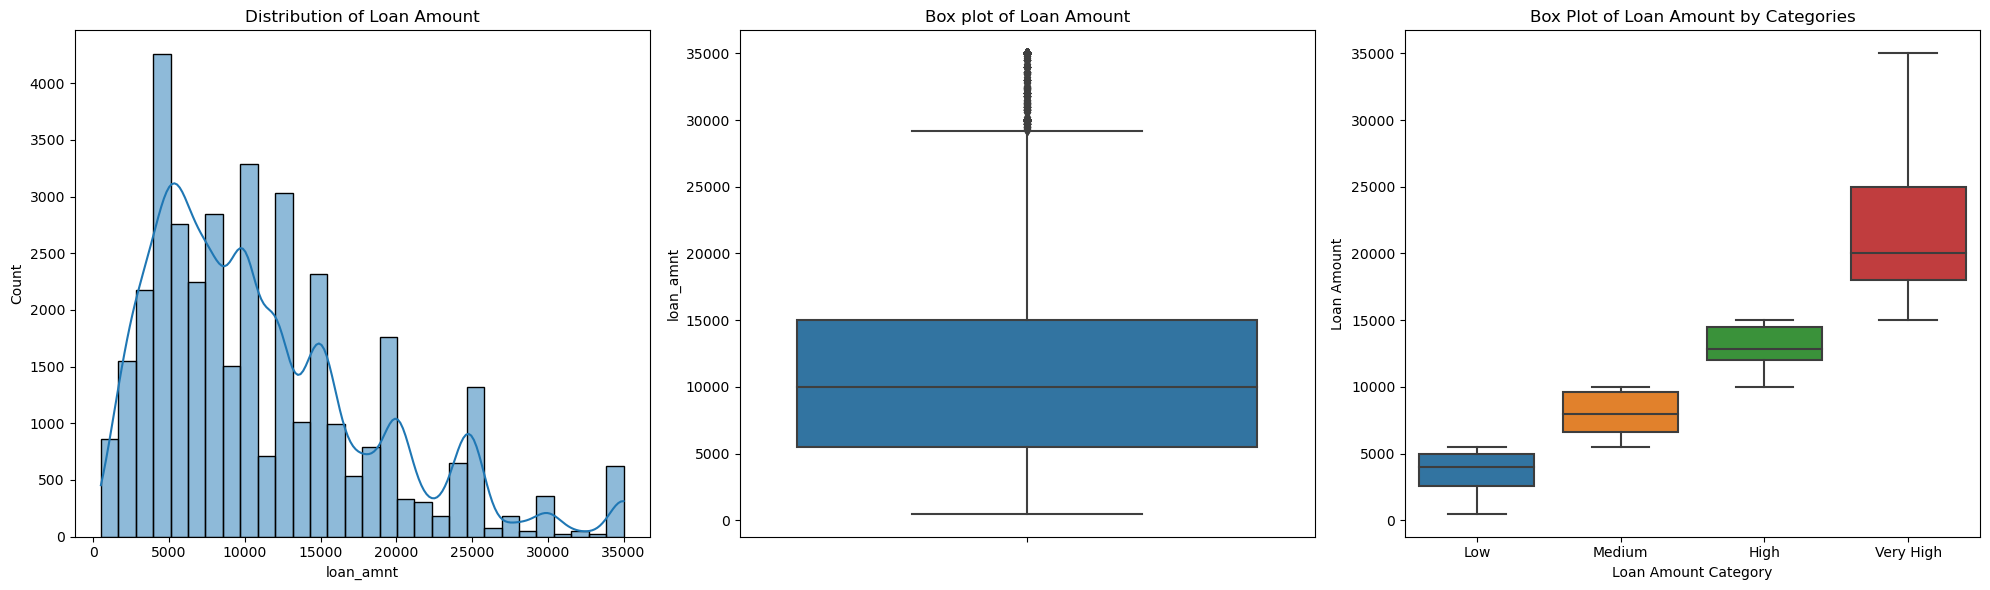

In [63]:
utils.plot_numerical_univariate(df, "loan_amnt", "Loan Amount")

### Observations from univariate analysis on Loan Amount(loan_amnt)

- Summary Statistics
    - 50% of the loands lie within 5.5K to 15K
    - mean is around 11k, and median is around 10k . 
    - So, it doesn't contain extreme values that are significantly distant from the rest of the data. So, although there are higher amounts, they may not be outliers/anomalies

- Histogram 
    - It is right-skewed indicating the following
        - majority of loans are of smaller amounts.
        - there's a substantial number of loans with higher amounts
        - But as per the inference drawn from summary statistics they may not be outliers/anomaly. Let's draw a box plot to check if those high amounts are outliers

- Box plot for Loan amount
    - There seems to be some outliers reflected above the IQR, but as per the summary stats, they may not be outliers. Therefore, it seems like they might be reasonable within high categories of loans. 
    - Let's check box plot for binned categories for loan_amnt to confirm the above inference.

- Box plot for binned categories of loan amount
    - Each category represents a quartile of loan distribution. Low - smallest 25%, medium - next 25%, and so on upto "Very High" that shows the largest 25%
    - median across the categories is gradually increasing, indicating the increasing ranges of loan amounts
    - The interquartile range increases across each category, indicating that the loan amounts are more variable as the loan size increases
    - There are no extreme outliers within each cateogory, confirming our earlier observation and inference that the outliers visible in the box plot for loan amount, are normal in the higher loan categories.
    - Outlier treatment may not be necessary for this feature.

### Inferences from univariate analysis on Loan Amount(loan_amnt)
1. Majority of loans are of smaller amounts.
2. There's a substantial number of loans with higher amounts
3. As the loan amount increases, median also increases, implying central tendency of each category is increasing from low to high
4. Although there are few higher loans, outlier treatment is not necessary for this feature, as those are normal traits within high category of loans.
5. High loan categories are more variable (based on IQR). So, borrowers within the High segment may have diverse needs. It requires more customer segmenation within the higher range

### Bivariate Analysis of Loan Amount(loan_amnt) versus Loan Status(loan_status)

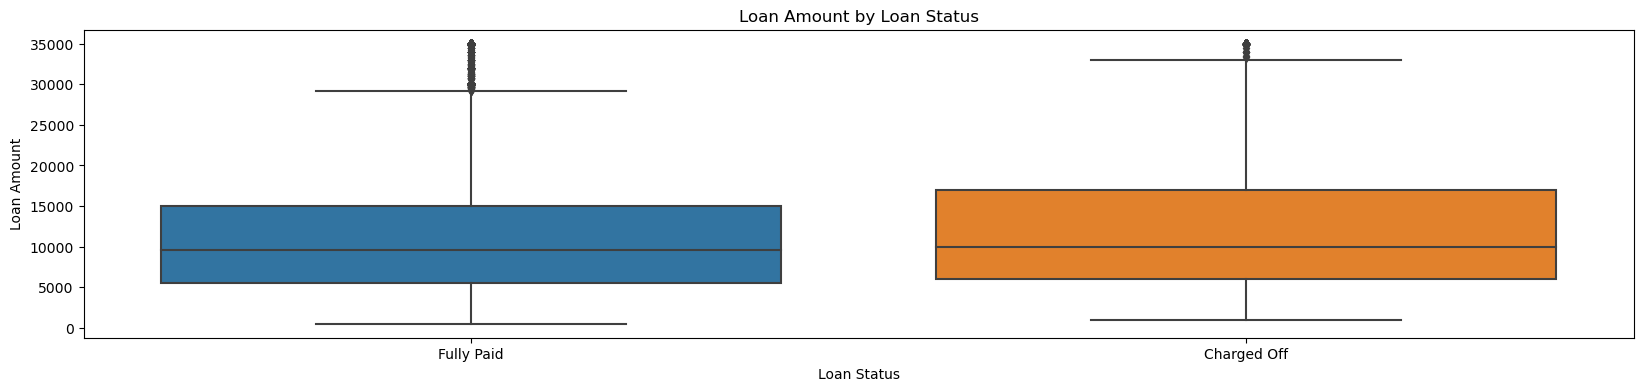

In [64]:
utils.plot_numerical_bivariate(df, "loan_amnt", "loan_status", "Loan Amount", "Loan Status")

### Observations from the bivariate analysis of Loan Amount(loan_amnt) versus Loan Status(loan_status)

1. The median loan amount for 'Charged Off' and 'Default' statuses is slightly higher than for 'Fully Paid'. 
2. IQR's range for "Charged off" status is slightly higher than "Fully Paid". 
3. Median value of loan amount for "Fully paid" is around 10K, and outliers for the same category are in the range of 30K to 35K
4. Median value of loan amount for "Chargedd Off" category is around 11K, and outliers for the same are in the range of around 33K to 35K.

### Inferences from the Observations from the bivariate analysis of Loan Amount(loan_amnt) versus Loan Status(loan_status)

1. Loans with higher amount has slighly higher chance of being "Charged Off"
2. There are outliers within each category but they are in the expected range of each category as the outliers are not too distant from the median.
3. Loan Amount is a moderately good predictor. It shows some level of correlation with higher loan amounts , but not a significantly good predictor, and certainly not the primary predictor. It can be considered as a moderately good predictor, and can be a part of preddictive analysis.

Predictor Category  - Moderately Good

## Univariate Anslysis of Funded Amount(funded_amnt)

Summary statistics for 'Funded Amount':
count    36789.000000
mean     10881.543396
std       7109.458296
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


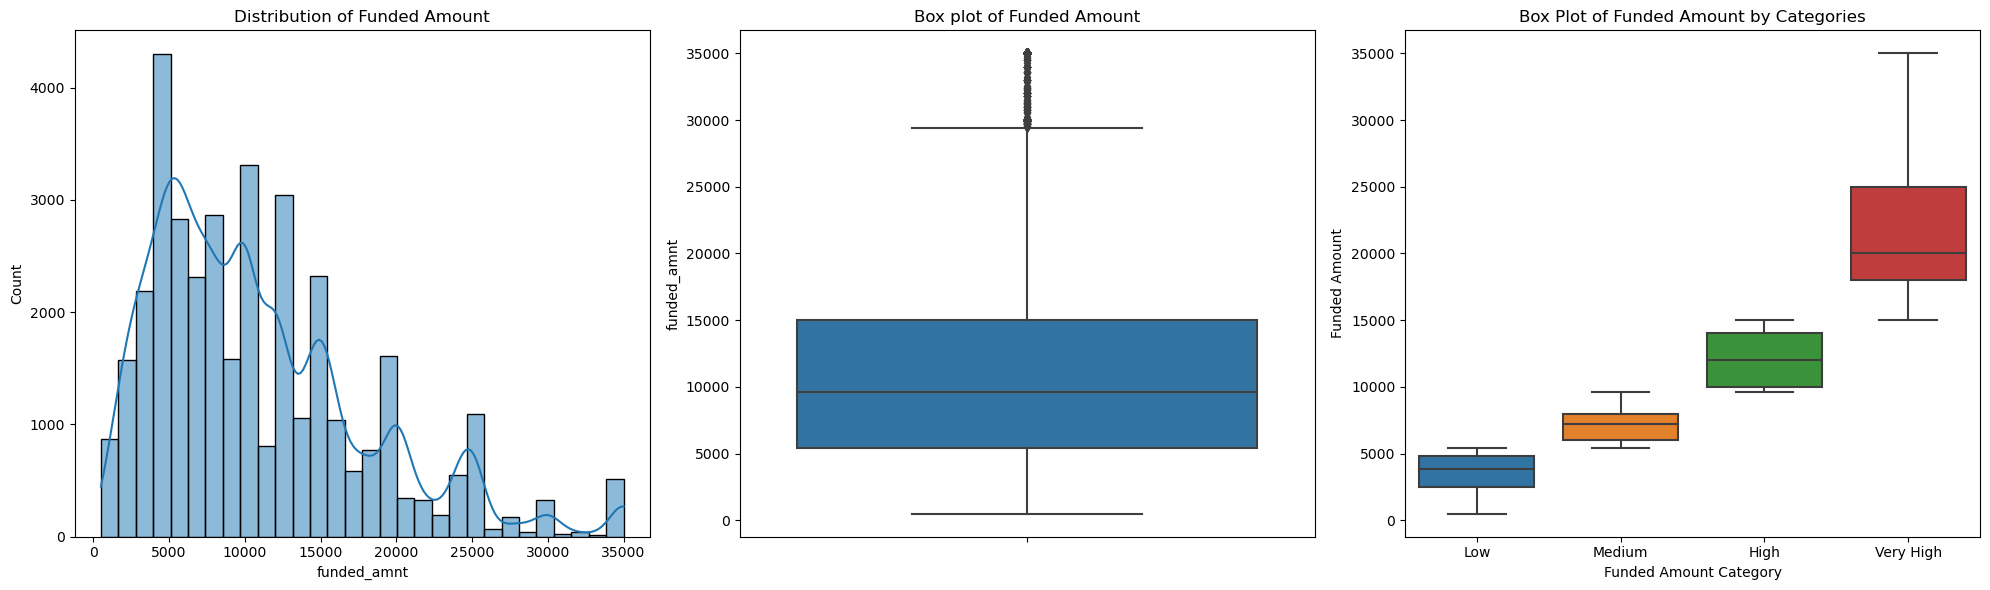

In [65]:
utils.plot_numerical_univariate(df, "funded_amnt", "Funded Amount")

### Observations from univariate analysis on Funded Amount(funded_amnt)

- Summary Statistics
    - 50% of the loands fall between $5,400 and $15,000, indicating that most funded amounts are in the moderate range.
    - mean is around 10,882, and median is around 9,600. There's a slightly more number of loans below the mean 
    - mean and median are not too distant from each other. Therefore, it doesn't contain extreme values that are significantly distant from the rest of the data. So, although there are higher amounts, they may not be outliers/anomalies

- Histogram 
    - It is right-skewed indicating the following
        - majority of loans are of smaller amounts.
        - there's a substantial number of loans with higher amounts
        - But as per the inference drawn from summary statistics they may not be outliers/anomaly. Let's draw a box plot to check if those high amounts are outliers

- Box plot for Funded Amount
    - There seems to be some outliers reflected above the upper quartile, but as per the summary stats, they seem to be normal variations. Therefore, it seems like this might be reasonable within high categories of loans. 
    - Let's check box plot for binned categories for funded_amt to confirm the above inference.

- Box plot for binned categories of loan amount
    - Simlar to Loan Amounts, each category here represents a quartile of loan distribution. Low - smallest 25%, medium - next 25%, and so on upto "Very High" that shows the largest 25%
    - median across the categories is gradually progressing, indicating that the variability increases with loan sizes
    - The interquartile range increases across each category, indicating that the loan amounts are more variable as the loan size increases
    - There are no extreme outliers within each cateogory, confirming our earlier observation and inference that the outliers visible in the box plot for loan amount, are normal in the higher loan categories.
    - Outlier treatment may not be necessary for this feature.

### Inferences from univariate analysis on Funded Amount(funded_amnt)
1. Majority of loans are of smaller funded amounts, which is natural besed on our earlier observation most of the loans are of smaller amunts.
2. In accordance with the loan amount observation , there's a substantial number of loans with higher funded amounts
3. As the funded amount increases, median also increases, implying central tendency of each category is increasing from low to high
4. Although there are few higher funded amounts, outlier treatment is not necessary for this feature, as those are normal traits within high category of loans.
5. High Funded Amount categories are more variable (based on IQR).

### Bivariate Analysis of Funded Amount(funded_amnt) versus Loan Status(loan_status)

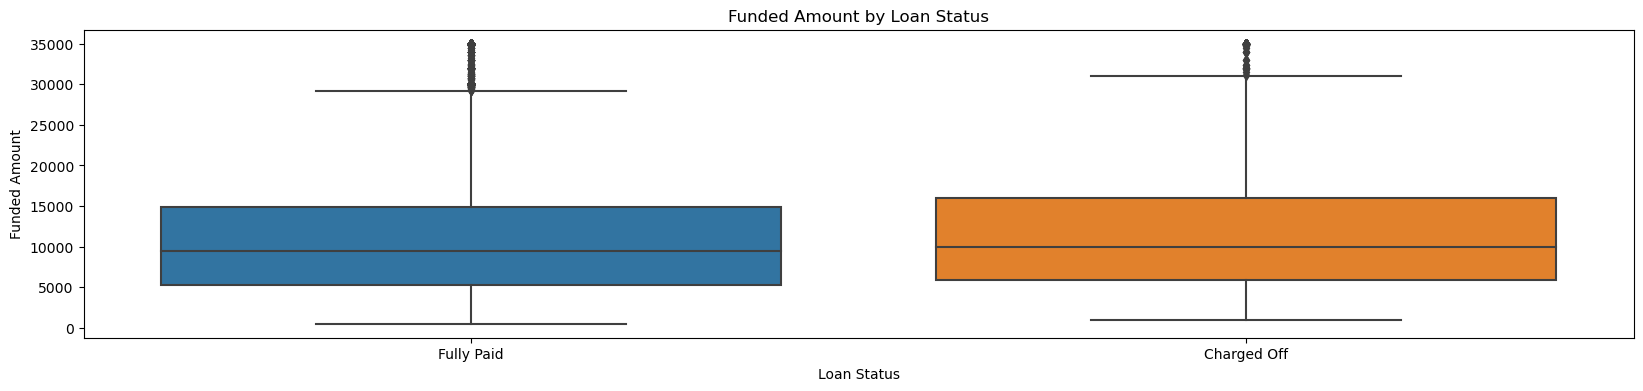

In [66]:
utils.plot_numerical_bivariate(df, "funded_amnt", "loan_status", "Funded Amount", "Loan Status")

### Observations from the bivariate analysis of Funded Amount(funded_amnt) versus Loan Status(loan_status)

1. The median loan amount for 'Charged Off' and 'Default' statuses is slightly higher than those for 'Fully Paid'. 
2. IQR's range for "Charged off" status is slightly higher than "Fully Paid". 
3. Median value of funded amount for "Fully paid" is around 10K, and outliers for the same category are in the range of 30K to 35K
4. Median value of funded amount for "Chargedd Off" category is around 11K, and outliers for the same are in the range of around 33K to 35K.

### Inferences from the Observations from the bivariate analysis of Funded Amount(funded_amnt) versus Loan Status(loan_status)

1. Loans with higher funded amount has slighly higher chance of being "Charged Off"
2. There are outliers within each category but they are in the expected range of each category as the outliers are not too distant from the median.
3. Funded Amount is a moderately good predictor. It shows some level of correlation with higher loan amounts , but not a significantly good predictor, and certainly not the primary predictor. It can be considered as a moderately good predictor, and can be a part of preddictive analysis.

- Predictor Category - Moderately Good

## Univariate Anslysis of Amount funded by investor(funded_amnt_inv)

Summary statistics for 'Amount Funded by Investor':
count    36789.000000
mean     10440.010329
std       7008.761656
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


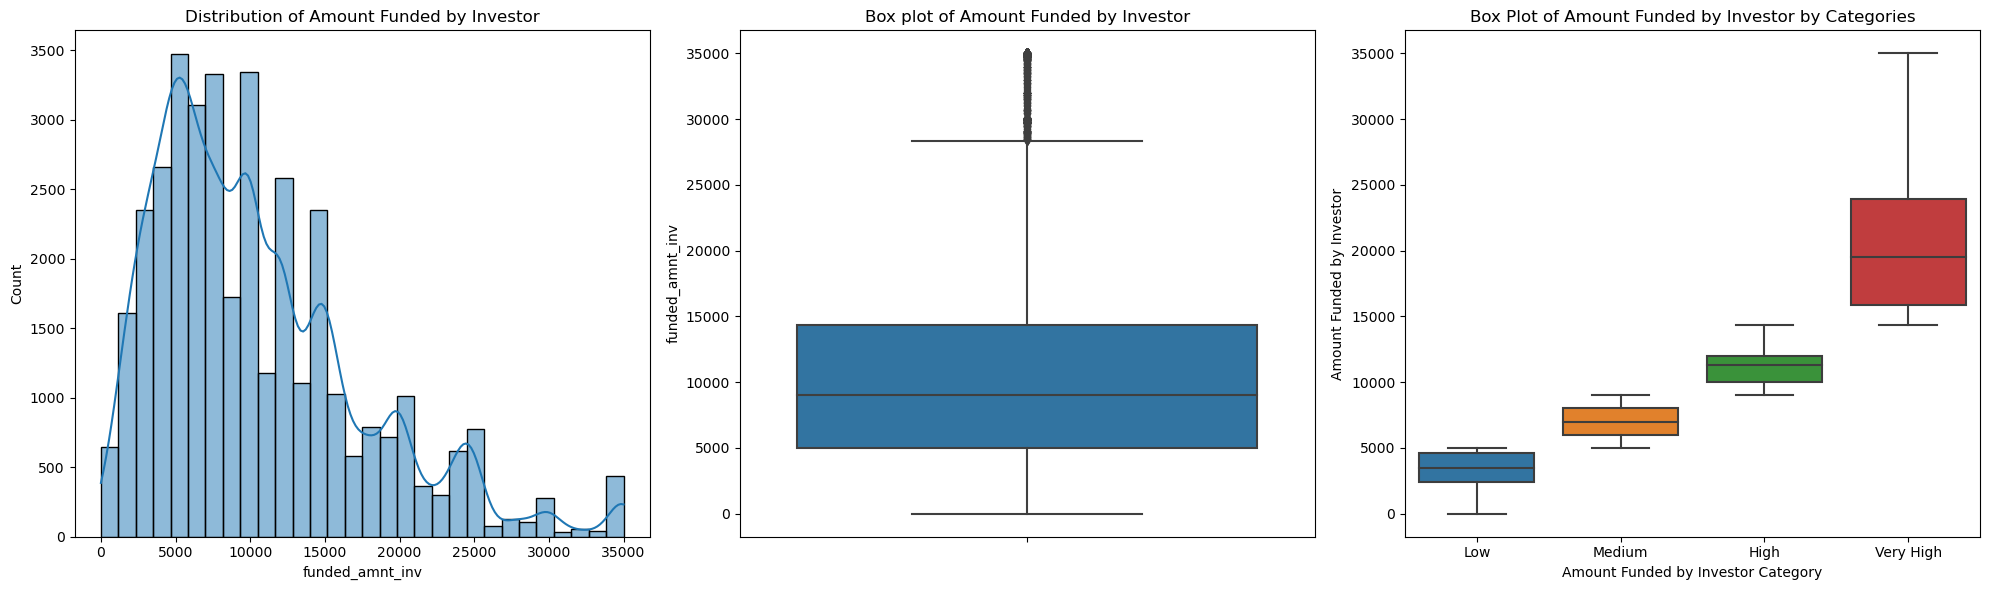

In [67]:
utils.plot_numerical_univariate(df, "funded_amnt_inv", "Amount Funded by Investor")

### Observations from univariate analysis on Amount Funded by Investor(funded_amnt_inv)

- Summary Statistics
    - 50% of the loands fall between $5,000 and $14,350, indicating that most of the funded amounts are in the moderate range.
    - mean is around 10,440, and median is around 9,000, suggesting a distribution with many values in the lower to middle range.
    - Standard deviation is substantial, but mean and median are not too distant from each other. Therefore, it doesn't contain extreme values that are significantly distant from the rest of the data. So, although there are higher amounts, they may not be outliers/anomalies

- Histogram 
    - It is right-skewed indicating the following
        - For majority of loans, this feature lies at the lower end.
        - there's a substantial number of loans with higher investments
        - But as per the inference drawn from summary statistics higher may not be outliers/anomaly, but they do occur. Let's draw a box plot to check if those high amounts are outliers

- Box plot for Funded Amount
    - There seems to be some outliers reflected above the upper quartile, but as per the summary stats, they seem to be normal variations. Therefore, it seems like this might be reasonable within high categories of loans. 
    - Let's check box plot for binned categories for funded_amnt_inv to confirm the above inference.

- Box plot for binned categories of funded_amnt_inv
    - Simlar to Loan Amounts, each category here represents a quartile of loan distribution. Low - smallest 25%, medium - next 25%, and so on upto "Very High" that shows the largest 25%
    - median across the categories is gradually progressing, indicating that the variability increases with loan sizes
    - The interquartile range increases across each category, indicating that the loan amounts are more variable as the loan size increases
    - Outliers are present, but there are no extreme outliers within each cateogory, confirming our earlier observation and inference that the outliers visible in the box plot for loan amount, are normal in the higher loan categories.
    - Outlier treatment may not be necessary for this feature.

### Inferences from univariate analysis on Amount Funded by Investor(funded_amnt_inv)
1. In case of majority of loans, amount funded by the investor is less, which is natural besed on our earlier observation most of the loans are of smaller amunts.
2. In accordance with the loan amount observation , there's a substantial number of loans with higher amounts funded by the investor
3. As the funded amount by the investor increases, median also increases, implying central tendency of each category is increasing from low to high
4. Although there are few higher funded amounts, outlier treatment is not necessary for this feature, as those are normal traits within high category of loans.
5. High Funded Amount by Investor categories are more variable (based on IQR).

### Bivariate Analysis of Amount Funded by Investor(funded_amnt_inv) versus Loan Status(loan_status)

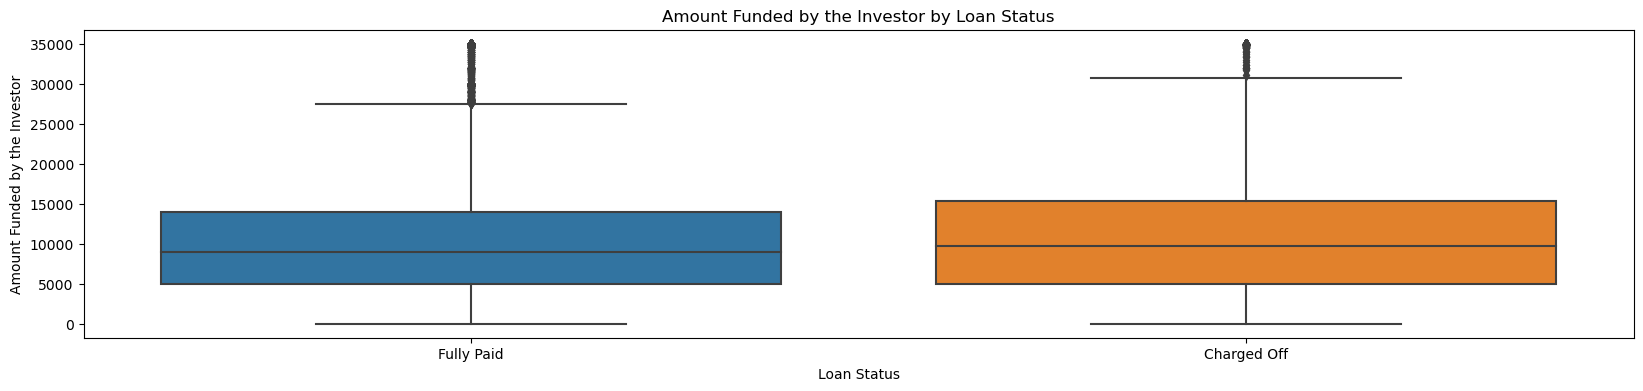

In [68]:
utils.plot_numerical_bivariate(df, "funded_amnt_inv", "loan_status", "Amount Funded by the Investor", "Loan Status")

### Observations from the bivariate analysis of Amount Funded by Investor(funded_amnt_inv) versus Loan Status(loan_status)

1. The median loan amount for 'Charged Off' and 'Default' statuses is slightly higher than those for 'Fully Paid'. 
2. IQR's range for "Charged off" status is slightly higher than "Fully Paid". 
3. The median value of the amount funded by investors for 'Fully Paid' loans is around $9,000, with outliers extending up to the maximum amount of $35,000. These outliers are loans that were still fully paid back despite being on the higher end of the amount funded.
4. The median value of the amount funded by investors for the 'Charged Off' category is approximately $10,000. Outliers for this category also reach around 35K, which suggests that some larger investments do not result in successful repayment.

### Inferences from the Observations from the bivariate analysis of Amount Funded by Investor(funded_amnt_inv) versus Loan Status(loan_status)

1. Just as with the directly funded loan amounts, higher amounts funded by investors could be associated with an increased chance of being "Charged Off"
2. There are outliers within each category but they are in the expected range of each category as the outliers are not too distant from the median.
3. Albeit less, still some higher investments do result in "Charged off", yet the investors are willing to invest in higher loans. 
4. Funded Amount is a moderately good predictor. It shows some level of correlation with higher loan amounts , but not a significantly good predictor, and certainly not the primary predictor. It can be considered as a moderately good predictor, and can be a part of preddictive analysis.

- Predictor Category - Moderately Good

## Univariate Anslysis of Term(term)

Summary statistics for 'Term':
36    27538
60     9251
Name: term, dtype: int64

Mode: 36


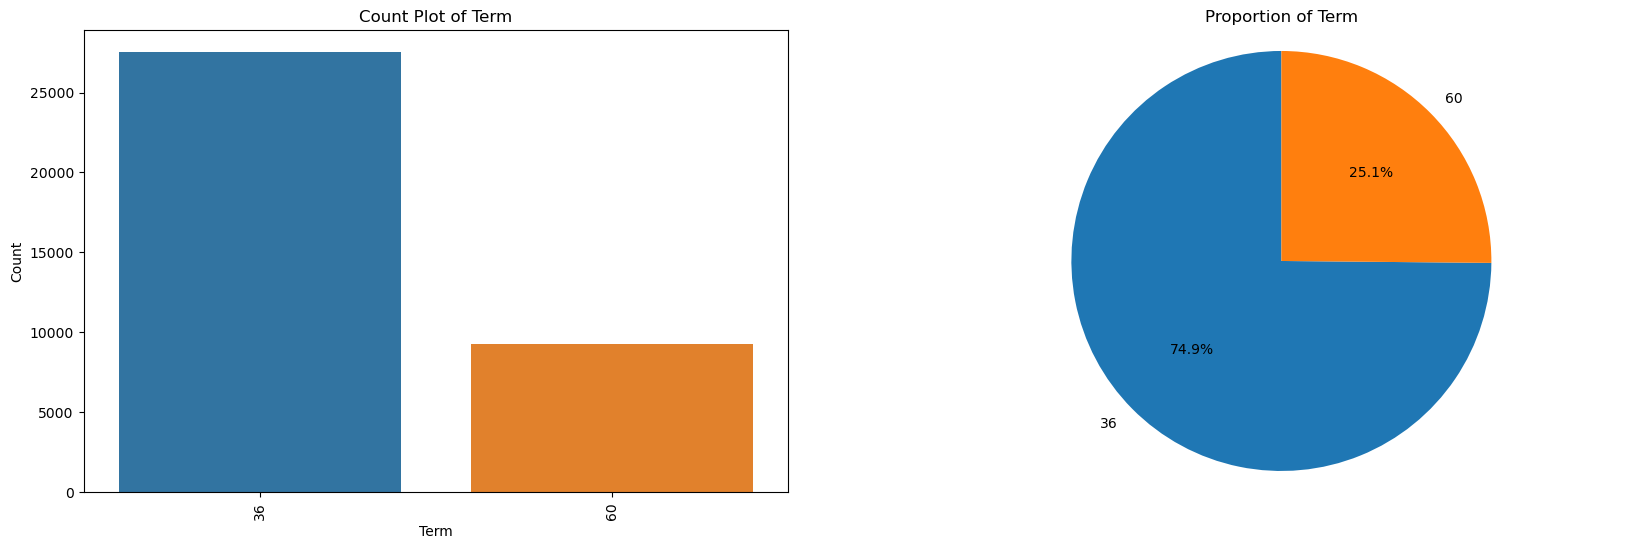

In [69]:
utils.plot_categorical_univariate(df, "term", "Term")

### Observations from univariate analysis on Term(term)

- Count Plot
    - majority of loans are 36-month terms, with fewer loans having a 60-month term.

- Pie Chart
    - The pie chart confirms that 74.9% of the loans are 36-month terms, while 25.1% are 60-month terms.

### Inferences from univariate analysis on Term(term)
Borrowers seem to prefer the 36-month term significantly more than the 60-month term.

### Bivariate Analysis of Term(term) versus Loan Status(loan_status)

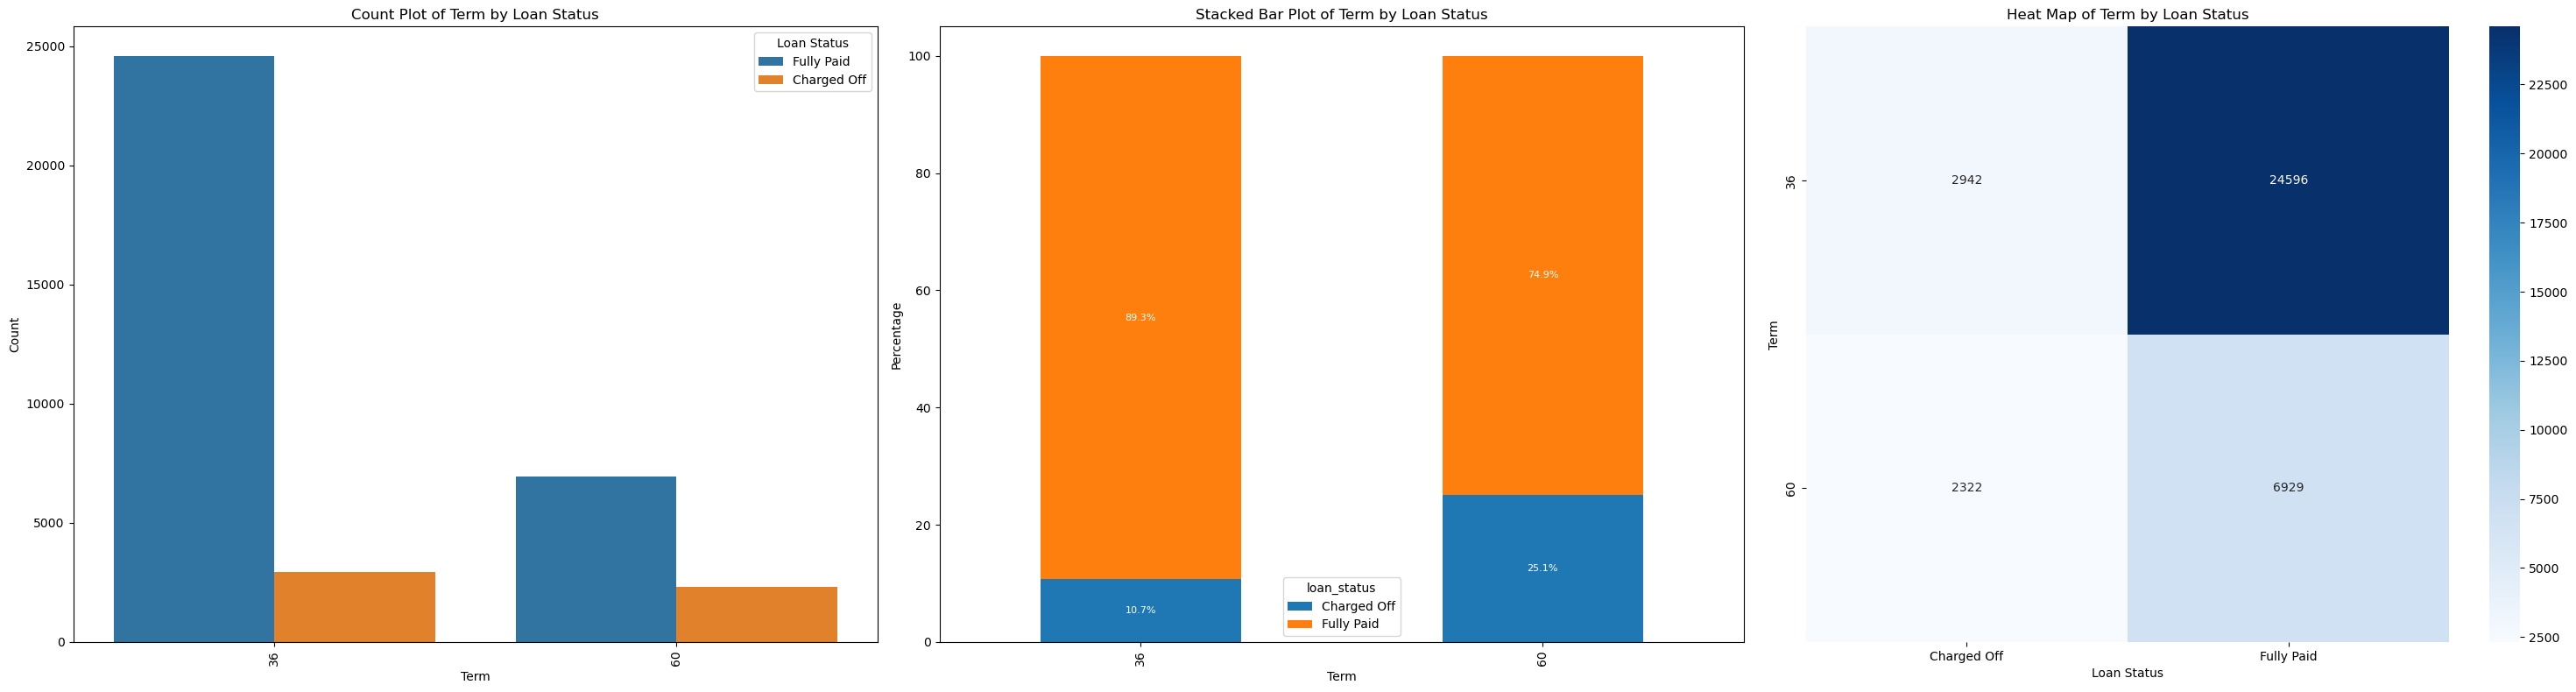

In [70]:
utils.plot_categorical_bivariate(df, "term", "loan_status", "Term", "Loan Status")

### Observations from bivariate analysis on Term(term) versus Loan Status(loan_status)
1. Count Plot - Although the number of "Charged Off" loans within 36 Months category is higher in number, proportion of loans "Charged Off" within the 60 months category is more noticeable 
2. Stacked bar plot - Similar observation , the 60-month term has a higher relative frequency of 'Charged Off' loans compared to 'Fully Paid' when looking at the proportion within the term.
3. Heat Map - It further emphasizes the higher count of 'Fully Paid' loans in the 36-month term and a significant count of 'Charged Off' loans in the 60-month term.

### Inferences from bivariate analysis on Term(term) versus Loan Status(loan_status)
1. Borrowers are likely to repay Shorter Term loans more than the likelihood of repaying longer term loans
2. Increased risk of loan not being repaid within higher term loans

Predictor Category - Good

## Univariate Anslysis of Interest Rate(int_rate)

Summary statistics for 'Interest Rate':
count    36789.000000
mean        11.983247
std          3.701140
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


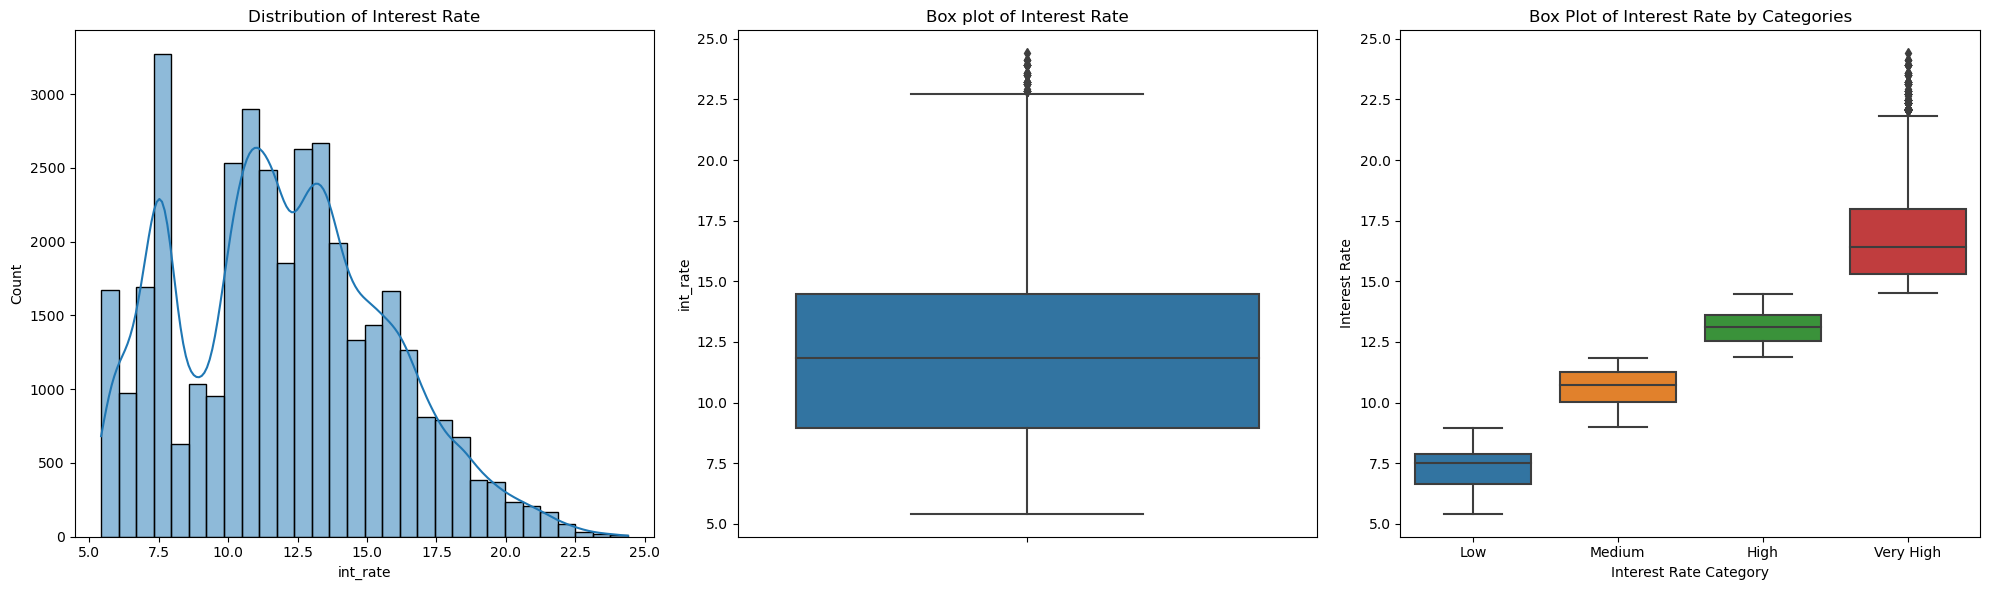

In [71]:
utils.plot_numerical_univariate(df, "int_rate", "Interest Rate")

### Observations from univariate analysis on Interest Rate(int_rate)

- Summary Statistics
    - The interest rates on loans vary widely, with the lowest rate at 5.42% and the highest at 24.4%.
    - Mean 11.98%, standard deviation 3.70% - indicating significant variability
    - 50% of the loans arr within 8.9% to 14.4%

- Histogram
    - multiple peaks indicating certain interest rates are more common
    - right skew indicating that most of the interest rates are moderate, while some are relatively high interest rate 

- Box Plot
    - Median is close to the center of the IQR
    - there are potential outliers showing up above the upper whisker, but considering that mean and median are close to each other, these might not be anomalies, rather normal traits in the data.

- Box Plot of Interest Rate by Categories:
    - median interest rate increases progressively from the 'Low' to 'Very High' categories, which aligns with the categorization based on quantiles.
    - "Very High" interest rates contain potential outliers, but other categories don't. But as said previously, mean and median of the interest rest being close, these might not be anomalies, rather normal traits in the data.

### Inferences from univariate analysis on Interest Rate(int_rate)
1. The distribution of interest rates is varied
2. Different peaks in the histogram reflects some of the interest rates are more common across the loans 

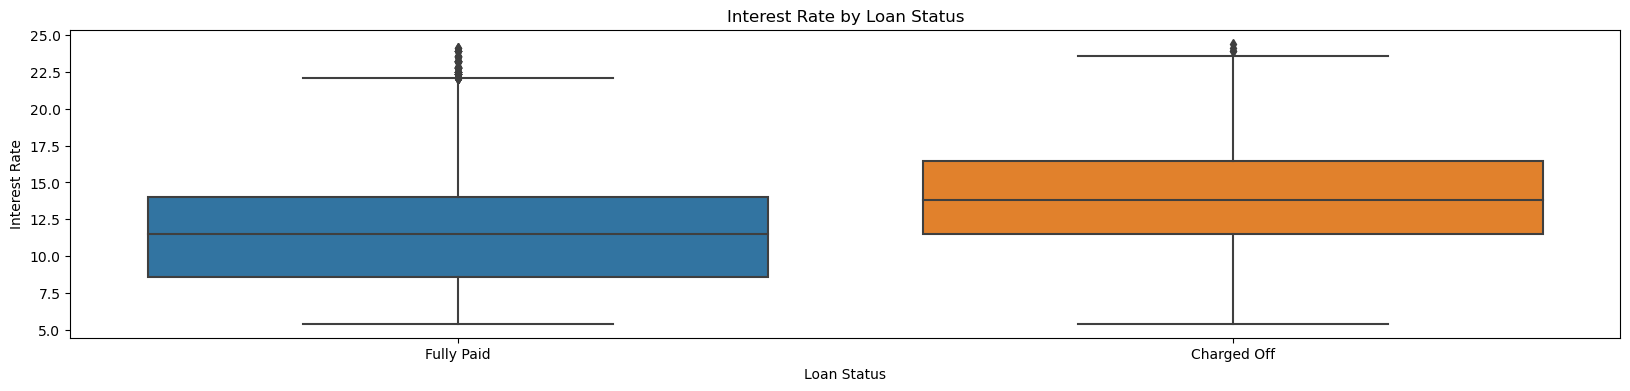

In [72]:
utils.plot_numerical_bivariate(df, "int_rate", "loan_status", "Interest Rate", "Loan Status")

### Observations from bivariate analysis on Interest Rate(int_rate) versus Loan Status(loan_status)

- Median Interest rate for the "Charged Off" Loans are higher than that of "Fully Paid" category.
- IQR of "Charged Off" Loans is much wider than that of "Charged Off" Loans


### Inferences from bivariate analysis on Interest Rate(int_rate) versus Loan Status(loan_status)

- Higher interest rate has higher chance of being associated with the likelihood of being "Charged Off"
- There is an overlap b/w the IQR of "Fully Paid" and "Charged Off" loans, suggesting that although higher interest rates has higher chance of being "Charged Off", yet, it can't be considered as a sole predictor for loan status. It's a moderately good predictor, and should be used in conjunction with other predictors.

Predictor Category - Moderately Good

## Univariate Anslysis of Installment(installment)

Summary statistics for 'Installment':
count    36789.000000
mean       324.931714
std        208.906746
min         16.080000
25%        167.730000
50%        280.220000
75%        429.450000
max       1305.190000
Name: installment, dtype: float64


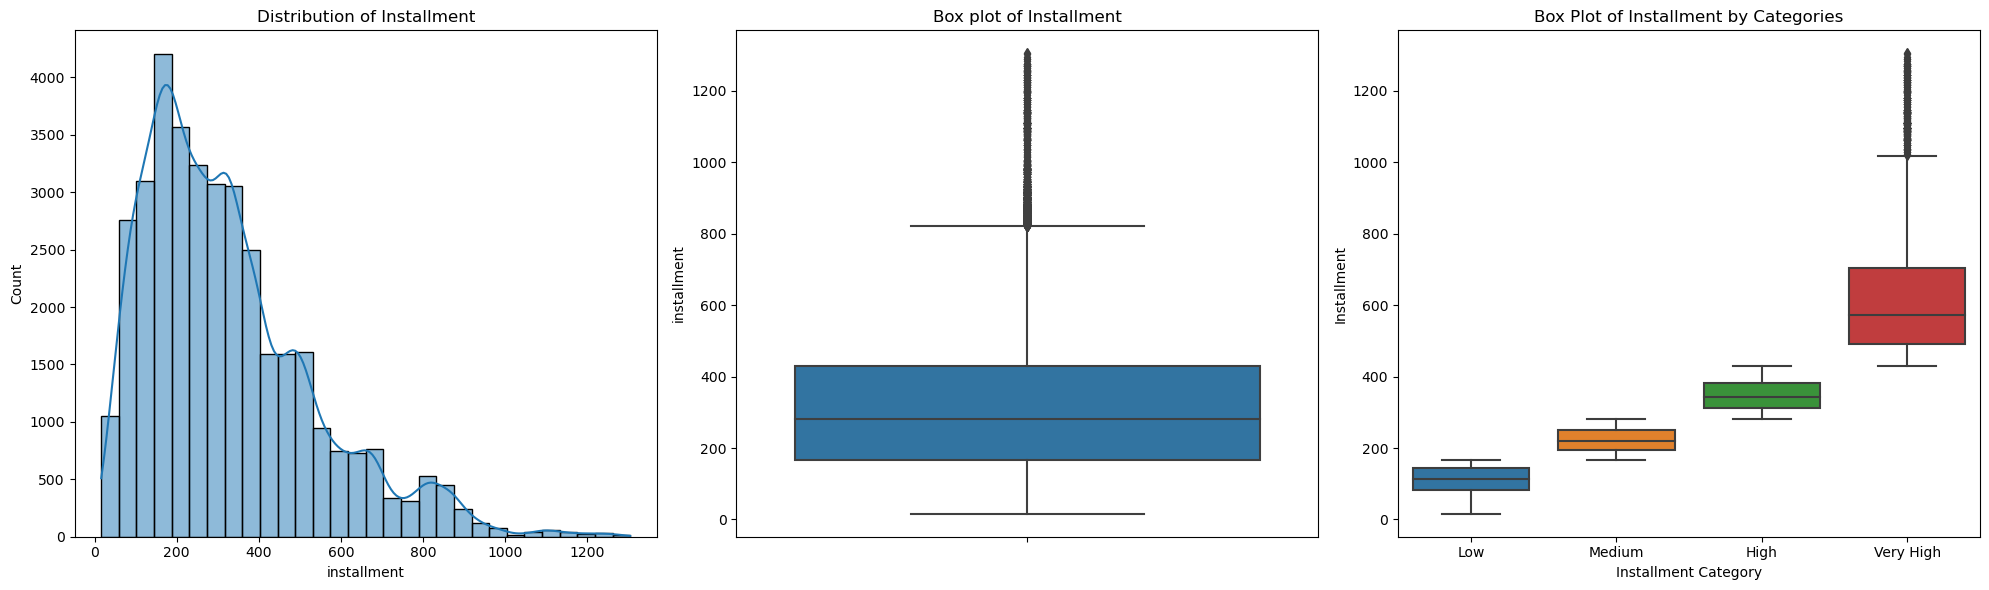

In [73]:
utils.plot_numerical_univariate(df, "installment", "Installment")

### Observations from univariate analysis on Installment(installment)

- Summary Statistics
    - The Installment amounts for loans in the dataset vary widely, with the smallest installment being 16.08 and the largest being 1,305.19.
    - mean is 324.93, std 208, considerable spread of distribution around mean
    - IQR is b/w 167.73 and 429.45

- Histogram
    - Right skewed - indicating most loans have smaller to moderate installment amounts, fewer loans having very high installments
    - multiple peaks suggesting some installment amounts are more common than the other, as indicated earlier by the interest rate

- Box Plot
    - median interest rate close to lower quartile, consistent with the right skewed histogram
    - Significant number of outliers, suggesting while most of loans have lower to moderate payments, some loanss have very high installments
    - There are potential outliers, but let's analyzie by binning the interest rates.

- Box Plot of Interest Rate by Categories
    - increasing median installment amounts as we move from 'Low' to 'Very High' categories.
    - Outliers are actually part of "Very High" interest rest category, It indicates the values above the whiskers are traits of high installments amounts.

### Inferences from univariate analysis on Installment(installment)
1. lower installment amount suggesting most loans are in affordable range
2. The presence of higher installment outliers aligns with loans that may be less common but are part of the natural variation within the market. 


### Bivariate Analysis of Installment(installment) versus Loan Status(loan_status)

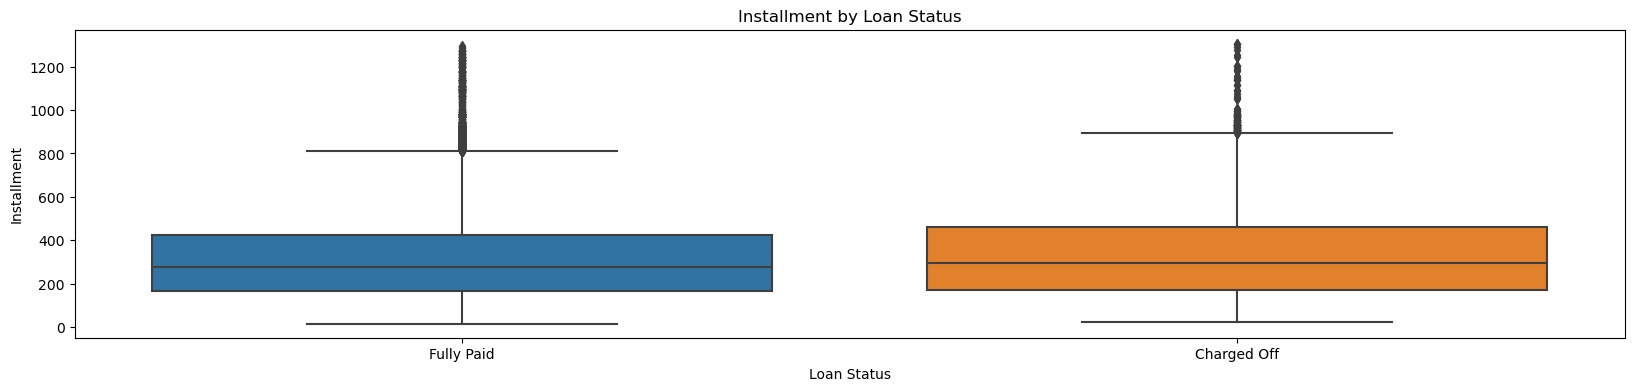

In [74]:
utils.plot_numerical_bivariate(df, "installment", "loan_status", "Installment", "Loan Status")

### Observations from bivariate analysis on Installment(installment) versus Loan Status(loan_status)

- Median Interest rate for the "Charged Off" Loans are higher than that of "Fully Paid" category.
- IQR of "Charged Off" Loans is much wider than that of "Fully Paid" Loans
- There are considerable outliers in both "Fully Paid" and "Charged Off" Loans.
- More Outliers and wider whisker for "Charged Off" Loans suggesting high installments having slightly higher likelihood of being "Charged Off"

### Inferences from bivariate analysis on Installment(installment) versus Loan Status(loan_status)
- Wider IQR, higher outliers in "Charged Off" indicating higher Installment might be a burden to borrowers, potentially leading to a higher risk of being "Charged Off".
- But the IQR and medians of "Fully Paid" and "Charged Off" overlap significantly, indicating that while installment amount may have some predictive power, it is only moderately good because it doesn't clearly differentiate between the two loan statuses.

Predictor Category - Moderately Good


## Univariate Anslysis of Grade(grade)

Summary statistics for 'Grade':
B    11145
A     9517
C     7473
D     4849
E     2573
F      938
G      294
Name: grade, dtype: int64

Mode: B


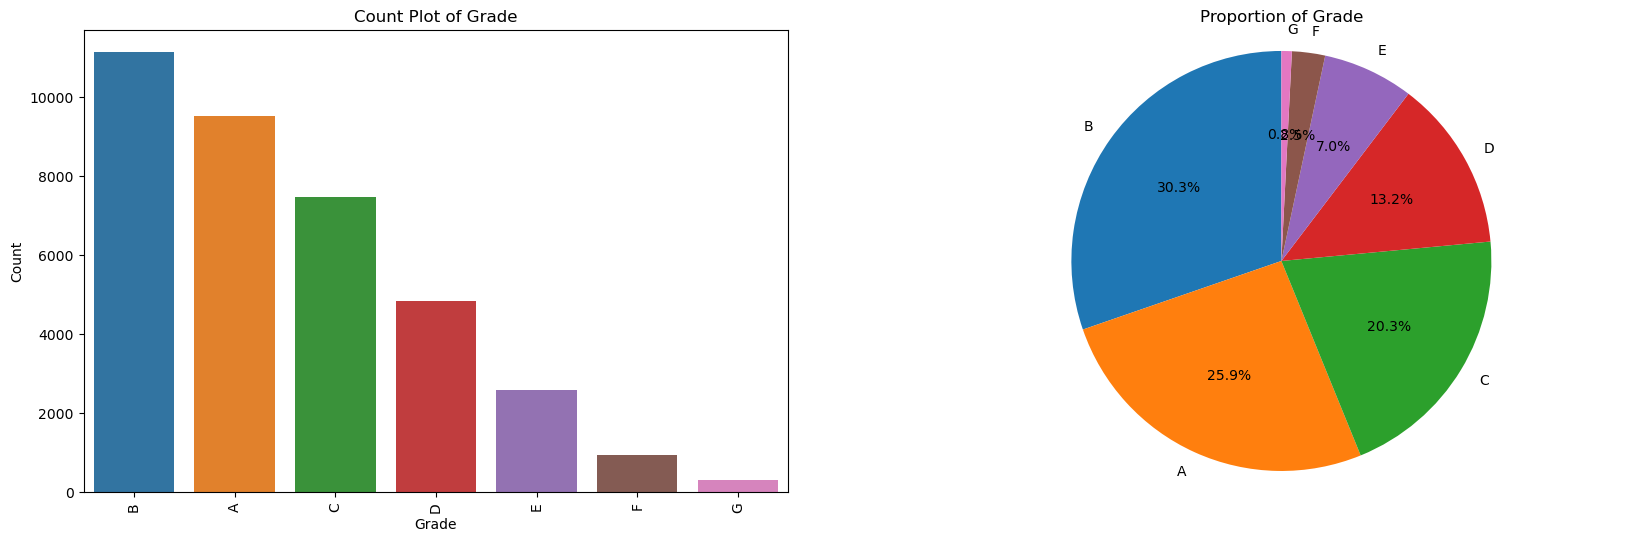

In [75]:
utils.plot_categorical_univariate(df, "grade", "Grade")

### Observations from univariate analysis on Grade(grade)

- Summary Statistics
    - Loan grades in the dataset are distributed from 'A' to 'G', with 'B' being the most common grade, making it the mode of the distribution.
    - The count of loans decreases as the grade moves from 'A' to 'G'. This is natural as more loans are given to higher grades

- Count Plot:
    - Count plot displays descending order of frequency from grades 'B' to 'G', consistent with our summary stats

- Pie Chart
    - "B" and "A" grades comprise the largest portions, 30.3% and 25.9% respectively
    - "F" and "G" grades comprise the lowest portion, natural for the risk factor associated with lower grades

### Inferences from univariate analysis on Grade(grade)
1. greater number of 'A' and 'B' grades reflects a distribution skewed towards higher credit quality among the borrowers.
2. conservative lending strategy for lower grades 


### Bivariate Analysis of Grade(grade) versus Loan Status(loan_status)

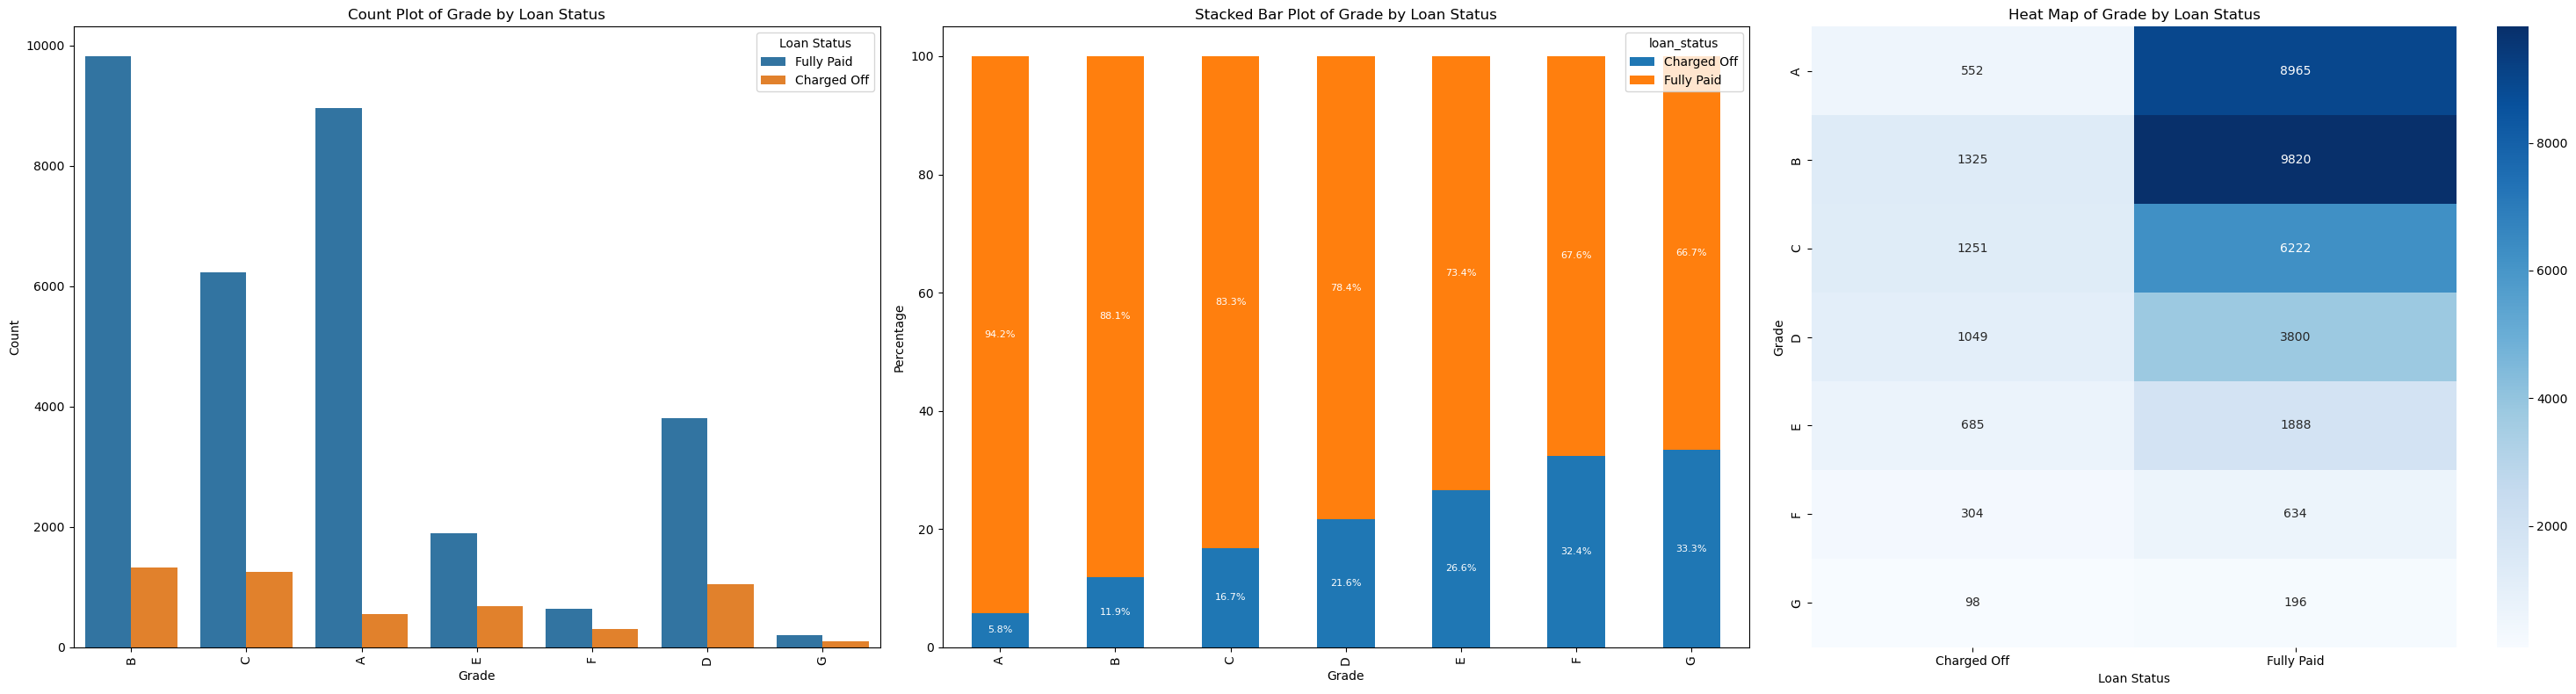

In [76]:
utils.plot_categorical_bivariate(df, "grade", "loan_status", "Grade", "Loan Status")

### Observations from bivariate analysis on Grade(grade) versus Loan Status(loan_status)
1. Count Plot 
    - Decreasing trend in the count of Fully Paid loans as the grades progress from 'A' to 'G', with 'A' and 'B' grades having the highest counts.
    - proportion of Charged Off loans appears to increase with the lower credit quality grades
2. Stacked bar plot 
    - Similar observation , the relative size of the Charged Off section increases as the grade decreases, indicating a higher rate of charge-offs for lower-grade loans.
3. Heat Map
    - quantitatively reinforces the patterns seen in the count and stacked bar plots, with darker colors representing higher counts
    - clearly shows higher frequencies of Fully Paid loans in the 'A' and 'B' grades.

### Inferences from bivariate analysis on Installment(installment) versus Loan Status(loan_status)
- higher grades clearly showing higher likelihood of full repayment
- lower grades clearly showing higher likelihood of being charged off
- This feature seems to be a strog predictor of loans being "charged off"

Predictor Category - Strong


## Univariate Anslysis of Sub Grade(sub_grade)

Summary statistics for 'Sub Grade':
A4    2762
B3    2709
A5    2602
B5    2516
B4    2344
C1    1961
B2    1898
C2    1861
A3    1701
B1    1678
C3    1421
A2    1411
D2    1227
C4    1140
C5    1090
D3    1065
A1    1041
D1     882
D4     880
D5     795
E1     702
E2     593
E3     497
E4     410
E5     371
F1     297
F2     221
F3     169
F4     143
F5     108
G1      91
G2      76
G4      54
G3      45
G5      28
Name: sub_grade, dtype: int64

Mode: A4


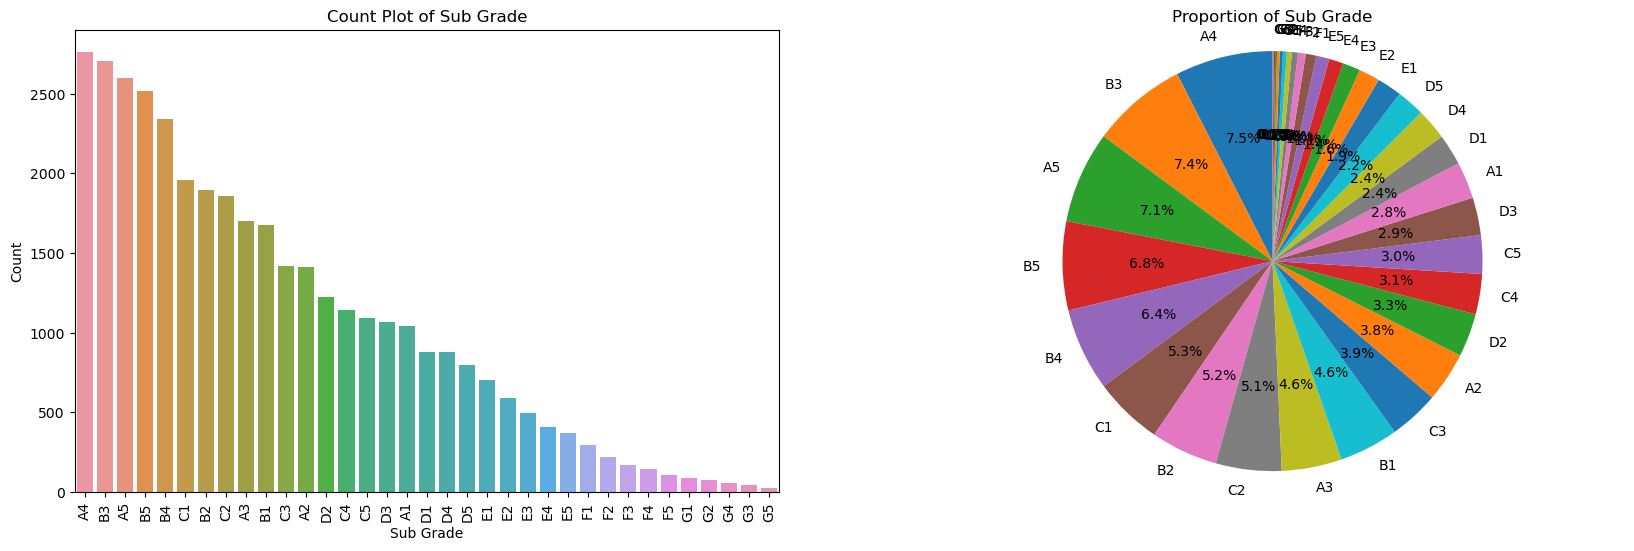

In [77]:
utils.plot_categorical_univariate(df, "sub_grade", "Sub Grade")

### Observations from univariate analysis on Sub Grade(sub_grade)

- Summary Statistics
    - Significantly detailed gradation within the grades, ranging from A1 to G5
    - The count of loans decreases as the grade moves from highest frequencies('A4', 'B3', 'A5') to the lowest(G5). This is natural as more loans are given to higher grades

- Count Plot:
    - The count plot exhibits a descending order from the most common sub grades to the least common, with higher credit quality sub grades being more frequent.
    - Long tail suggesting loans for lower sub grades are less frequent.

- Pie Chart
    - highest proportions belong to sub grades 'A4', 'B3', and 'A5', suggesting these are the most commonly assigned sub grades.
    - considerably smaller proportions for lower credit quality sub grades ('F' and 'G') indicate that loans for these sub grades are less frequent.

### Inferences from univariate analysis on Grade(grade)
1. greater number of loans given to people with higher sub grades, with 'A4', 'B3', 'A5' being the most frequent, and G5 being the lowest

### Bivariate Analysis of Sub Grade(sub_grade) versus Loan Status(loan_status)

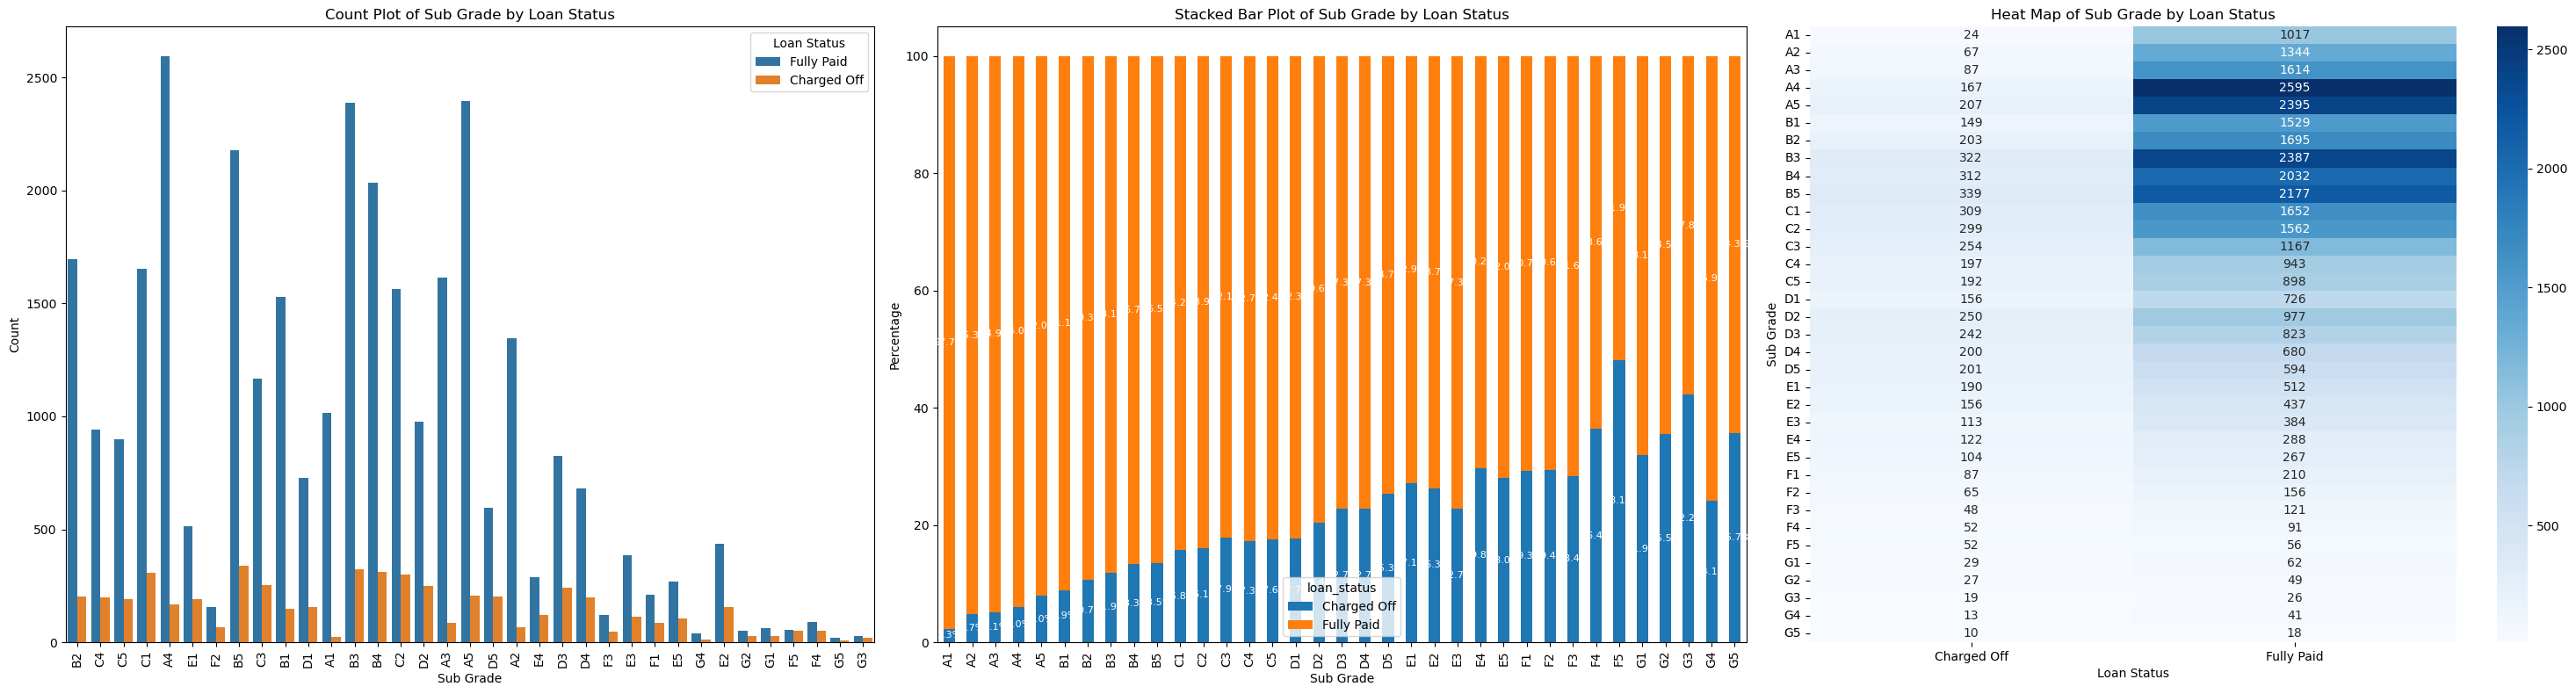

In [78]:
utils.plot_categorical_bivariate(df, "sub_grade", "loan_status", "Sub Grade", "Loan Status")

### Observations from bivariate analysis on Sub Grade(sub_grade) versus Loan Status(loan_status)
1. Count Plot 
    - frequency of Fully Paid loans generally decreases as the sub grade worsens, starting from 'A' to 'G'.
    - noticeable presence of Charged Off loans in lower sub grades, particularly from 'D' onward.
2. Stacked bar plot 
    - Similar observation , Higher sub grades (like 'A1', 'A2', etc.) have a larger proportion of Fully Paid loans, while the proportion of Charged Off loans increases in the lower sub grades.
    - significant proportion of the total loans in the lower sub grades like E,F,G
3. Heat Map
    - quantitatively reinforces the patterns seen in the count and stacked bar plots.
    - clearly shows higher counts of "Fully paid" loans in higher sub grades than those in the lower sub grades

### Inferences from bivariate analysis on Installment(installment) versus Loan Status(loan_status)
- higher sub grades clearly showing higher likelihood of full repayment
- lower sub grades clearly showing higher likelihood of being charged off
- This feature seems to be a strog predictor of loans being "charged off"

Predictor Category - Strong


## Univariate Anslysis of Employment Length(emp_length)

Summary statistics for 'Employment Length':
count    36789.000000
mean         4.964256
std          3.552270
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


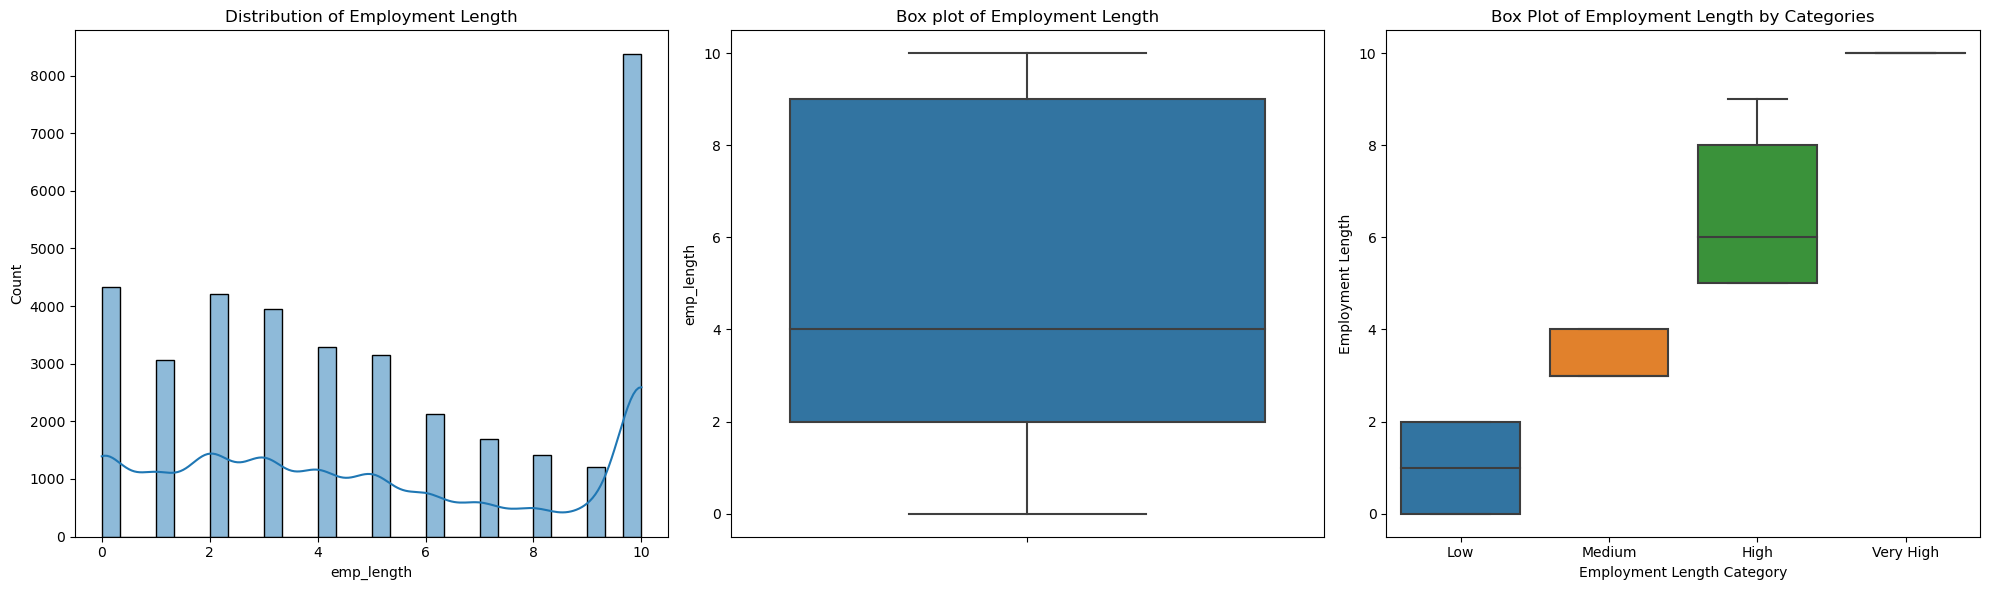

In [79]:
utils.plot_numerical_univariate(df, "emp_length", "Employment Length")

### Observations from univariate analysis on Employment Length(emp_length)

- Summary Statistics
    - range of employment length is from 0 to 10 years, with the average being close to 5 years.
    - standard deviation of about 3.55 years, suggesting a moderate spread around the mean employment length.
    - median employment length is 4 years, which indicates that half of the borrowers employed for up to 4 years and the other half for longer.


- Histogram
    - large number of borrowers with 10 years of employment, which is natural as the data was capped to 10+
    - several peaks, as the field contains discreet values
    - trend if right-skewed but not evident since we have capped it to 10+

- Box Plot
    - median interest rate close to lower quartile, consistent with the right skewed histogram
    - interquartile range extends from 2 to 9 years, which contains the middle 50% 

- Box Plot of Interest Rate by Categories
    - "Low" employment length category has a narrower interquartile range compared to "High" and "Very High" categories.
    - "Very High" category has a smaller range, which is consistent with the cap at 10 years.

### Inferences from univariate analysis on Employment Length(emp_length)
1. those with longer employment history are considered more stable and more likely to repay the loans.


### Bivariate Analysis of Employment Length(emp_length) versus Loan Status(loan_status)

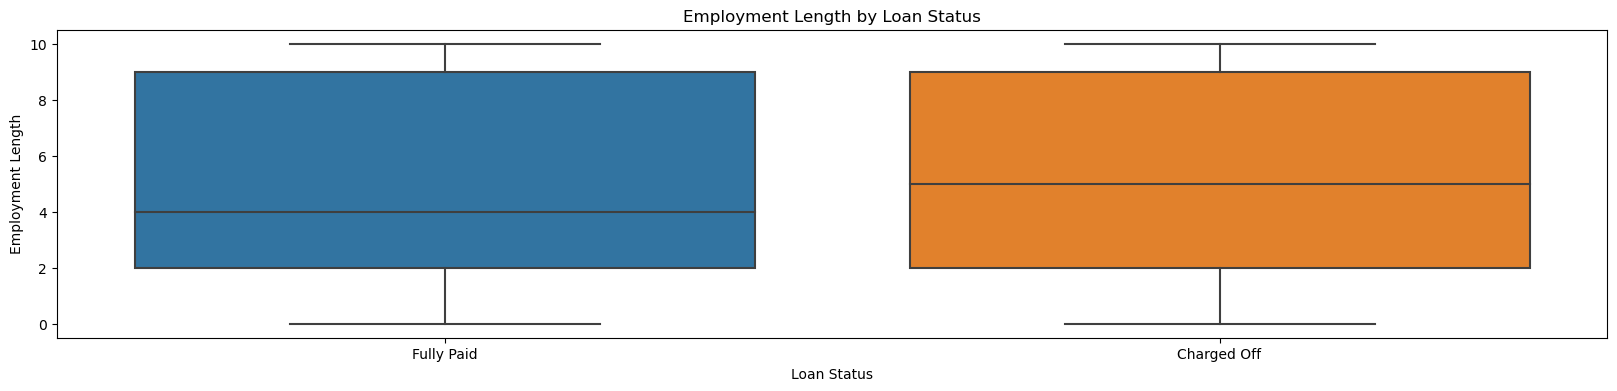

In [80]:
utils.plot_numerical_bivariate(df, "emp_length", "loan_status", "Employment Length", "Loan Status")

### Observations from the bivariate analysis of Employment Length(emp_length) versus Loan Status(loan_status)

1. Both Fully Paid and Charged Off loans have similar median values of employment length, suggesting that the median borrower in both categories has a comparable amount of time in their current job.
2. IQR's range for both categories are similar
3. no Extreme outliers
4. Both categories capped at 10 since the data set is capped at 10

### Inferences from the Observations from the bivariate analysis of Employment Length(emp_length) versus Loan Status(loan_status)

1. Given the similar distributions for both Fully Paid and Charged Off loans in terms of employment length, this feature by itself may not be a strong predictor of loan status.

## Univariate Anslysis of Home Ownership(home_ownership)

Summary statistics for 'Home Ownership':
RENT        17662
MORTGAGE    16331
OWN          2700
OTHER          96
Name: home_ownership, dtype: int64

Mode: RENT


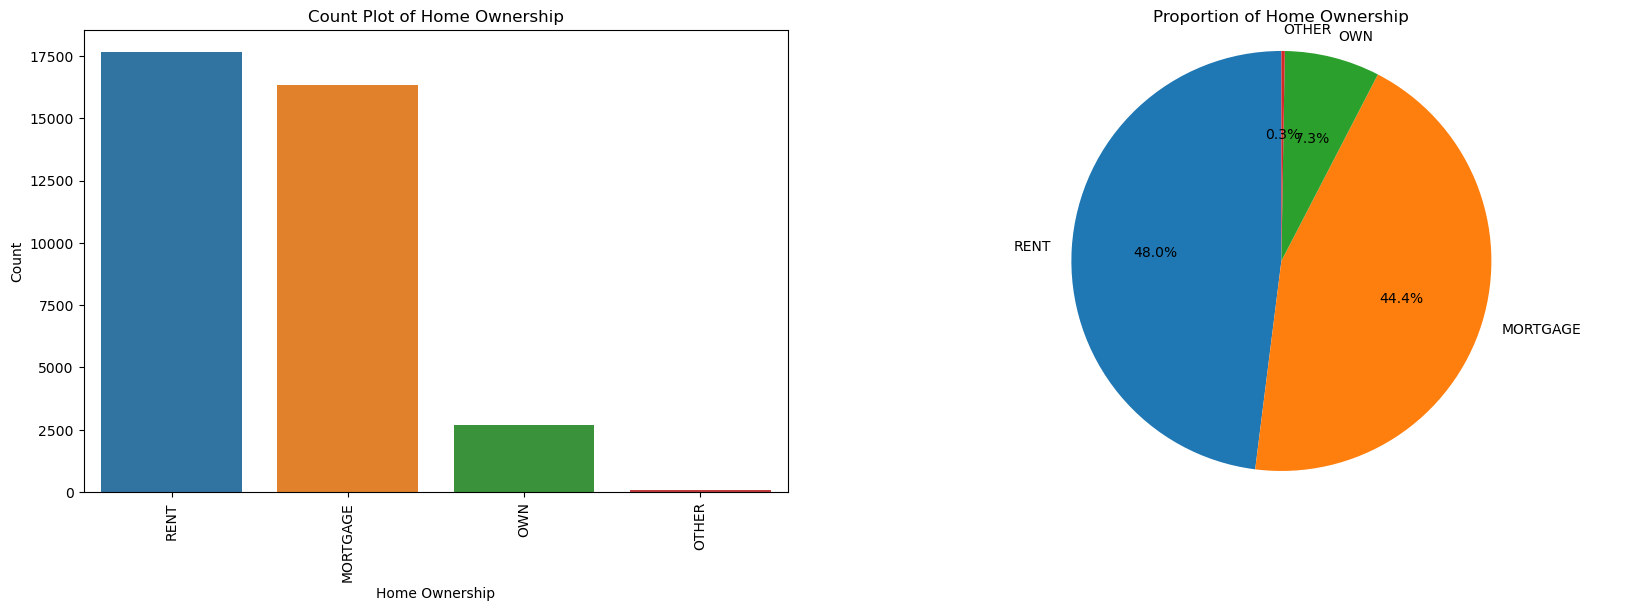

In [81]:
utils.plot_categorical_univariate(df, "home_ownership", "Home Ownership")

### Observations from univariate analysis on Home Ownership(home_ownership)

- Summary Statistics
    - The majority of borrowers are either renting or have a mortgage
    - "Rent" is the most common status
    - Small proportion of borrowers already own a home
    - Very small proportion are in the "Other" category


- Count Plot
    - Count plot shows that "Rent" and "Mortgage" dominate this feature, with "Rent" being slighly more dominant.
    - "Own" represents a significantly small portion.
    - "Other" significantly smaller

- Pie Chart
    - highlights that nearly half of the borrowers are renters (48.0%), while a slightly smaller proportion have mortgages (44.4%).
    - Homeowners without a mortgage ('OWN') make up a smaller slice (7.3%), and the 'OTHER' category is negligible (0.3%).

### Inferences from univariate analysis on Home Ownership(home_ownership)
1. This feature offers valuable insights into the daemographics of this data.
2. significant proportion of borrowers with mortgages suggests that a large segment of the borrower pool is engaged in long-term financial commitments. 


### Bivariate Analysis of Home Ownership(home_ownership) versus Loan Status(loan_status)

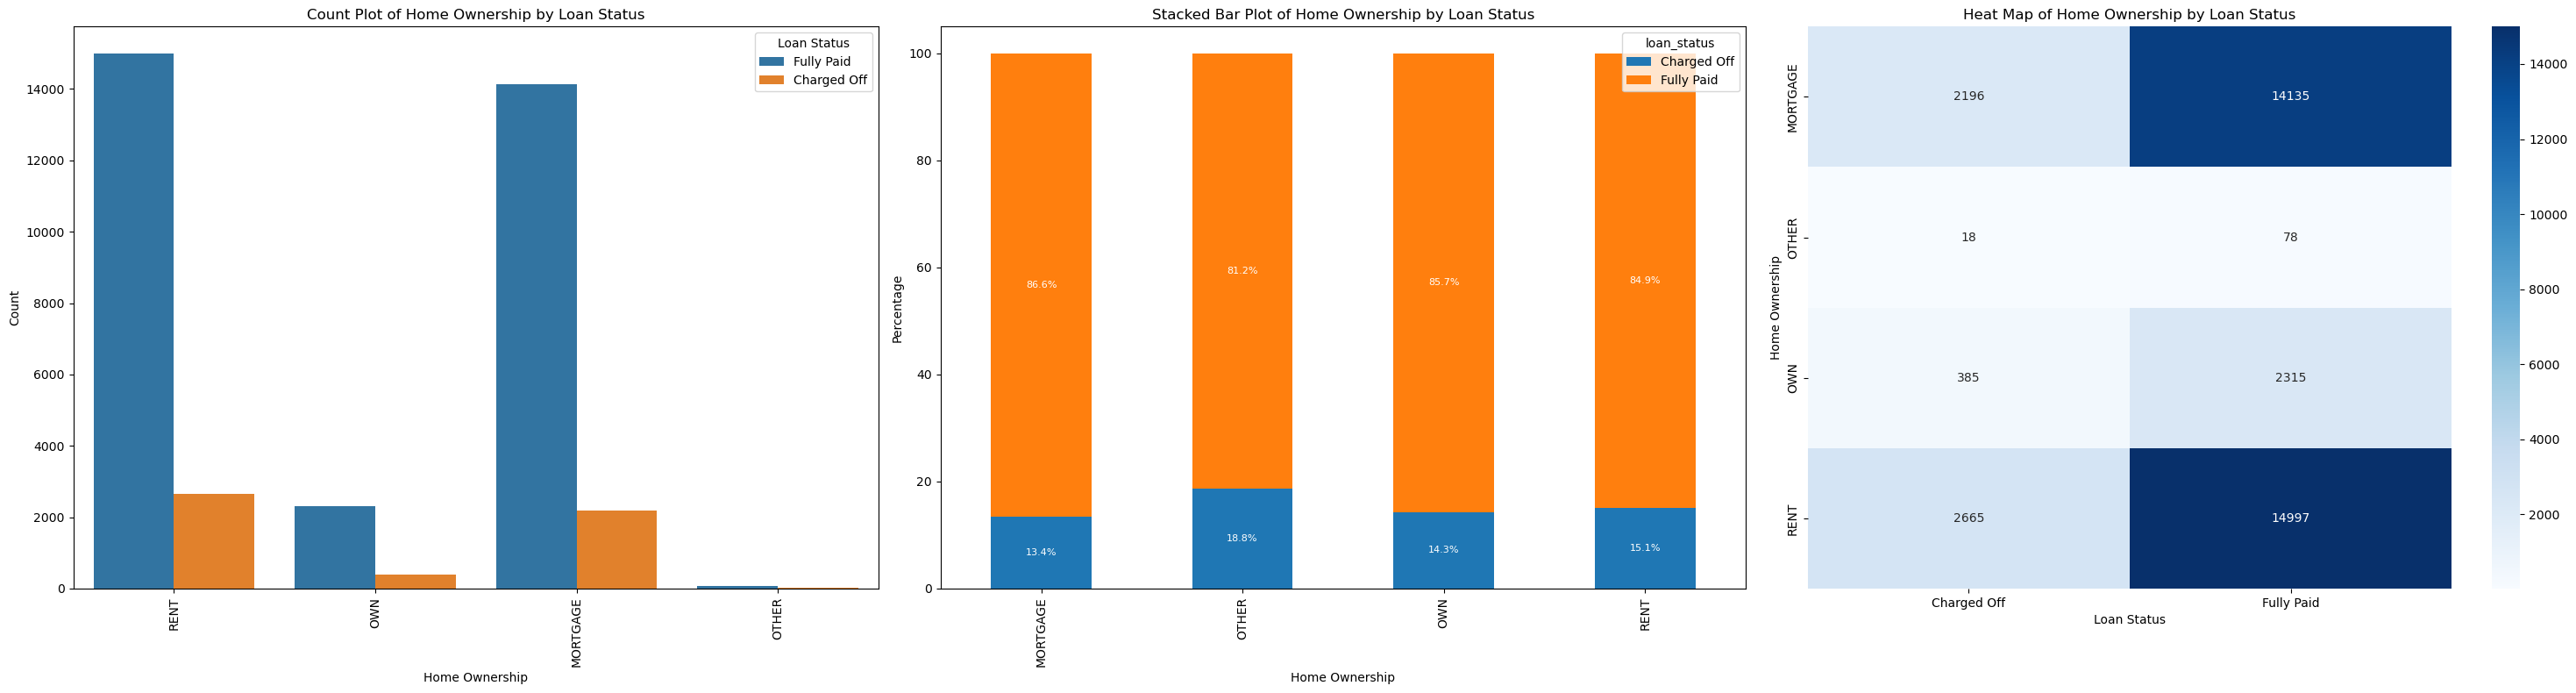

In [82]:
utils.plot_categorical_bivariate(df, "home_ownership", "loan_status", "Home Ownership", "Loan Status")

### Observations from the bivariate analysis of Home Ownership(home_ownership) versus Loan Status(loan_status)

- Count Plot
    1. The number of Fully Paid loans is higher across all home ownership categories when compared to Charged Off loans.
    2. RENT has a slightly higher number of charge-offs compared to MORTGAGE.

- Stacked Bar Plot 
    1. OWN category has a higher percentage of Fully Paid loans

- HeatMap
    1. quantifies the counts of Fully Paid and Charged Off loans within each home ownership category. It shows that while the counts of Fully Paid loans are higher, the relative distribution between Fully Paid and Charged Off does not vary drastically among Rent and Mortgage.

### Inferences from the Observations from the bivariate analysis of Home Ownership(home_ownership) versus Loan Status(loan_status)

1. The variation is not stark. OWN has a slightly better ratio of Fully Paid loans, but RENT and MORTGAGE do not show a substantial difference.
2. Not a standalone good predictor

Predictor Category - Weak

## Univariate Anslysis of Annual Income(annual_inc)

Summary statistics for 'Annual Income':
count    3.678900e+04
mean     6.943845e+04
std      6.402936e+04
min      4.000000e+03
25%      4.116000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


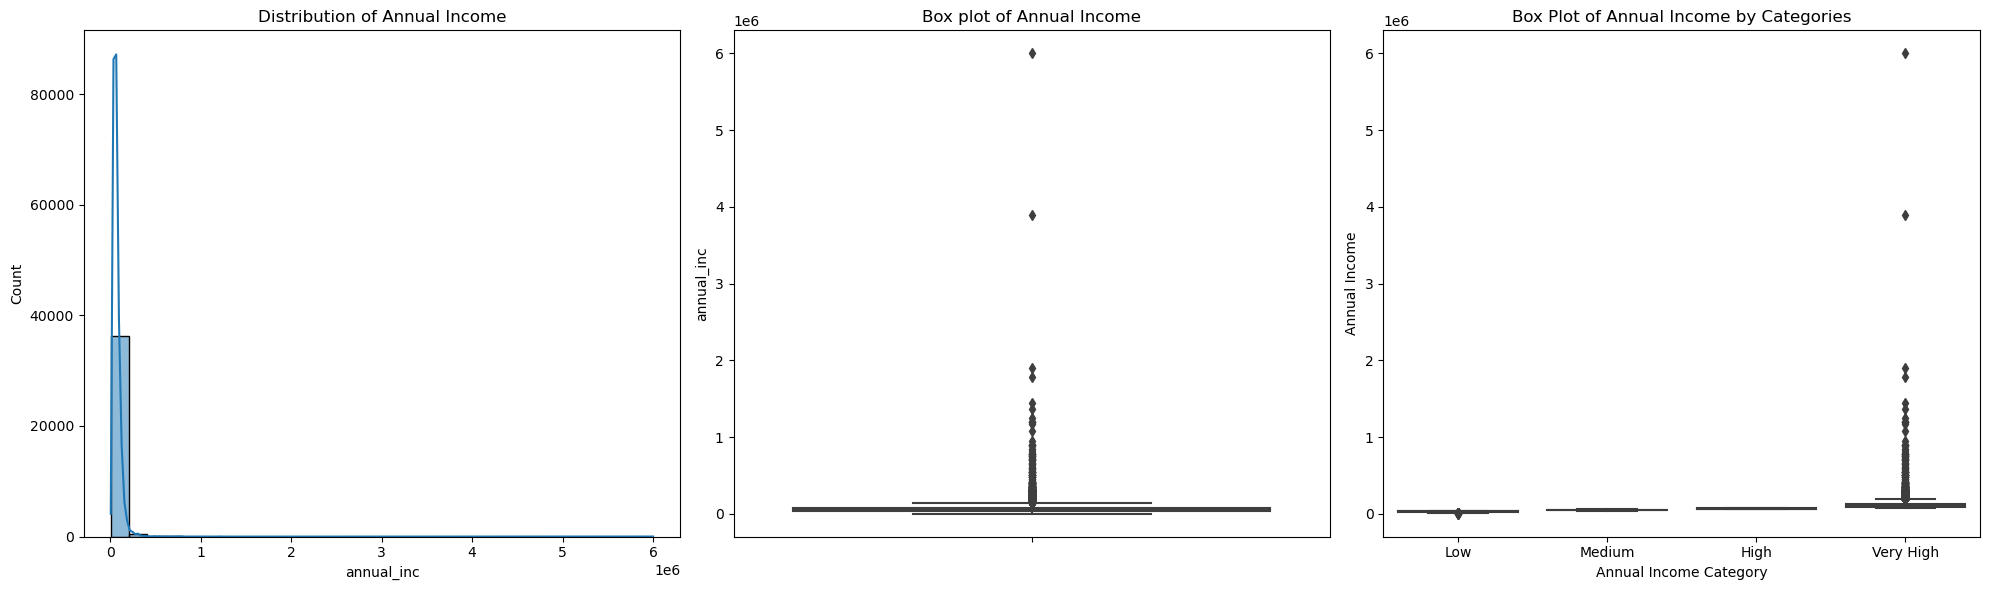

In [83]:
# tranforming to log since data is heavily skewed with a long tail, which is common with income data. 
utils.plot_numerical_univariate(df, "annual_inc", "Annual Income")

### Observations from univariate analysis on Annual Income(annual_inc)

- Summary Statistics
    - The annual income of borrowers varies significantly, with a minimum of $4,000 and a maximum of $6,000,000.
    - The mean annual income is around $69,438, while the median is $60,000, indicating that the distribution is right-skewed with some borrowers earning significantly more than the average.
    - A large standard deviation of $64,029 suggests high variability in income levels among borrowers.

- Histogram
    - The histogram is right skewed, implying variability within the income levels 

- Box Plot
    - The box plot indicates that the median income is lower than the mean, reinforcing the presence of a right-skewed distribution.
    - There are numerous outliers on the higher end of the income range.

- Box Plot of Annual Income by Categories
    - the 'Very High' category has a wider interquartile range than the other categories, indicating a greater variability of income at the higher end.
    - Outliers are particularly evident in the 'Very High' category, which may suggest that within the top earners, there is significant variation in income levels.

### Inferences from univariate analysis on Annual Income(annual_inc)
2. Significantly varying income levels at the high categories
3. Given the significant number of high-income outliers, it may be necessary to apply outlier treatment for this feature


### Bivariate Analysis of Annual Income(annual_inc) versus Loan Status(loan_status)

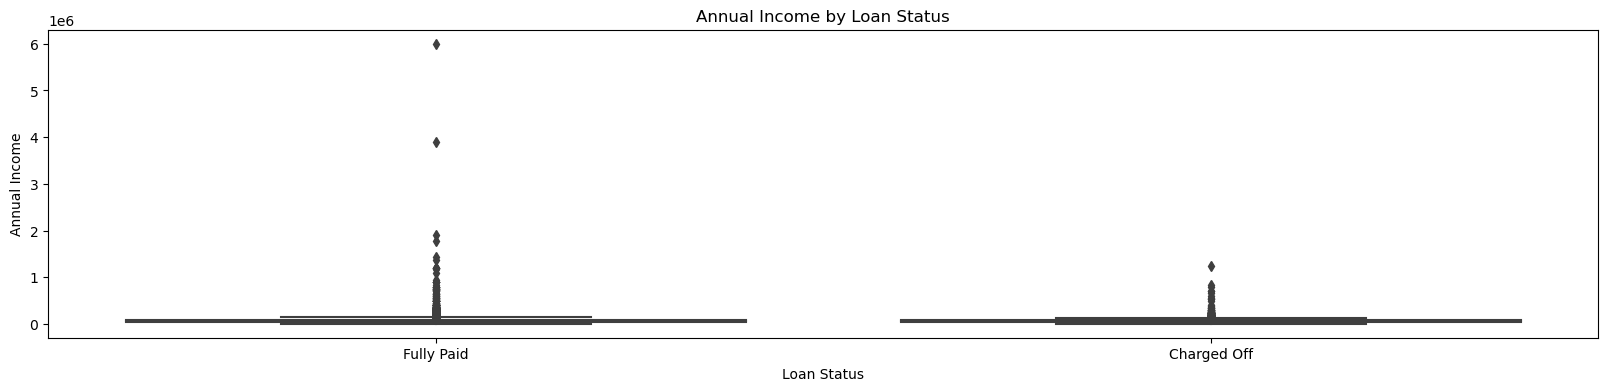

In [84]:
utils.plot_numerical_bivariate(df, "annual_inc", "loan_status", "Annual Income", "Loan Status")

### Observations from the bivariate analysis of Annual income(annual_inc) versus Loan Status(loan_status)

1. Both Fully Paid and Charged Off categories show a large number of outliers above the upper whisker, which suggests that there are borrowers with much higher incomes than the median within both groups.
2. The central boxes, which represent the interquartile range (IQR) from the 25th to the 75th percentile, are compressed at the bottom of the plot for both loan statuses. This indicates that the middle 50% of borrowers in terms of income are  concentrated in a lower income range.
3. The medians of annual income for both Fully Paid and Charged Off loans are not clearly visible, but they appear to be at the lower end of the income scale. This is typical in data with a heavy right skew.

### Inferences from the Observations from the bivariate analysis of Annual Income(annual_inc) versus Loan Status(loan_status)

1. The presence of a large number of outliers in the higher income range for both Fully Paid and Charged Off categories complicates the interpretation of annual income as a clear predictor of loan status.  
2. Perform outlier treatment 

In [85]:
# Treating outliers with capping
utils.cap_outliers(df, "annual_inc")

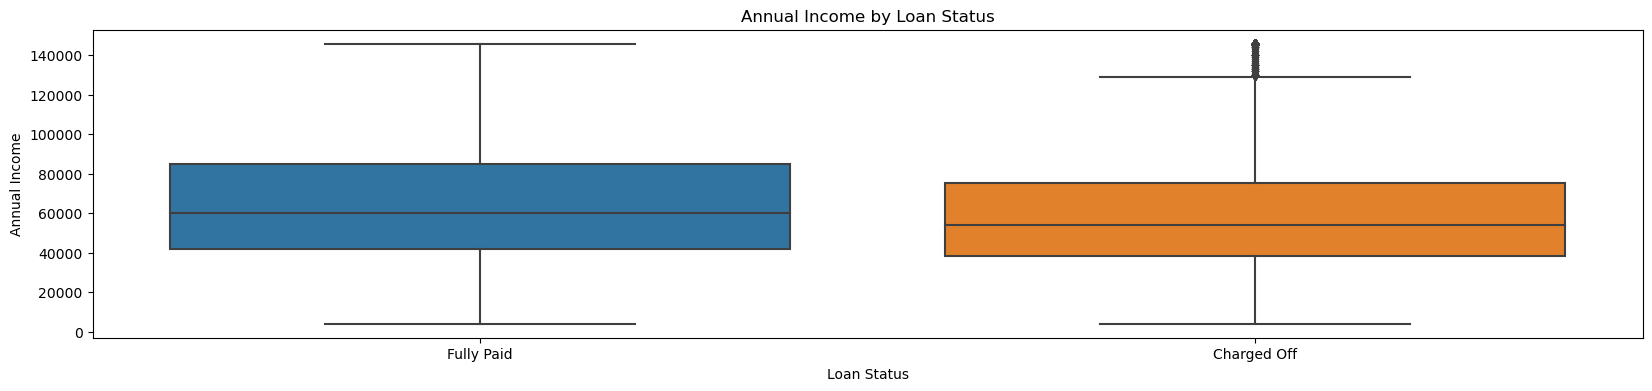

In [86]:
utils.plot_numerical_bivariate(df, "annual_inc_capped", "loan_status", "Annual Income", "Loan Status")

### After Outlier Treatment of Annual Income by means of capping
#### Observations from the bivariate analysis of Annual income(annual_inc) versus Loan Status(loan_status)

1. The box plots for both Fully Paid and Charged Off groups now present a more defined central tendency without the long tails seen in the original data.
2. The median annual income for both groups seems to be fairly similar, with slight difference between the Fully Paid and Charged Off categories.
3. The interquartile range (IQR) for Charged Off appears slightly narrower than for Fully Paid, suggesting there's a bit more variability in income among those who repay their loans.

#### Inferences from the Observations from the bivariate analysis of Annual Income(annual_inc) versus Loan Status(loan_status)

1. Given that the central tendency (median) of income does not show a marked difference between the two loan statuses, capped annual income may not be a strong predictor of loan status on its own. 
2. Perform more nuanced outlier treatment (need to find out how to treat outliers in this case)

Predictor Category - More analysis required here

## Univariate Anslysis of Verification Status(verification_status)

Summary statistics for 'Verification Status':
Not Verified       15549
Verified           11761
Source Verified     9479
Name: verification_status, dtype: int64

Mode: Not Verified


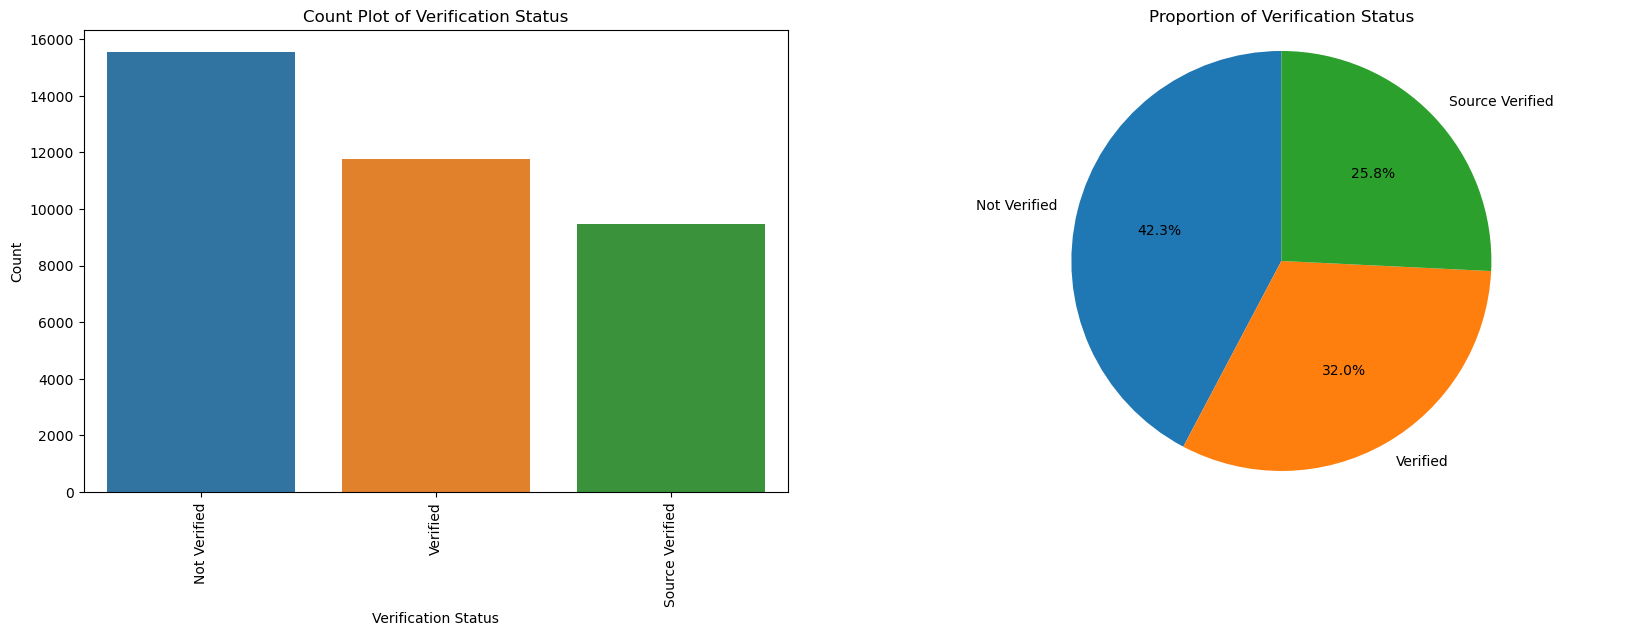

In [87]:
utils.plot_categorical_univariate(df, "verification_status", "Verification Status")

### Observations from univariate analysis on Verification Status(verification_status)

- The count plot shows that the majority of loans in the dataset have not been verified, making 'Not Verified' the most common category in the dataset.
- The 'Verified' and 'Source Verified' statuses have a significant presence as well, with 'Verified' being the second most common.
- The pie chart provides a proportional breakdown, showing that a little over 42% of loans have not undergone any verification, while approximately 32% have been verified, and about 26% have had their source of income verified.


### Inferences from univariate analysis on Verification Status(verification_status)
1. The mode being 'Not Verified' indicates that a lot of the loan applicants in the dataset did not have their income or employment details verified by the lending institution.
2. The substantial proportions of 'Verified' and 'Source Verified' suggest that the lending institution does place importance on the verification process for a significant number of loans. 


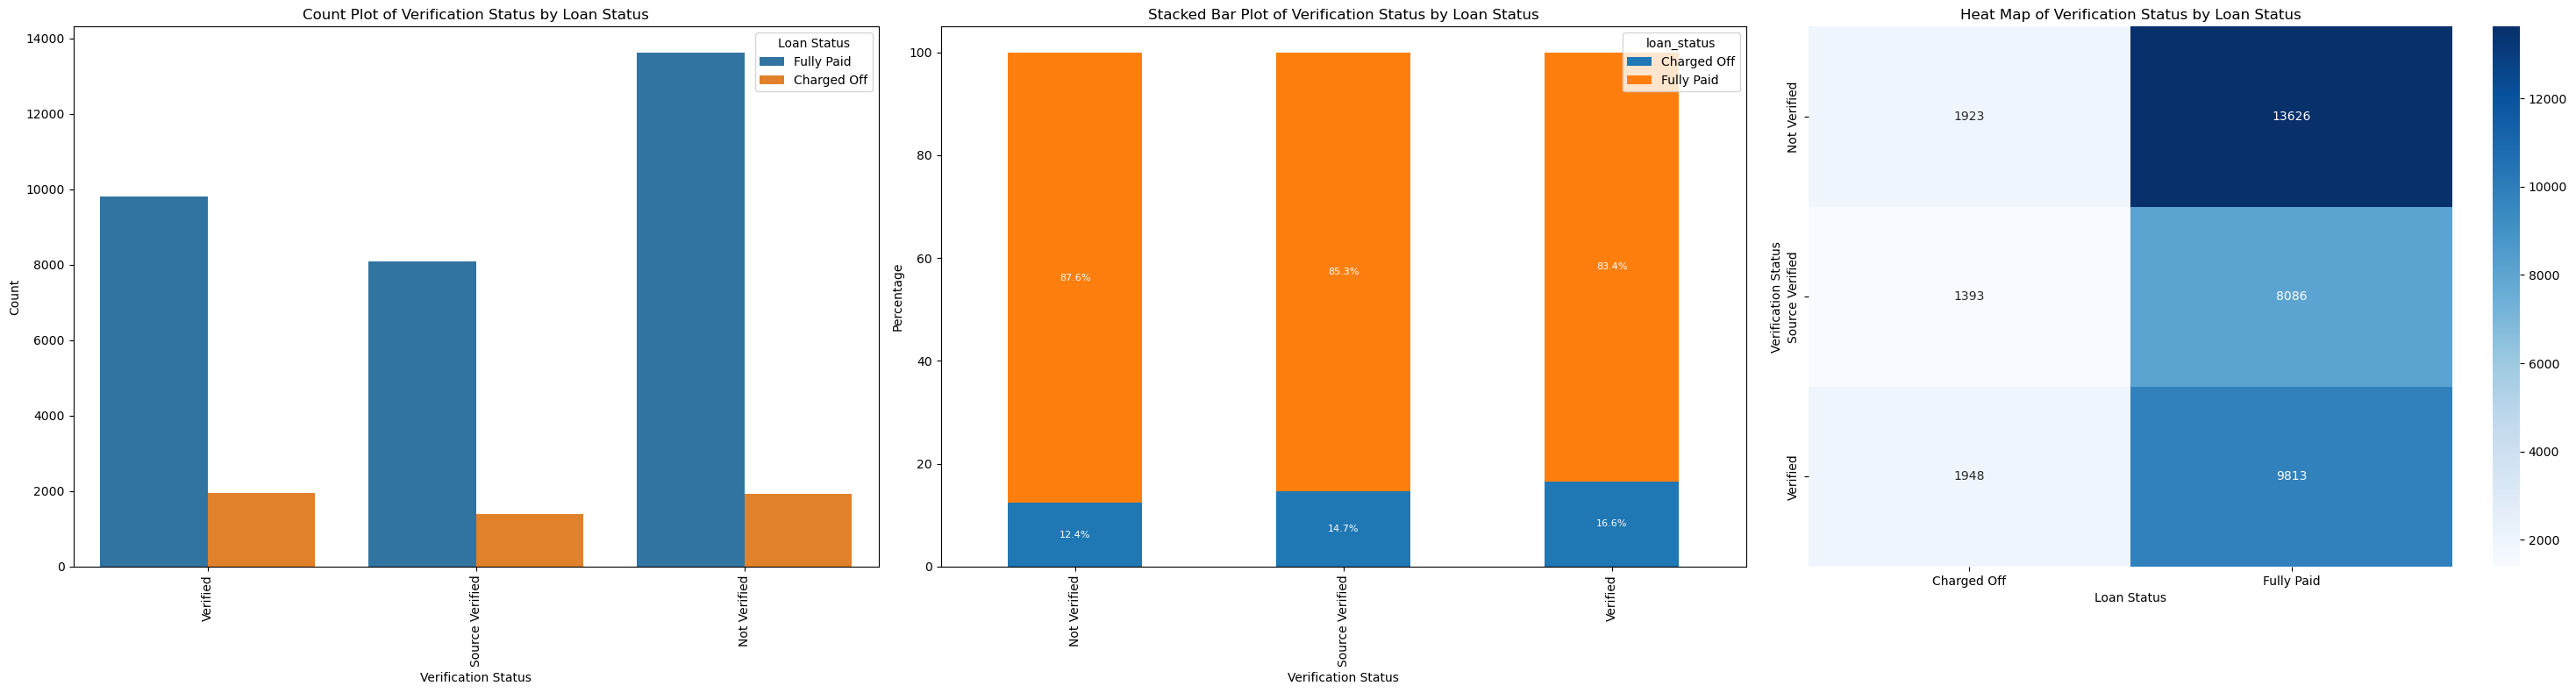

In [88]:
utils.plot_categorical_bivariate(df, "verification_status", "loan_status", "Verification Status", "Loan Status")


### Observations from bivariate analysis on Verification Status(verification_status)

- The count plot displays that across all verification statuses, there are more loans that are fully paid than charged off.
- The proportion of fully paid loans is higher among those with 'Not Verified' status compared to 'Verified' and 'Source Verified'.
- The stacked bar plot reveals a higher percentage of charged off loans in the 'Verified' and 'Source Verified' categories compared to 'Not Verified'.
- The heatmap provides a clear visual representation of the counts of loans by verification status and loan status, emphasizing the larger number of fully paid loans across all verification statuses.


### Inferences from bivariate analysis on Verification Status(verification_status)
1. The higher proportion of charged off loans within the 'Verified' and 'Source Verified' statuses could indicate that the verification process, while important, is not foolproof in predicting loan default.
2. Although there are noticeable differences in the proportion of charged off loans between verified and not verified statuses, it is not enough to conclusively determine the predictive power of verification status alone.
3. Verification status could have a moderate predictive value. 

Predictor Category - Moderately Good

In [89]:
df.head(1)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status      purpose     title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc last_credit_pull_d  pub_rec_bankruptcies  issue_year  issue_month  issue_quarter  credit_history_length  issue_d_year  issue_d_month  issue_d_quarter  issue_d_dayofweek  issue_d_weekofyear issue_d_month_name issue_d_day_name issue_d_year_month  earliest_cr_line_year  earliest_cr_line_month  earliest_cr_line_quarter  earliest_cr_line_dayofweek  earliest_cr_line_weekofyear earliest_cr_line_month_name earliest_cr_line_day_name earliest_cr_line_year_month  last_credit_pull_d_year  last_credit_pull_d_month  last_credit_pull_d_quarter  last_credit_pull_d_dayofweek  last_credit_pull_d_weekofyear last_credit_pull_d_month_name last_credit_pull_d_day_name  \
0       5000         5000           4975.0    36     10.65       162.87     B        B2          10           RENT     24000.0            Verified 2011-12-01  Fully Paid  credit_card  Computer      860         AZ  27.65            0       1985-01-01               1         3        0      13648        83.7          9         2016-05-01                   0.0        2011           12              4             327.666667          2011             12                4                  3                  48           December         Thursday            2011-12                   1985                       1                         1                           1                            1                     January                   Tuesday                     1985-01                     2016                         5                           2                             6                             17                           May                      Sunday   

  last_credit_pull_d_year_month loan_amnt_binned funded_amnt_binned funded_amnt_inv_binned int_rate_binned installment_binned emp_length_binned annual_inc_binned  annual_inc_capped  
0                       2016-05              Low                Low                    Low          Medium                Low         Very High               Low            24000.0

## Univariate Anslysis of Issue Date(issue_d)

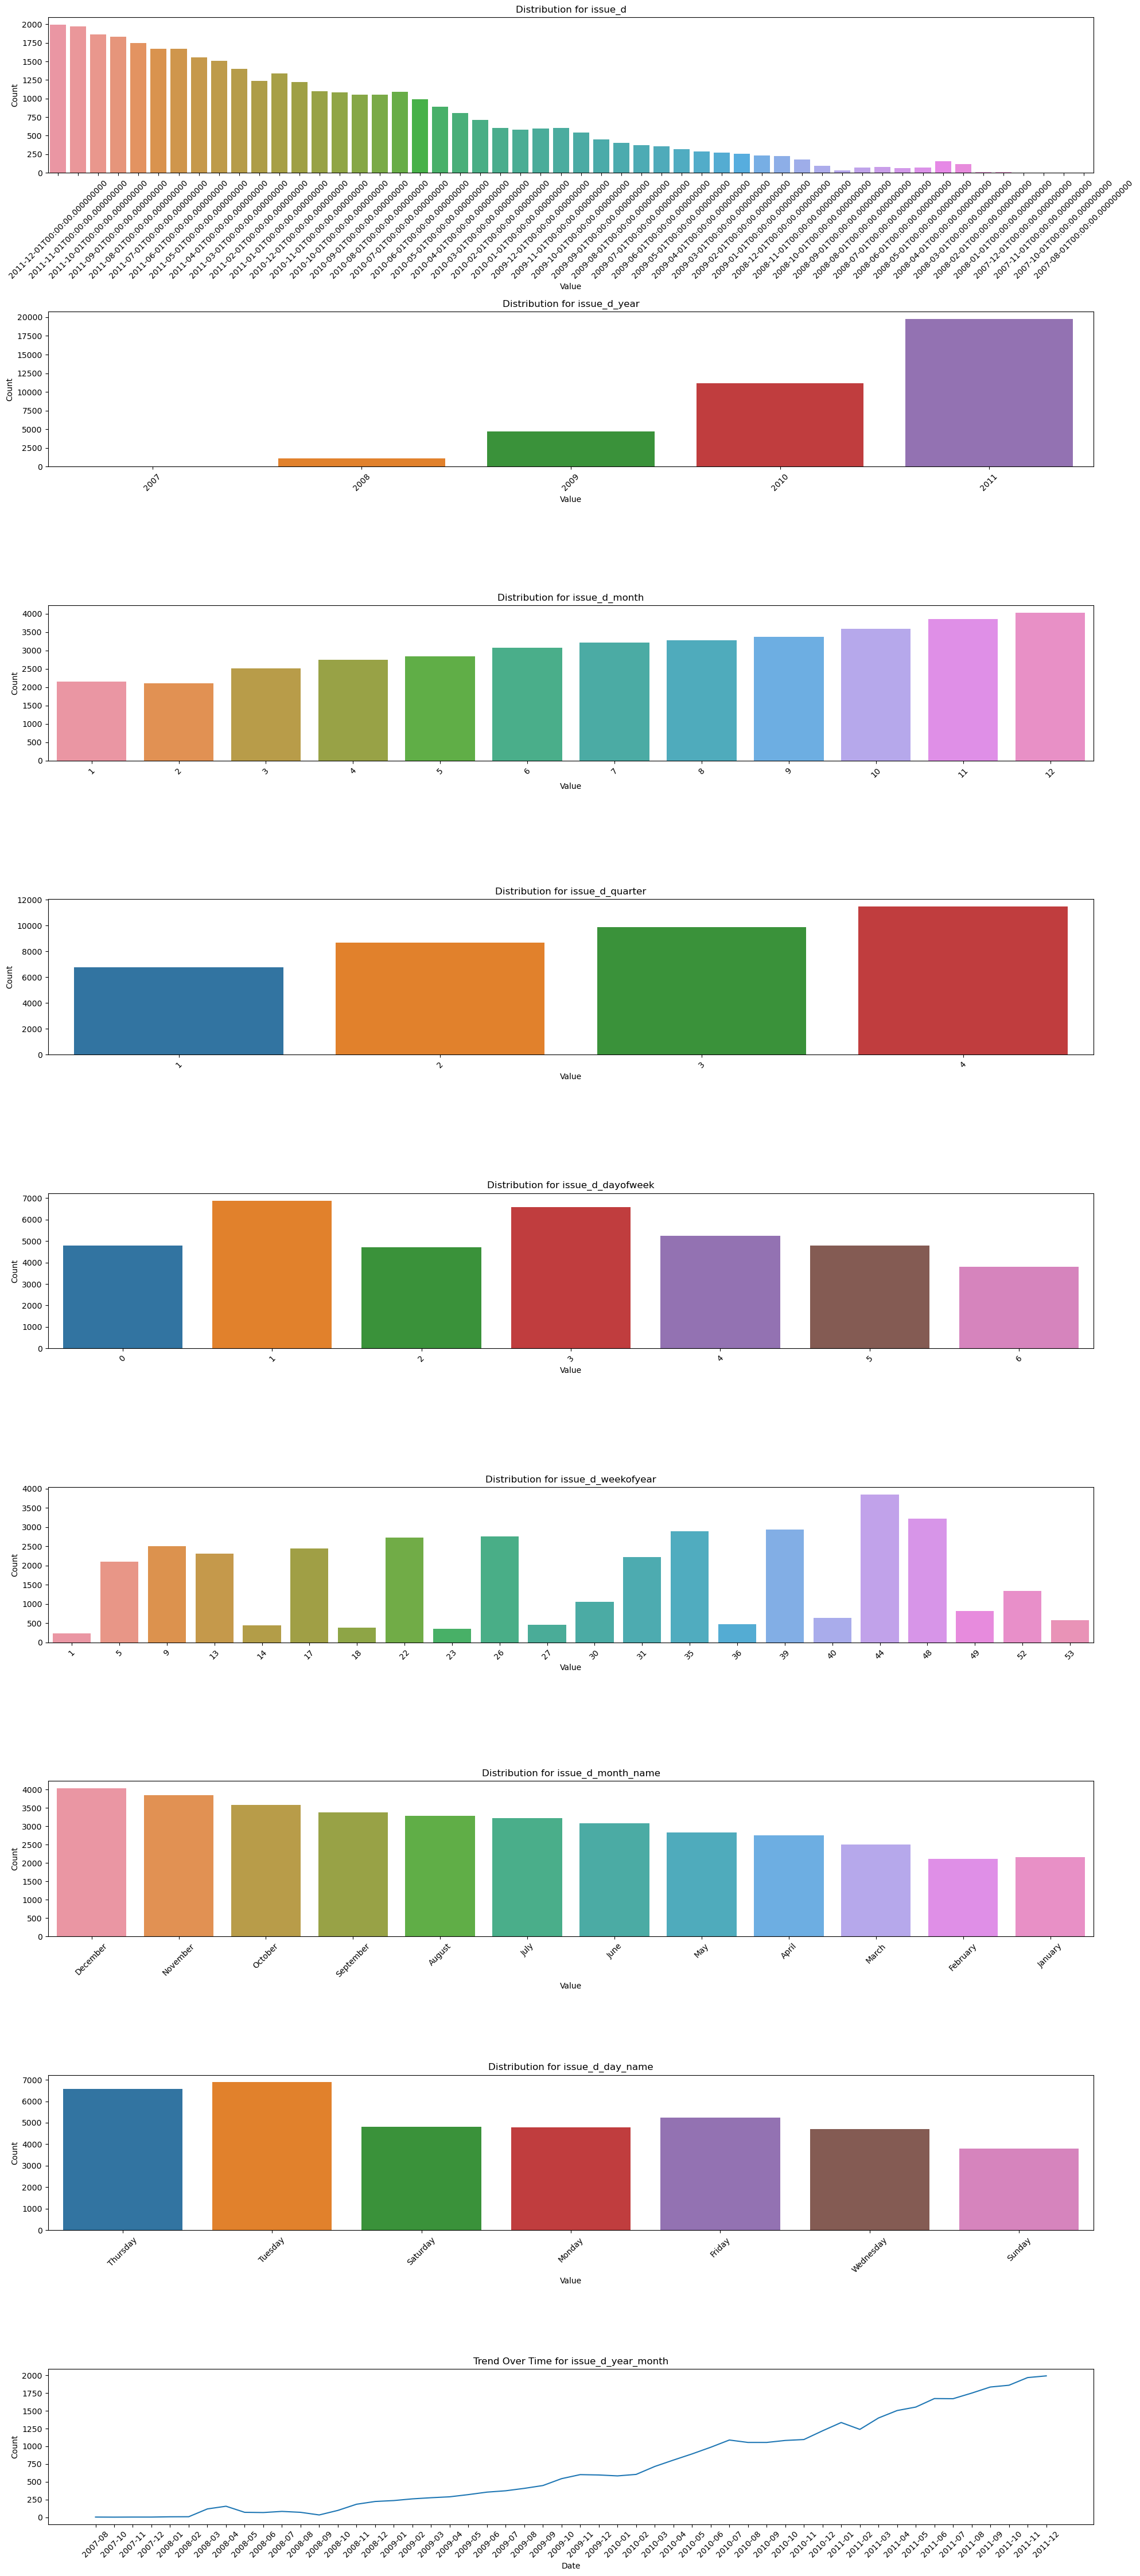

In [90]:
utils.univariate_date_analysis(df, "issue_d")

### Observations from univariate analysis on Issue Date(issue_d)

- Distribution Over Time (Year and Month):
    - There is a clear upward trend in the number of loans issued over time
    - most loans were issued in the later years
- Monthly Distribution:
    - Loan issuance seems to be relatively uniform across different months
- Quarterly Distribution
    - some quarters having significantly higher numbers of issued loans than others. perhaps, due to economic or business cycles affecting borrowing behavior
- Week of the Year:
    - some variability in the number of loans issued in different weeks of the year, consistent with varying Quarterly Distribution

### Inferences from univariate analysis on Issue Date(issue_d)
1. increasing trend in the number of loans issued over tim
2. there might be certain times of the year when people are more likely to take out loans.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


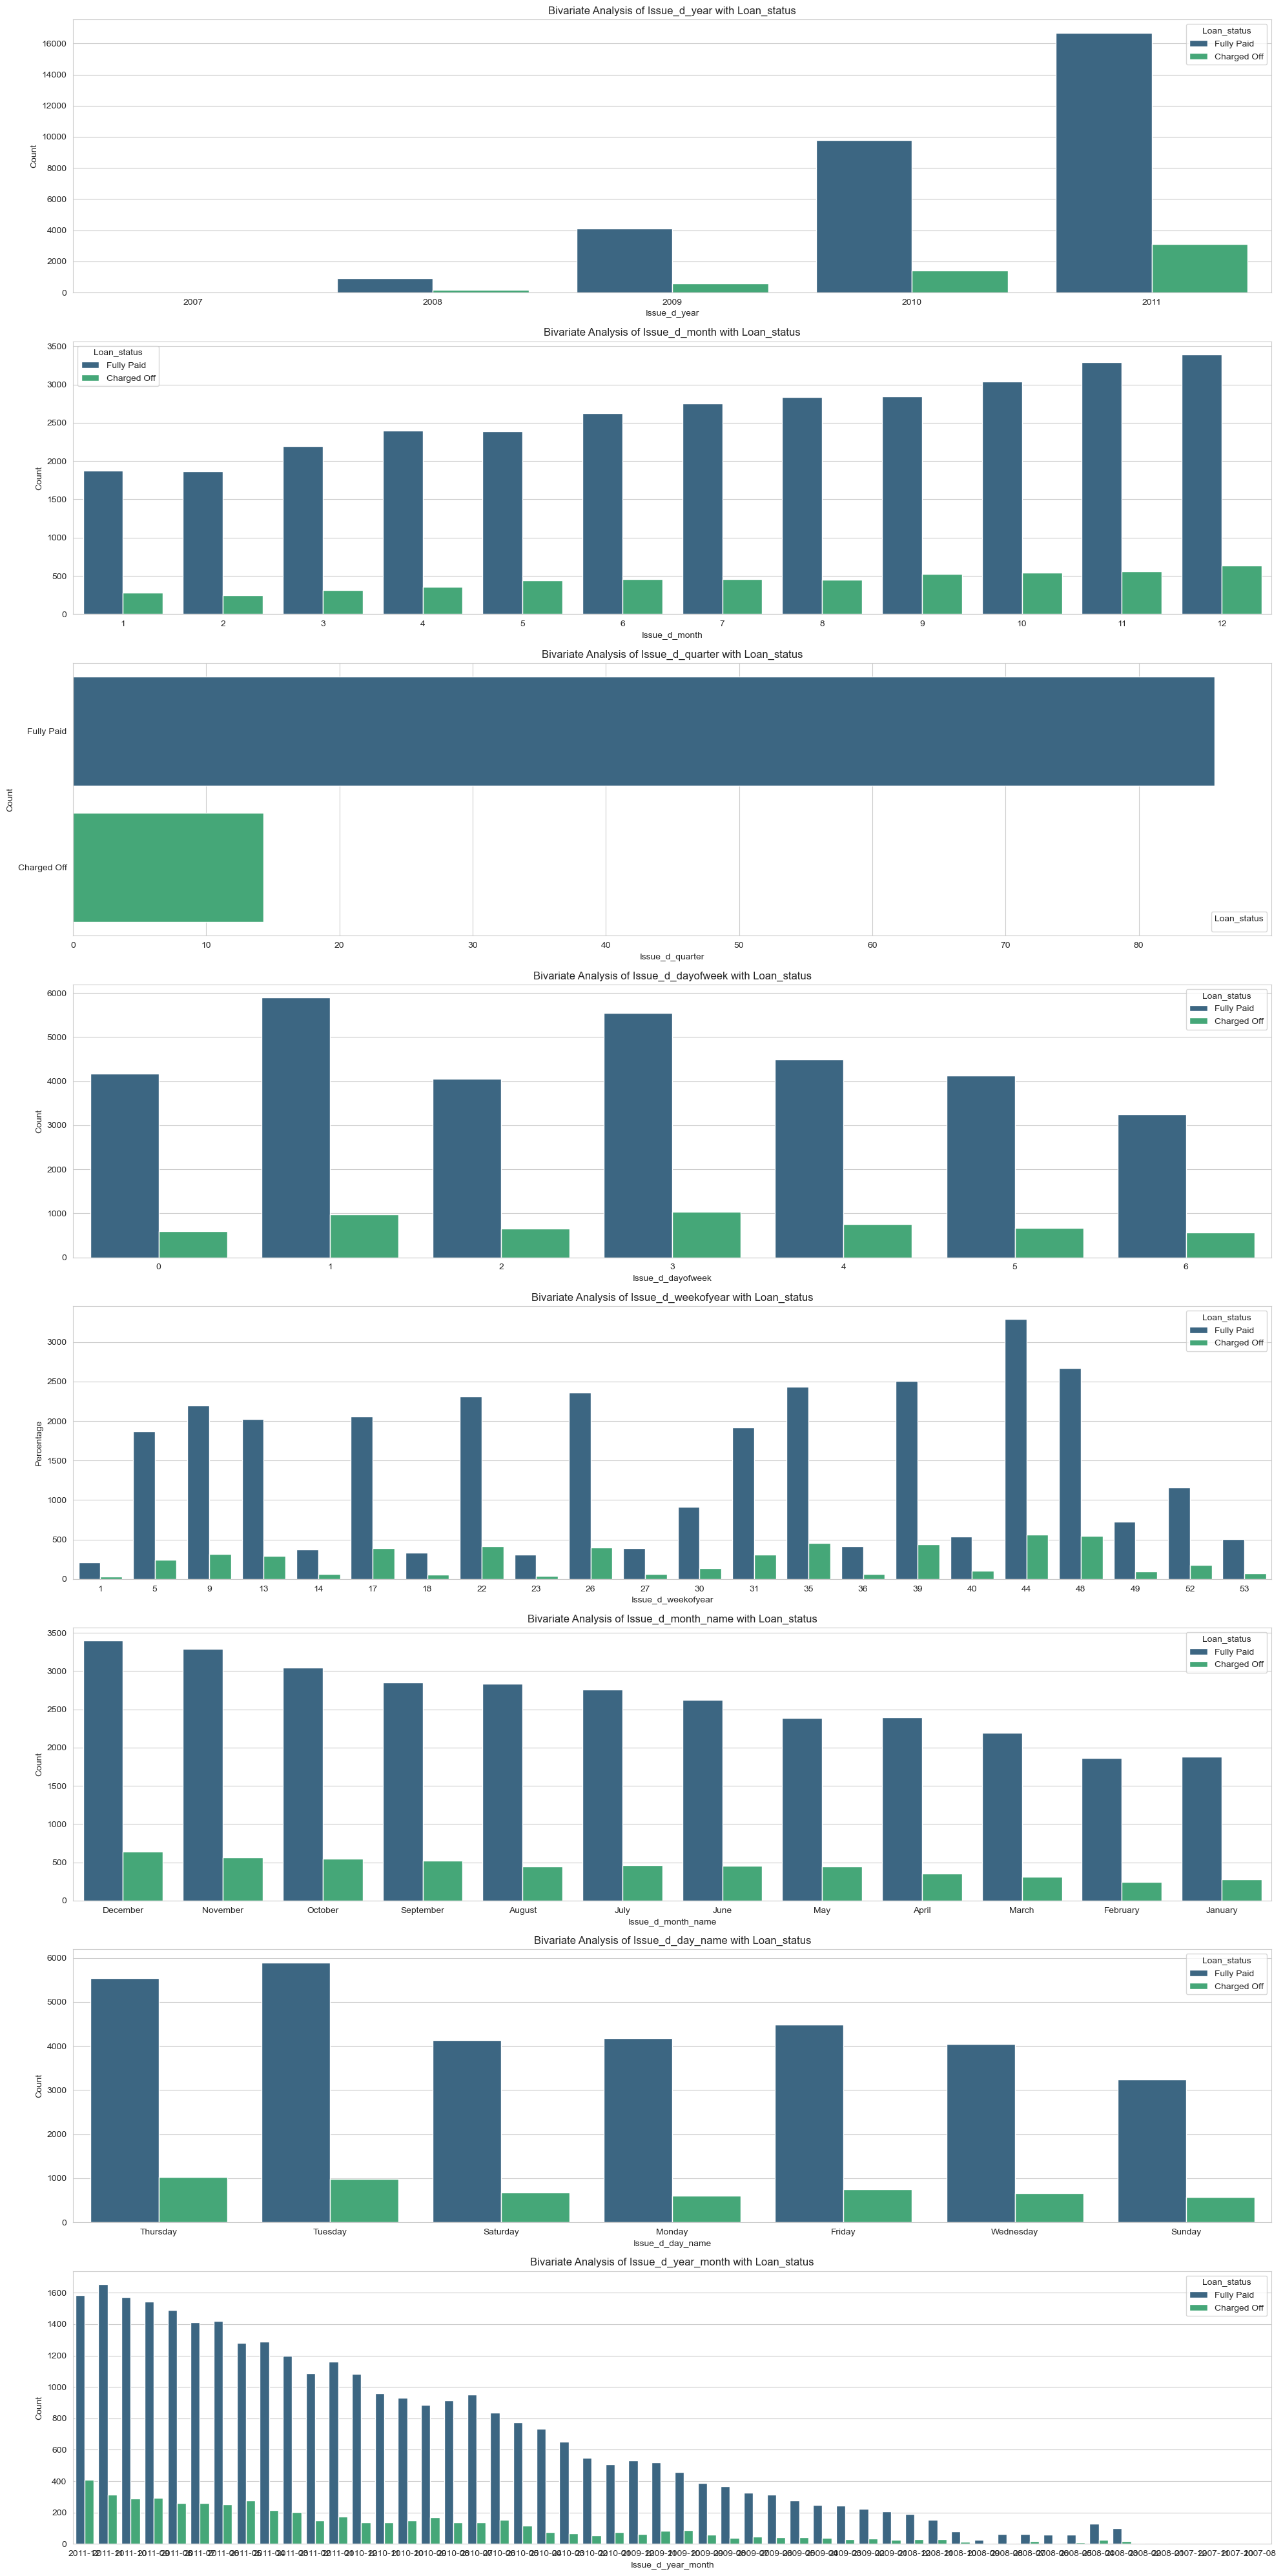

In [91]:
utils.bivariate_date_analysis(df, 'issue_d', 'loan_status')

### Observations from bivariate analysis on Issue Date(issue_d)

- No correlation found with loan status. Not a good predictor

Predictor Category - No Impact


## Univariate Anslysis of Purpose(purpose)

Summary statistics for 'Purpose':
debt_consolidation    17370
credit_card            4798
other                  3593
home_improvement       2734
major_purchase         2054
small_business         1654
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             294
renewable_energy         94
Name: purpose, dtype: int64

Mode: debt_consolidation


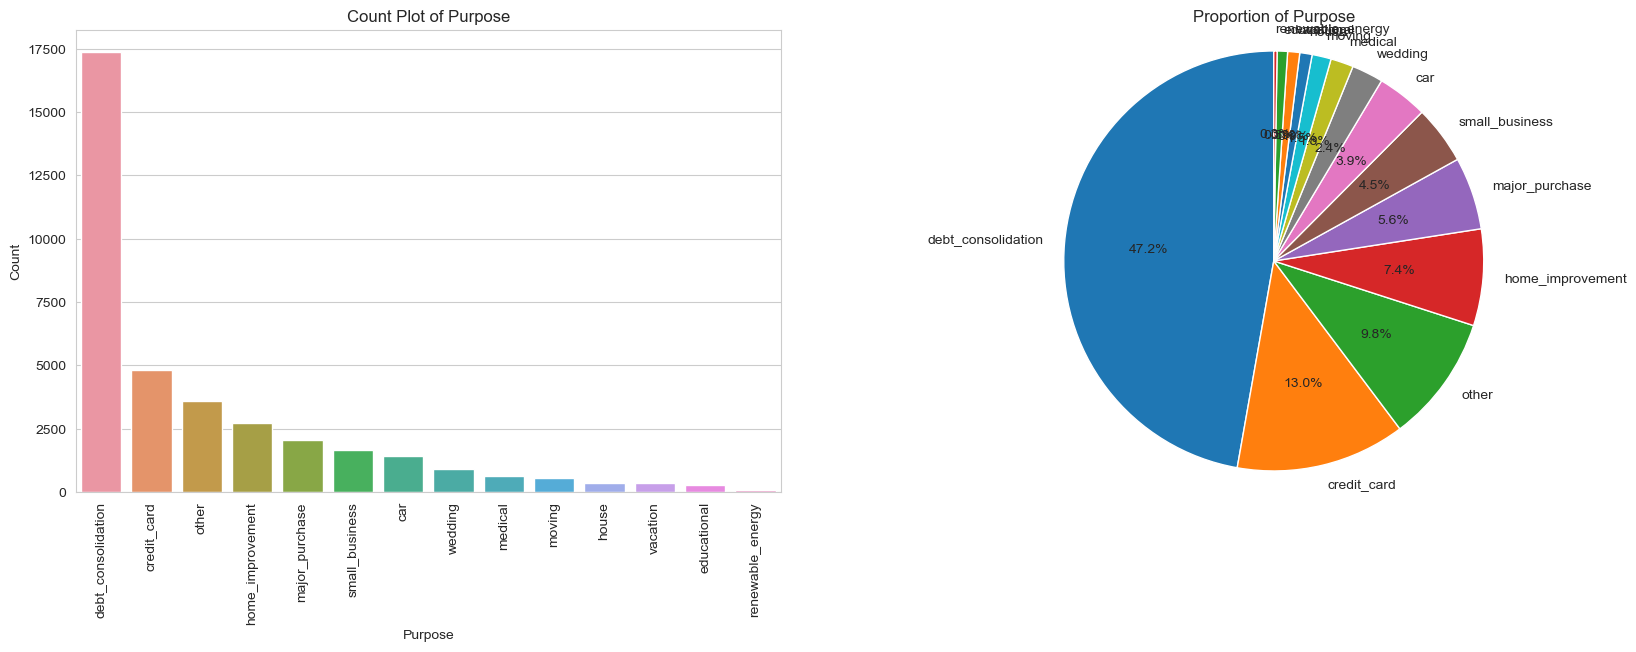

In [92]:
utils.plot_categorical_univariate(df, "purpose", "Purpose")

### Observations/Inferences from univariate analysis on Purpose(purpose)

- The most common purpose for taking out loans is 'debt_consolidation,' accounting for nearly half of all loans. This suggests that a significant portion of borrowers are seeking to refinance or consolidate existing debts, which could be a reflection of financial strategy or financial distress among borrowers.
- 'Credit_card' is the second most common purpose, indicating that many borrowers are using these loans to pay off credit card balances
- Other purposes like 'home_improvement', 'major_purchase', and 'small_business' are less frequent but still notable. These purposes might be associated with investments in personal assets or entrepreneurship efforts, respectively.
- Purposes such as 'medical', 'moving', 'vacation', and 'educational' are relatively uncommon.
- 'Renewable_energy' has the fewest loans, suggesting either a niche market for this type of loan or a lack of awareness or availability of loans for this purpose.


## Bivariate Anslysis of Purpose(purpose)

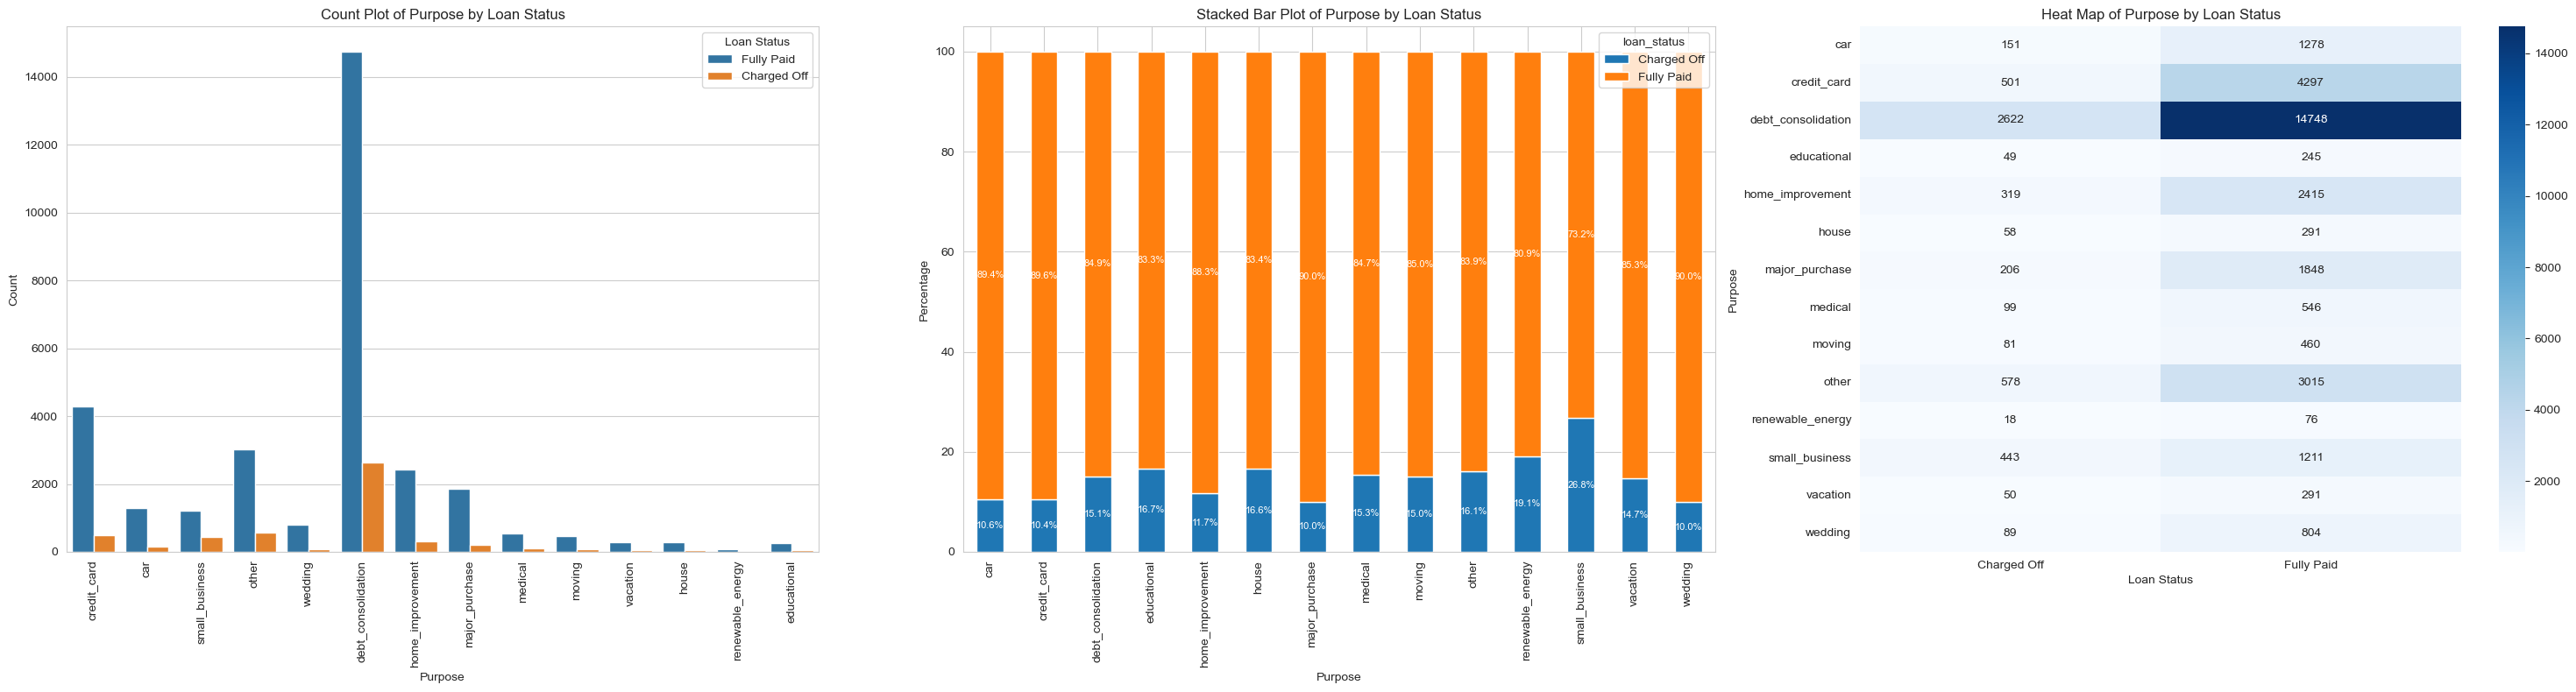

In [93]:
utils.plot_categorical_bivariate(df, "purpose", "loan_status", "Purpose", "Loan Status")

### Observations from bivariate analysis on Purpose(purpose)

- 'Credit_card' loans represent a large portion of the loans that are fully paid, which might imply that borrowers who take loans to manage credit card debt are more likely to pay off their loans.
- The 'small_business' purpose has a higher proportion of charge-offs relative to its overall frequency. This could suggest that loans taken for small business purposes carry a higher risk, which is an important consideration for risk assessment.
- The 'other' category, which could encompass a variety of unspecified purposes, shows a relatively high proportion of charge-offs. 

### Inferences from bivariate analysis on Purpose(purpose)

- The observed patterns suggest that certain purposes may be associated with higher risk, but the predictive strength of this feature alone may be limited. 
- It is more likely to be a moderate predictor when used in isolation

Predictor Category - Moderately Good


## Univariate Anslysis of Title(title)

Summary statistics for 'Title':
Debt Consolidation                        2030
Debt Consolidation Loan                   1582
Personal Loan                              600
Consolidation                              473
debt consolidation                         453
                                          ... 
Consolidate Car                              1
Albert 1                                     1
Help me help others rental property          1
reborn                                       1
Merging 2 Accounts into one to save $$       1
Name: title, Length: 18401, dtype: int64

Mode: Debt Consolidation


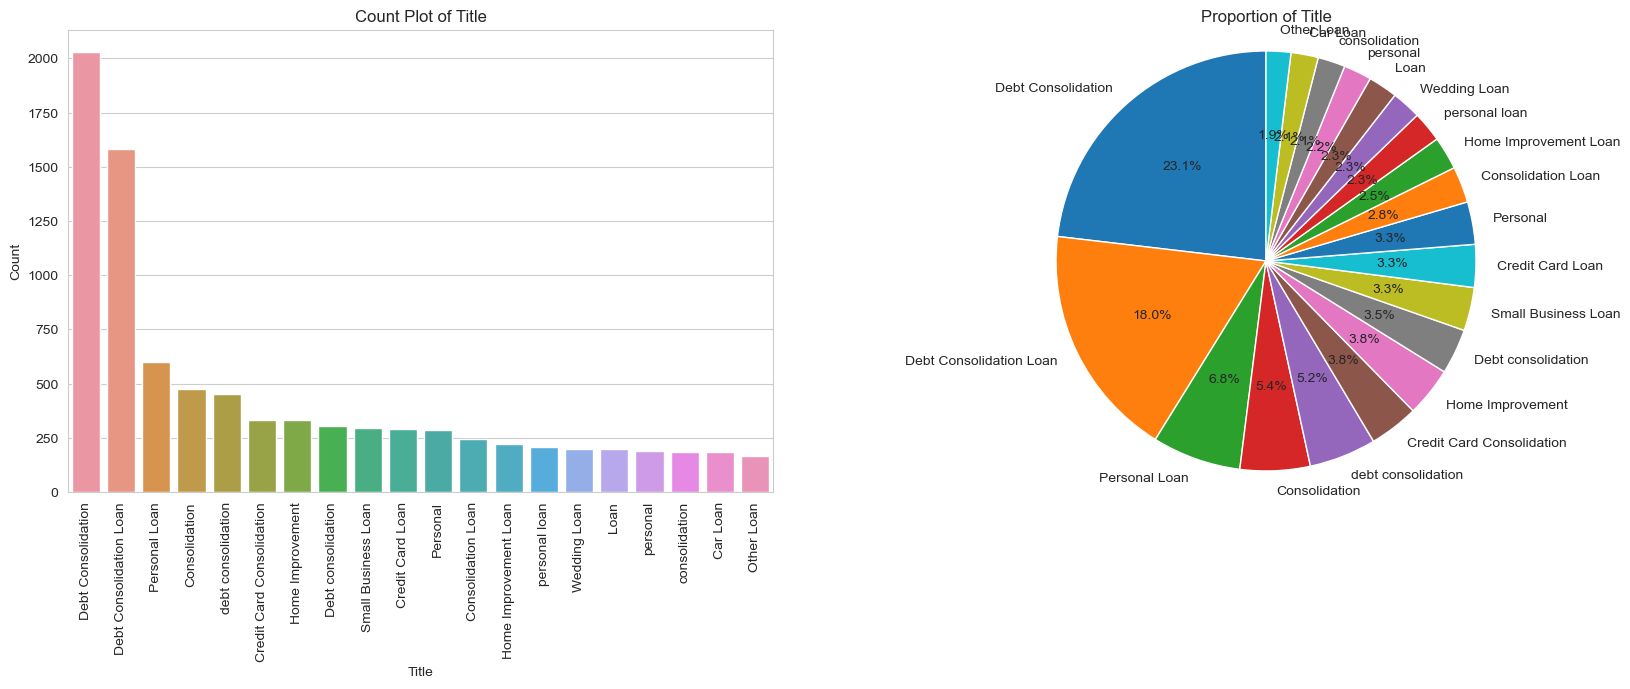

In [94]:
utils.plot_categorical_univariate(df, "title", "Title", top_20=True)

### Observations/Inferences from univariate analysis on Purpose(purpose)

- The majority of titles are related to debt consolidation, with 'Debt Consolidation' being the most common title, followed by 'Debt Consolidation Loan'. This dominance in the data suggests that borrowers often seek loans to consolidate existing debts into a single payment, which is consistent with the findings from the analysis of the purpose variable.
- The count plot shows a long tail of unique, less common titles, indicating a wide range of less frequent, possibly more personal or specific uses for the loans. The presence of unique and single-occurrence titles reflects the diverse needs and financial strategies of borrowers.
- The pie chart illustrates the proportion of each title, with 'Debt Consolidation' and 'Debt Consolidation Loan' together making up a significant portion of the loans. 

## Bivariate Anslysis of Title(title)

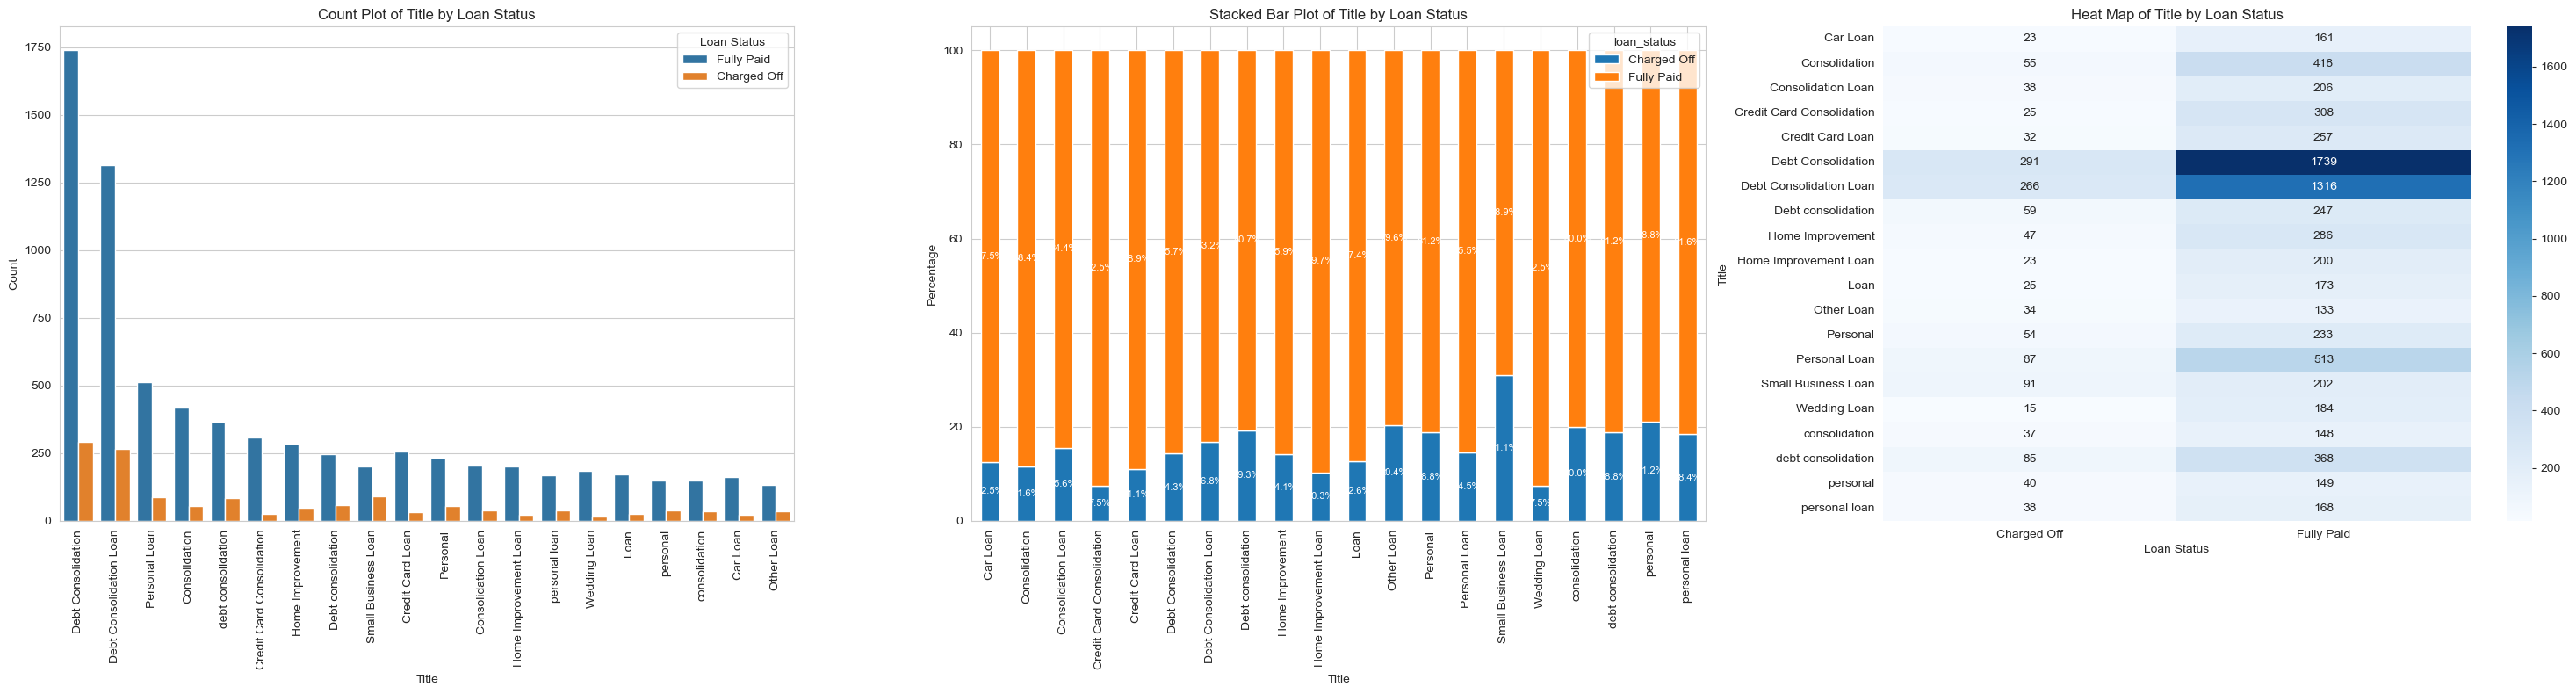

In [95]:
utils.plot_categorical_bivariate(df, "title", "loan_status", "Title", "Loan Status", top_20=True)


### Observations from bivariate analysis on Title(title)

- Stacked Bar plot shows the percentage of charged-off loans is higher in the "Small Business Loan" category, indicating that loans taken out for small businesses may have a higher risk of default.
- Titles related to personal loans and weddings show a relatively lower percentage of charged-off loans compared to other titles, suggesting these might be associated with a lower risk of default.

### Inferences from bivariate analysis on Title(title)

- The "Title" feature can be considered a moderate predictor for loan status, given the variation in charged-off rates across different titles.
- Problem is - large number of unique titles and some overlap in titles that essentially mean the same thing (e.g., "Debt Consolidation" and "debt consolidation")

Predictor Category - Weak

## Univariate Anslysis of Zip Code(zip_code)

Summary statistics for 'Zip Code':
100    550
945    513
112    484
606    481
070    437
      ... 
007      1
332      1
461      1
093      1
479      1
Name: zip_code, Length: 808, dtype: int64

Mode: 100


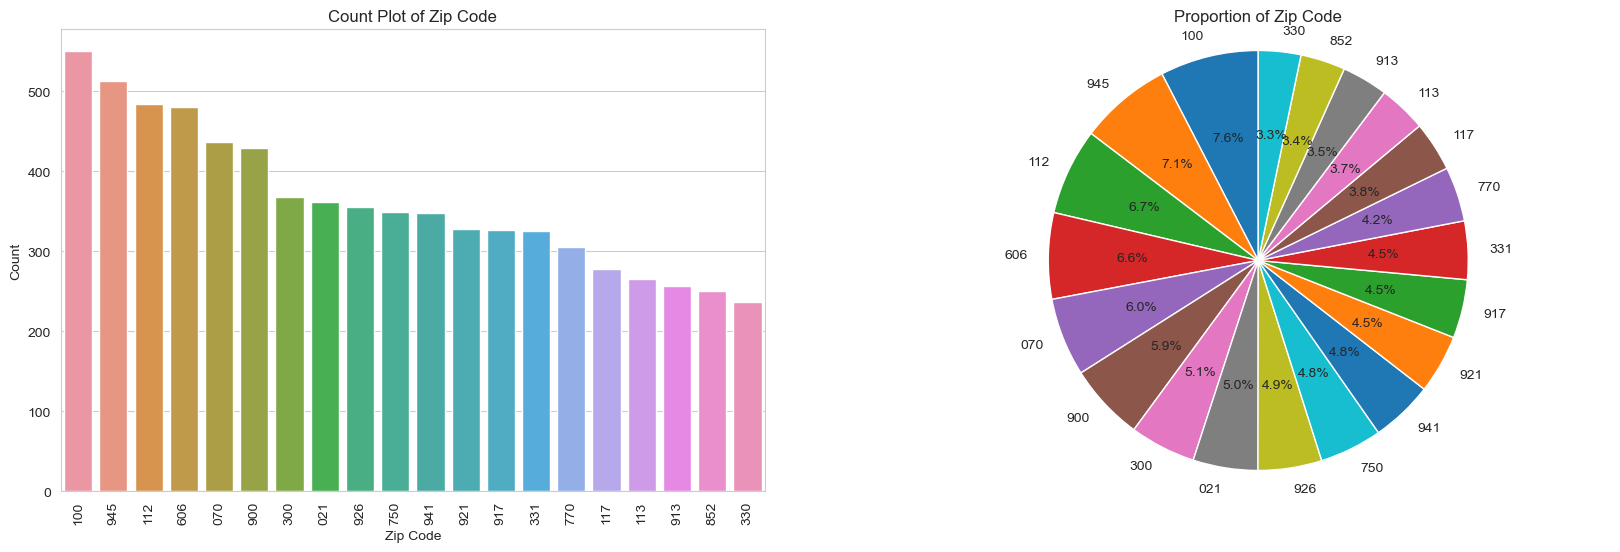

In [96]:
utils.plot_categorical_univariate(df, "zip_code", "Zip Code", top_20=True)

### Observations/Inferences from univariate analysis on Zip Code(zip_code)

- The count plot shows that some zip codes appear more frequently than others in the dataset. The zip code "100" has the highest count, indicating that it is the most common among the loan applicants, followed by "945" and "112".
- There is a noticeable drop in frequency as we move from the most common to less common zip codes, suggesting that certain areas have more loan applicants.
- The pie chart highlights the proportion of loans by zip code for the top 20 zip codes. It shows a diverse spread, with the "100" zip code making up the largest slice, indicating a higher concentration of loans in this area.

## Bivariate Anslysis of Zip Code(zip_code)

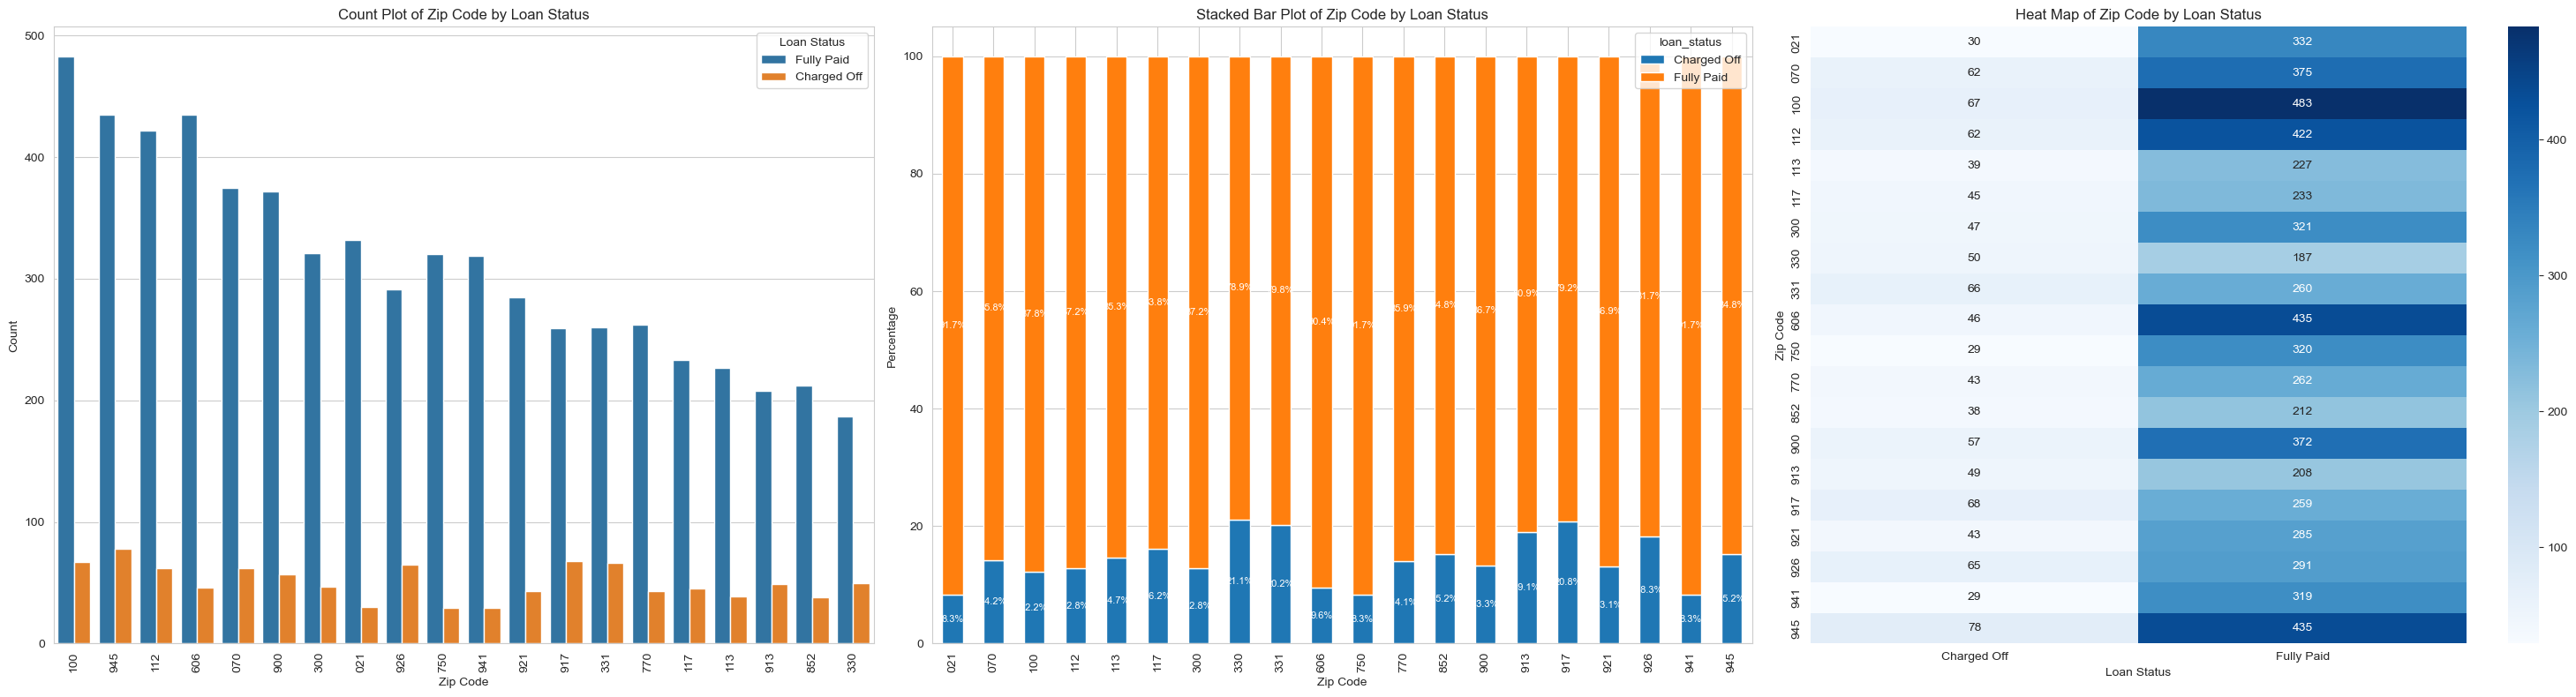

In [97]:
utils.plot_categorical_bivariate(df, "zip_code", "loan_status", "Zip Code", "Loan Status", top_20=True)

### Observations from bivariate analysis on zip code(zip_code)

- The proportion of charged off loans is relatively consistent across the top zip codes, suggesting that zip code alone may not be a strong indicator of loan status.
- Some zip codes have a noticeably higher proportion of loans that have been charged off. This could indicate areas with potentially higher risk
- The heat map provides a visual representation of the frequency of the loan statuses across the top zip codes. It is evident that some zip codes have a higher count of fully paid loans, while others have more charged off loans.
- The darker shades in the heat map for fully paid loans in some zip codes suggest a higher concentration of loans in those areas, which could correlate with factors like economic activity or population density.

### Inferences from bivariate analysis on zip code(zip_code)

- zip code as a feature for predicting loan status can be considered a moderate predictor. It may carry some predictive power due to regional economic variables, but it is not distinctly strong enough to be a predictor on its own.

Predictor Category - Moderately Good

## Univariate Anslysis of State(addr_state)

Summary statistics for 'State':
CA    6676
NY    3510
FL    2639
TX    2554
NJ    1730
IL    1429
PA    1424
VA    1306
GA    1294
MA    1229
OH    1126
MD     978
AZ     790
WA     760
CO     720
CT     697
NC     694
MI     662
MO     638
MN     573
NV     460
SC     443
OR     414
AL     410
WI     408
LA     408
KY     305
OK     280
KS     241
UT     241
AR     223
DC     206
RI     190
NM     173
WV     164
HI     160
NH     154
DE     107
MT      77
AK      75
WY      75
SD      59
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: addr_state, dtype: int64

Mode: CA


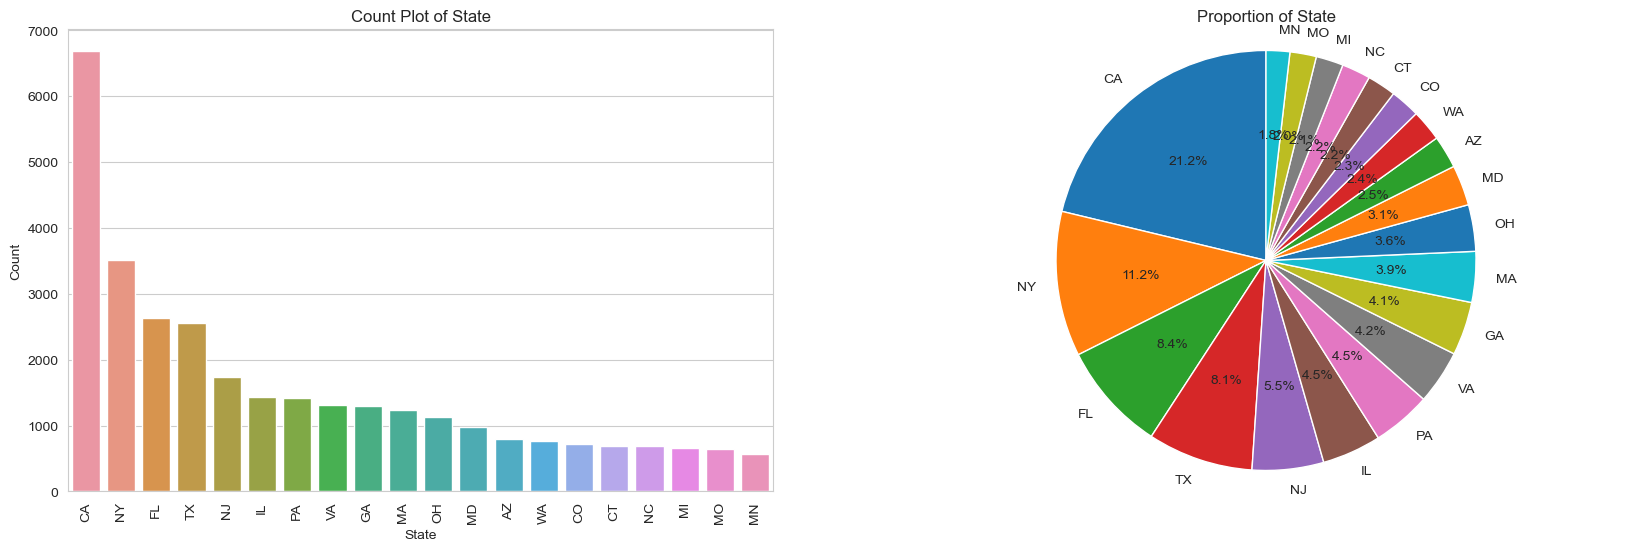

In [98]:
utils.plot_categorical_univariate(df, "addr_state", "State", top_20=True)

### Observations/Inferences from univariate analysis on State(addr_state)

- The count plot shows a significant variance in the number of loans across different states, with California (CA) having the highest number of loans followed by New York (NY), Florida (FL), and Texas (TX).
- The pie chart shows that a substantial portion of the loans are concentrated in a few states, with CA accounting for over a fifth of all loans in the dataset. 
- The summary statistics indicate a wide range of counts across states, with CA having the most loans and several states having notably fewer. This variation suggests that the loan distribution is not uniform across the country.

## Bivariate Anslysis of State(addr_state)

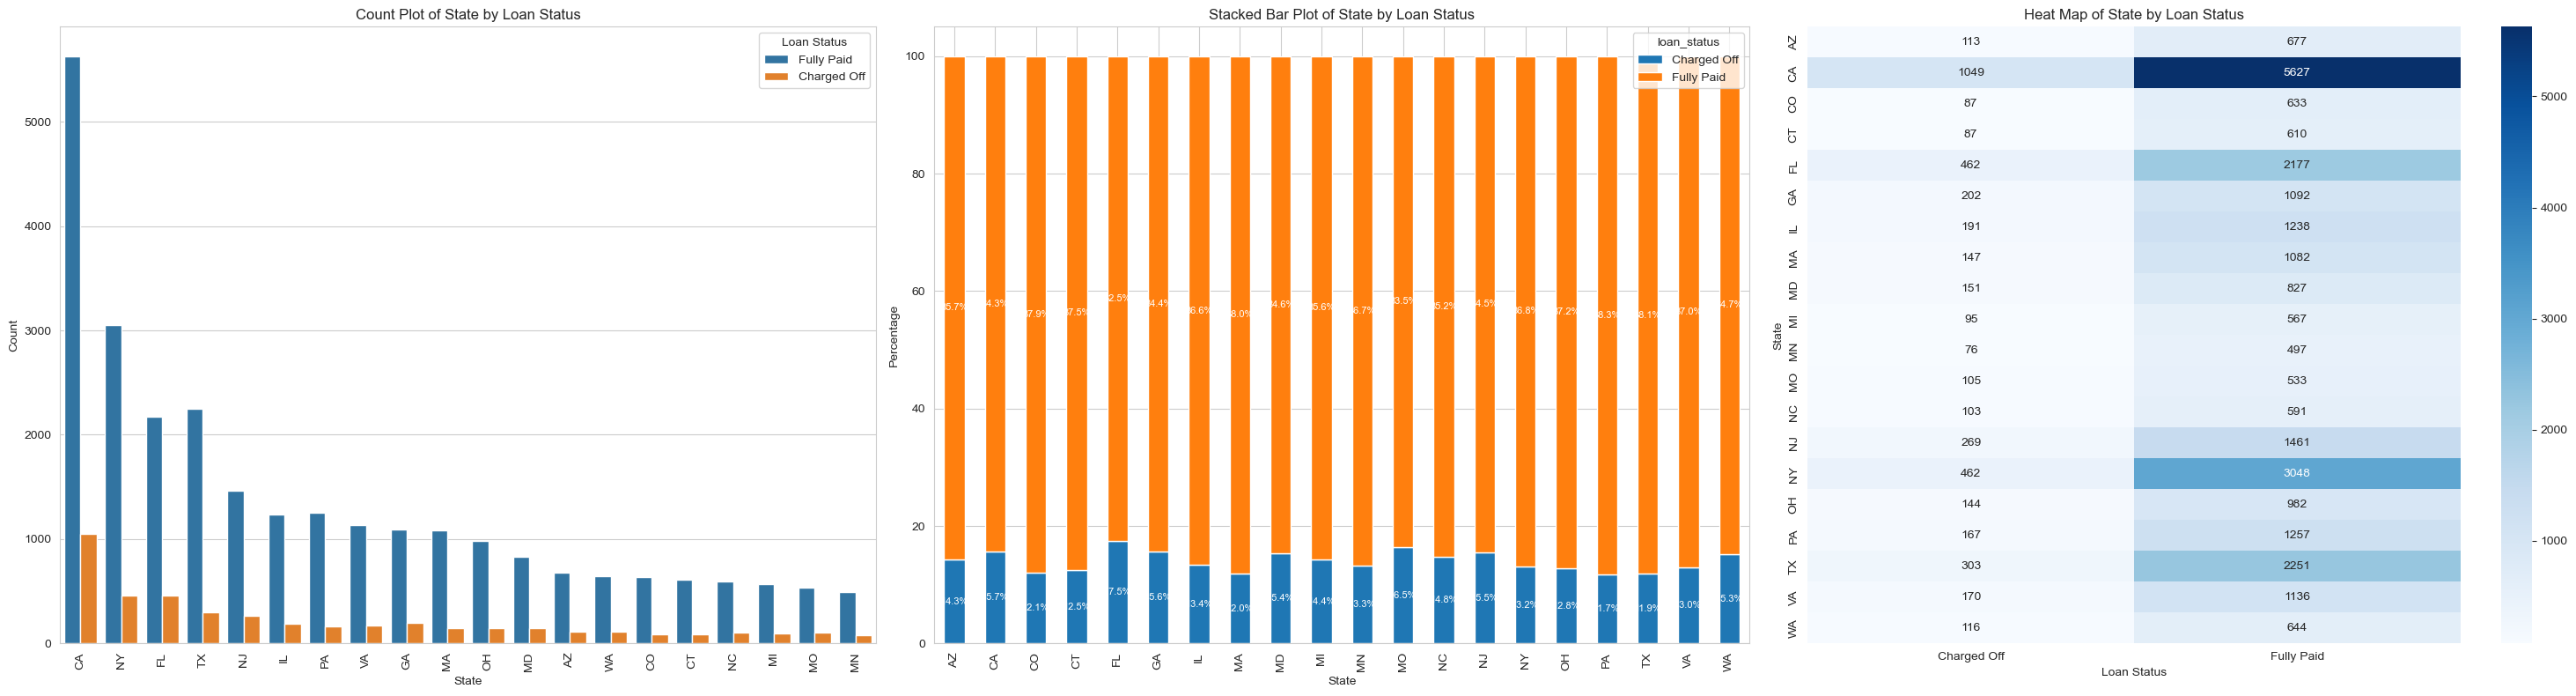

In [99]:
utils.plot_categorical_bivariate(df, "addr_state", "loan_status", "State", "Loan Status", top_20=True)

### Observations from bivariate analysis on State(addr_state)

- There is a general trend where states with higher total loan counts also have a higher count of both fully paid and charged-off loans.
- The proportion of charged-off loans appears relatively consistent across states, suggesting that while the number of loans varies greatly by state, the proportion that ends up charged off is somewhat stable, with a little variations in relative distribution. 

### Inferences from bivariate analysis on state(addr_state)

- "State" feature in isolation may not be a Good predictor.

Category - No Impact


## Univariate Anslysis of Debt to Income ratio(dti)

Summary statistics for 'Debt to Income Ratio':
count    36789.000000
mean        13.335427
std          6.649881
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


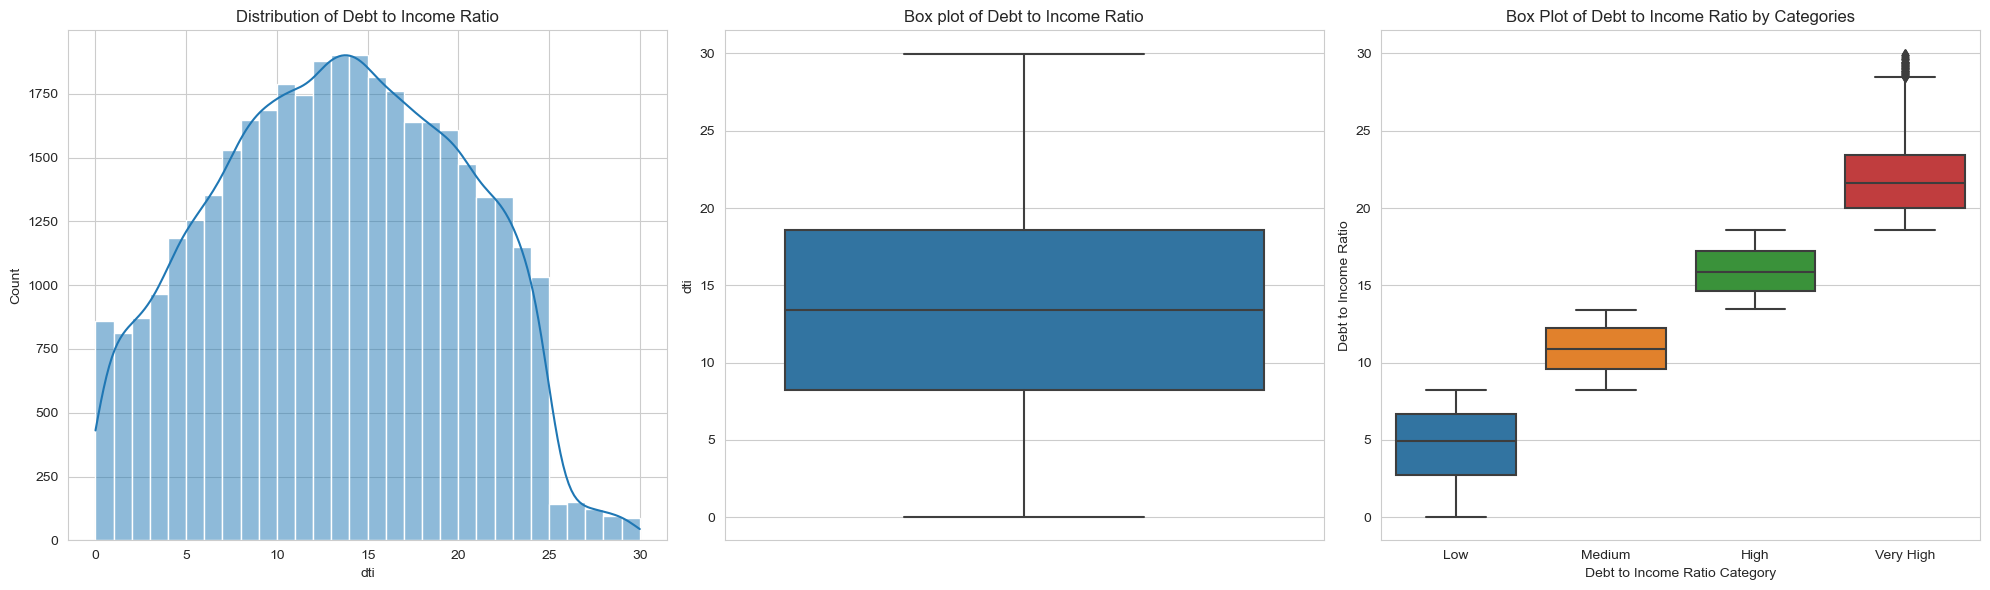

In [100]:
utils.plot_numerical_univariate(df, "dti", "Debt to Income Ratio")

### Observations/Inferences from univariate analysis on Debt to Income Ratio(dti)

- The distribution of the DTI appears to be fairly normal but slightly right-skewed, indicating that most borrowers have a moderate level of debt compared to their income, with fewer borrowers having very high or very low DTI ratios.
- he box plot indicates a median DTI ratio of around 13.43, consistent with the mean DTI of 13.33, suggesting a fairly balanced distribution.
- There are outliers present on the higher end of the DTI spectrum, as indicated by the points beyond the upper whisker of the box plot. These outliers represent borrowers with particularly high debt relative to their income.
- The categorical box plot divides the DTI into quartiles and shows a clear progression in median values from low to very high categories, with the 'Very High' category exhibiting the largest range and variance, indicating greater variability in the DTI ratios among borrowers with higher debt levels.
- The 'Low' DTI category shows a tight interquartile range, suggesting that borrowers in this group have a more consistent, lower debt burden relative to their income.
- The data contains 36,789 observations with a mean DTI of 13.33 and a standard deviation of 6.65. This standard deviation is relatively high, showing that there is considerable variation in the DTI of borrowers.
- The minimum DTI is 0 (possibly indicating no debt or negligible debt relative to income), and the maximum is just shy of 30, which is quite high and likely represents a significant debt burden.
- Based on the data, most borrowers are within a reasonable DTI range, but there is a notable segment with higher ratios that could be considered riskier.

## Bivariate Anslysis of Debt to Income Ratio(dti) versus Loan Status(loan_status)

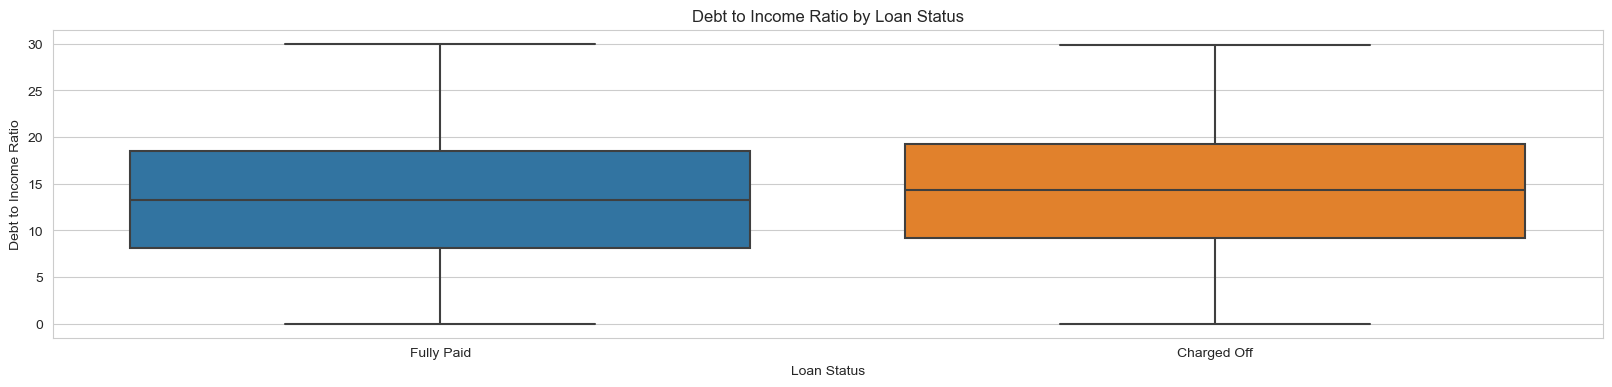

In [101]:
utils.plot_numerical_bivariate(df, "dti", "loan_status", "Debt to Income Ratio", "Loan Status")

### Observations from univariate analysis on Debt to Income Ratio(dti)

- The median DTI ratio for both Fully Paid and Charged Off loans is similar, indicating that the median borrower's debt relative to their income does not significantly differ between the two groups.
- However, the range and interquartile range (IQR) for Charged Off loans appear wider than those for Fully Paid loans. This suggests that there is more variability in the DTI among borrowers whose loans have been charged off.

### Inferences from univariate analysis on Debt to Income Ratio(dti)
- While the median DTI ratios do not differ markedly between the two loan statuses, the broader spread for Charged Off loans may imply that as DTI increases, so does the risk of a loan being charged off.
- In conclusion, the DTI ratio, when considered with loan status, suggests that borrowers with higher DTI ratios are more likely to have their loans charged off, although the effect is not strong enough to rely on DTI as the sole predictor of loan default.

Predictor Category - Good Predictor

## Univariate Anslysis of Deliquency in 2 years(delinq_2yrs)
* With so many zeroes, and discrete values, it's acting as a categorical data

Summary statistics for 'Deliquency in 2 years':
0     32801
1      3061
2       634
3       198
4        56
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

Mode: 0


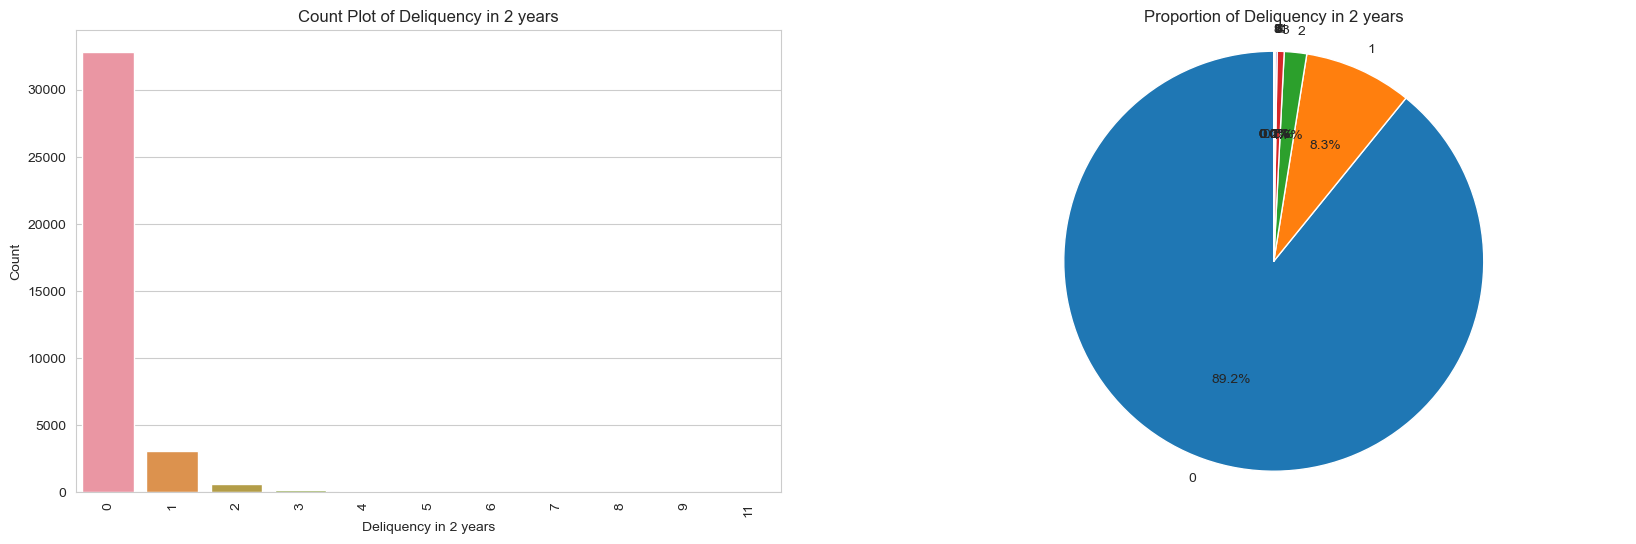

In [102]:
utils.plot_categorical_univariate(df, "delinq_2yrs", "Deliquency in 2 years")

### Observations from univariate analysis on Deliquency in 2 years(delinq_2yrs)

- The vast majority of borrowers, 89.2%, have had no delinquency on their credit file for the past two years.
- A smaller segment, 8.3%, has had one instance of delinquency.
- Very few borrowers show a higher number of delinquencies (from 2 to 11), with these categories collectively making up a minor proportion of the total.
- There are outliers in the data, as indicated by the presence of a few borrowers with a high number of delinquencies (9 and 11 occurrences).
- The mode of the distribution is '0', indicating that the most common value is no delinquency.

### Inferences from univariate analysis on Deliquency in 2 years(delinq_2yrs)
- The 'Delinquency in 2 years' feature shows a heavily skewed distribution with a concentration at '0', which suggests that most borrowers are generally reliable in avoiding delinquency.
- The presence of borrowers with multiple delinquencies, although few, might be indicative of a segment with significant financial distress or higher risk, which could be important for certain types of analysis or predictive modeling.

## Bivariate Anslysis of Deliquency in 2 years(delinq_2yrs) versus Loan Status(loan_status)

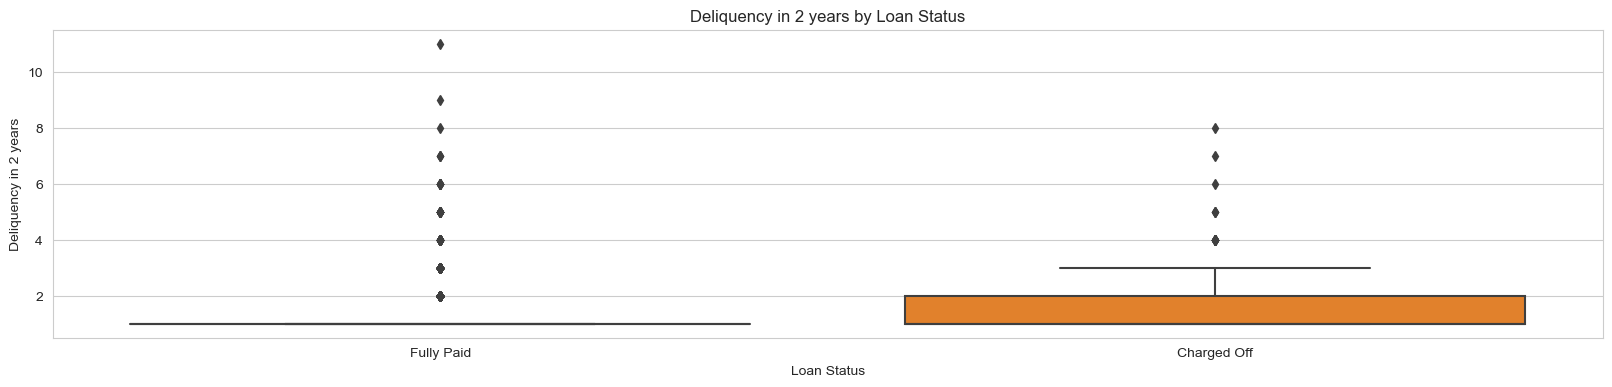

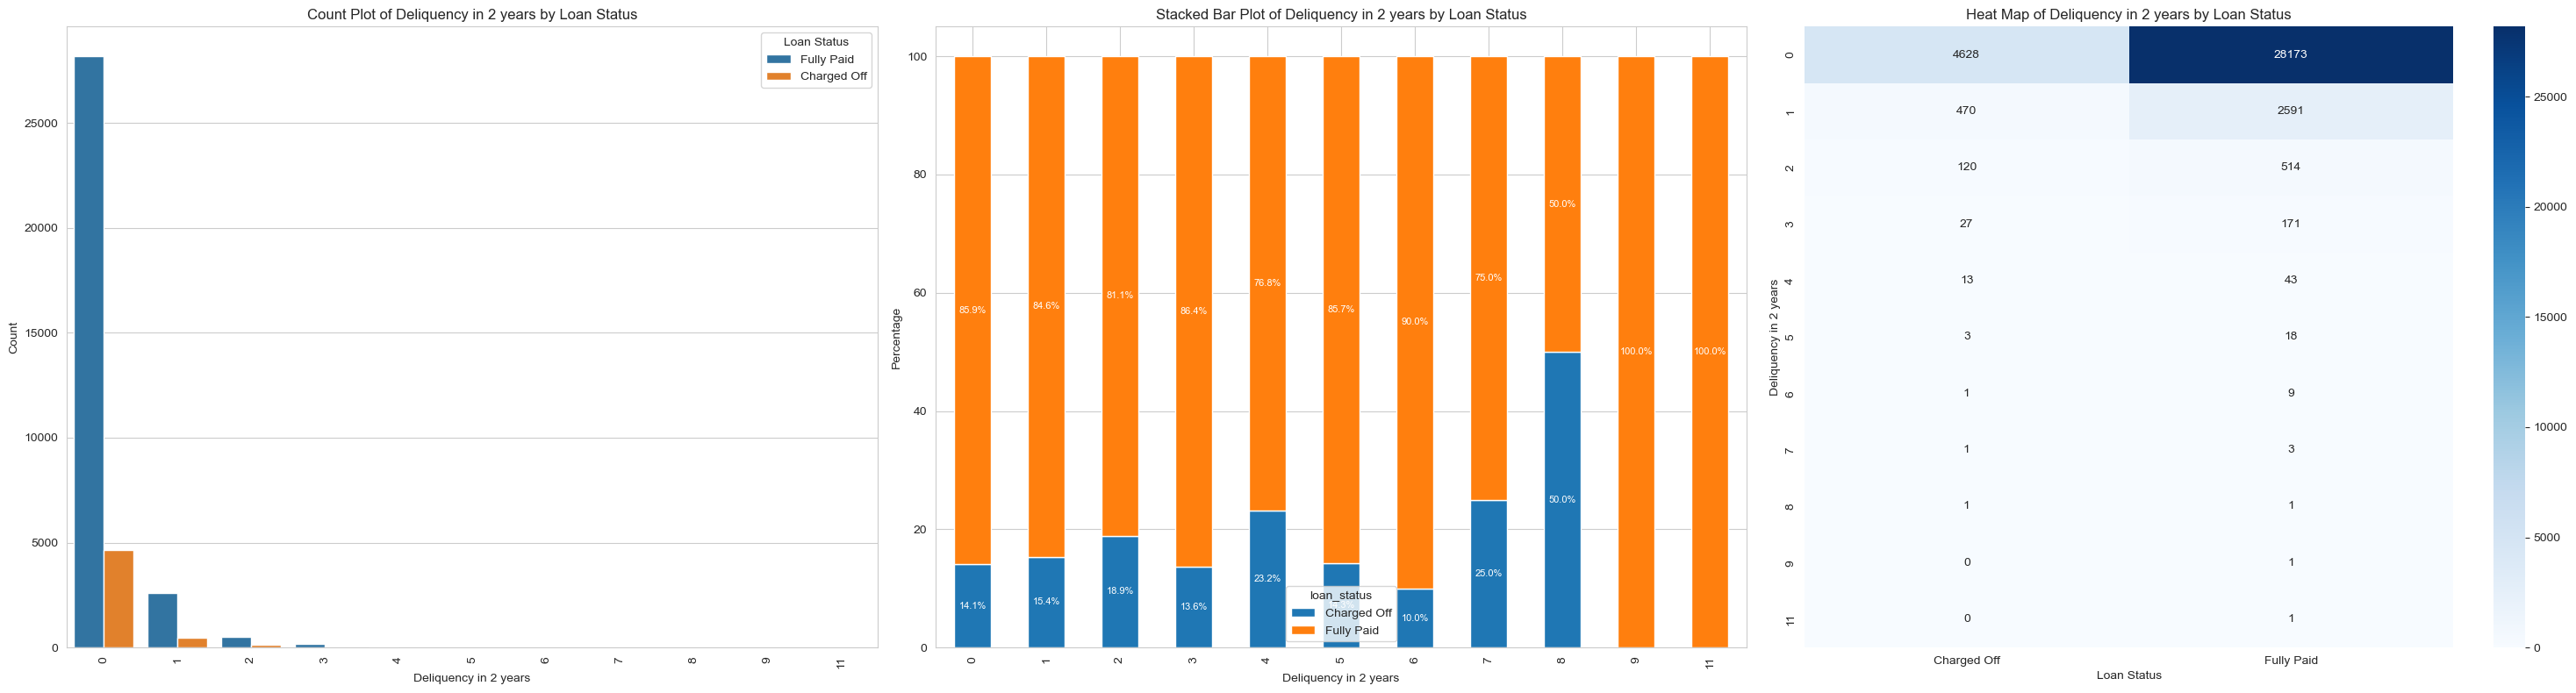

In [103]:
df_with_delinq_2 = df[df["delinq_2yrs"] > 0] 
utils.plot_numerical_bivariate(df_with_delinq_2, "delinq_2yrs", "loan_status", "Deliquency in 2 years", "Loan Status")
utils.plot_categorical_bivariate(df, "delinq_2yrs", "loan_status", "Deliquency in 2 years", "Loan Status")

### Observations from bivariate analysis on Deliquency in 2 years(delinq_2yrs)

- The interquartile range (the box part of the box plot) for "Charged Off" loans is higher, which could imply that borrowers who eventually default on their loans exhibit a wider variety of delinquency histories.
- The presence of outliers in both categories suggests that there are few borrowers with an unusually high number of delinquencies
- Stacked Bar Plot reveals that a higher percentage of loans with zero delinquencies are 'Fully Paid' compared to those with one or more delinquencies. However, even with increased delinquencies, there's still a significant proportion of loans that are fully paid, suggesting that delinquencies do impact loan status but are not the sole factor.
- The intensity of the colors in the heatmap indicates the count of loans by delinquency number and loan status. It highlights that while most loans with no delinquencies are 'Fully Paid', the number of 'Charged Off' loans increases with the number of delinquencies.

### Inferences from bivariate analysis on Deliquency in 2 years(delinq_2yrs)
- Based on this bivariate analysis, the number of delinquencies in the past two years can be considered a moderate predictor of loan status. There is a clear trend that indicates an increased likelihood of a loan being 'Charged Off' with higher delinquency numbers, but it is not absolute. 

Predictor Category - Moderately Good

## Univariate Anslysis of Earliest Credit Line(earliest_cr_line)

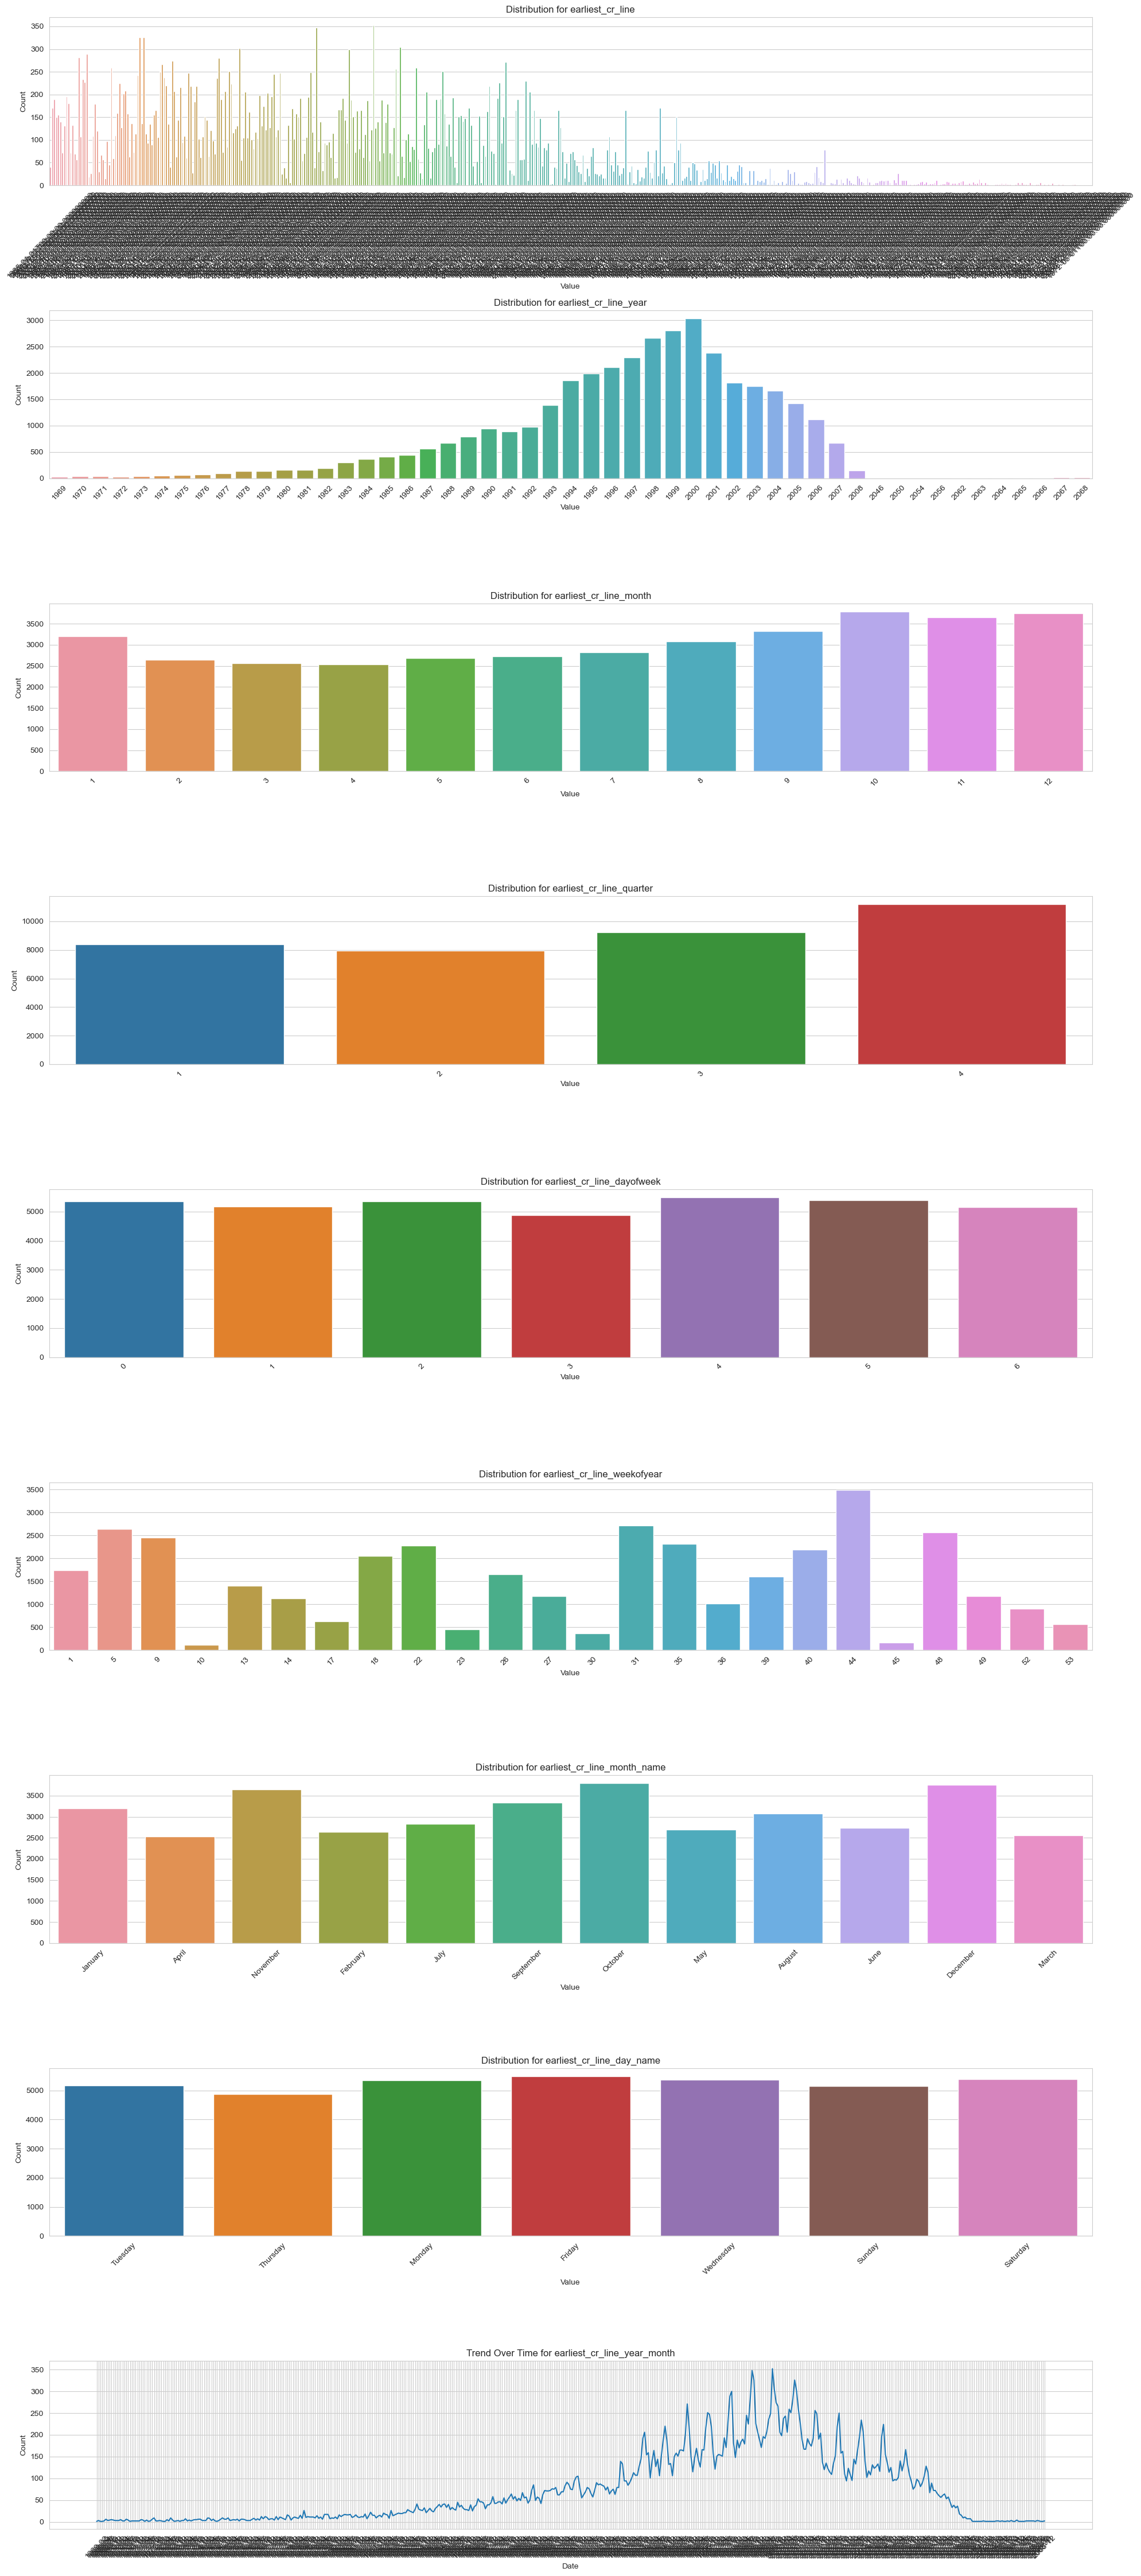

In [104]:
utils.univariate_date_analysis(df, "earliest_cr_line")

### Observations from univariate analysis on Earliest Credit Line(earliest_cr_line)

- The first plot is a jittered scatter plot showing each point along a timeline, presumably representing the frequency of each date. However, due to the high volume of data points, it's challenging to discern specific trends from this visualization.
- Distribution by Year (earliest_cr_line_year): There is a clear increase in the count of borrowers' earliest credit lines over time, peaking in recent years. This could indicate either a growing number of borrowers entering the credit market or a data collection that has intensified in recent years.
- Distribution by Month (earliest_cr_line_month): The distribution across months appears relatively unifaorm, suggesting that the borrowers' earliest credit line initiation does not have a particular monthly seasonality.
- Distribution by Quarter (earliest_cr_line_quarter): The quarters show a somewhat even distribution with a slight increase in the later quarters, which could suggest a minor trend towards more credit lines being initiated towards the end of the year.
- Distribution by Day of the Week (earliest_cr_line_dayofweek): The data shows a distribution across the days of the week, indicating that the earliest credit line is not particularly dependent on the day of the week
- Distribution by Month Name (earliest_cr_line_month_name): The distribution appears relatively even across different months, with no single month standing out significantly.
- Distribution by Day Name (earliest_cr_line_day_name): This plot shows the counts for the days of the week, where we can infer that the dataset either doesn't include this information or that the distribution is even across all days.
- Trend Over Time (earliest_cr_line_year_month): The final visualization is a time series plot showing the trend of earliest credit line initiations over time. There is a noticeable upward trend in recent years, which then declines, likely indicating either a change in market conditions, a change in data collection, or an artifact of the loan issuance policies.


### Inferences from univariate analysis on Earliest Credit Line(earliest_cr_line)
- it is evident that there has been a significant increase in the number of borrowers with recorded credit lines over time, with a peak in recent years before a decline. 
- The other distributions by time segments do not show strong seasonality or specific patterns, indicating that the timing of when a borrower's credit line was first recorded does not have a strong dependency on these factors.

## Bivariate Anslysis of Debt to Earliest Credit Line(earliest_cr_line) versus Loan Status(loan_status)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


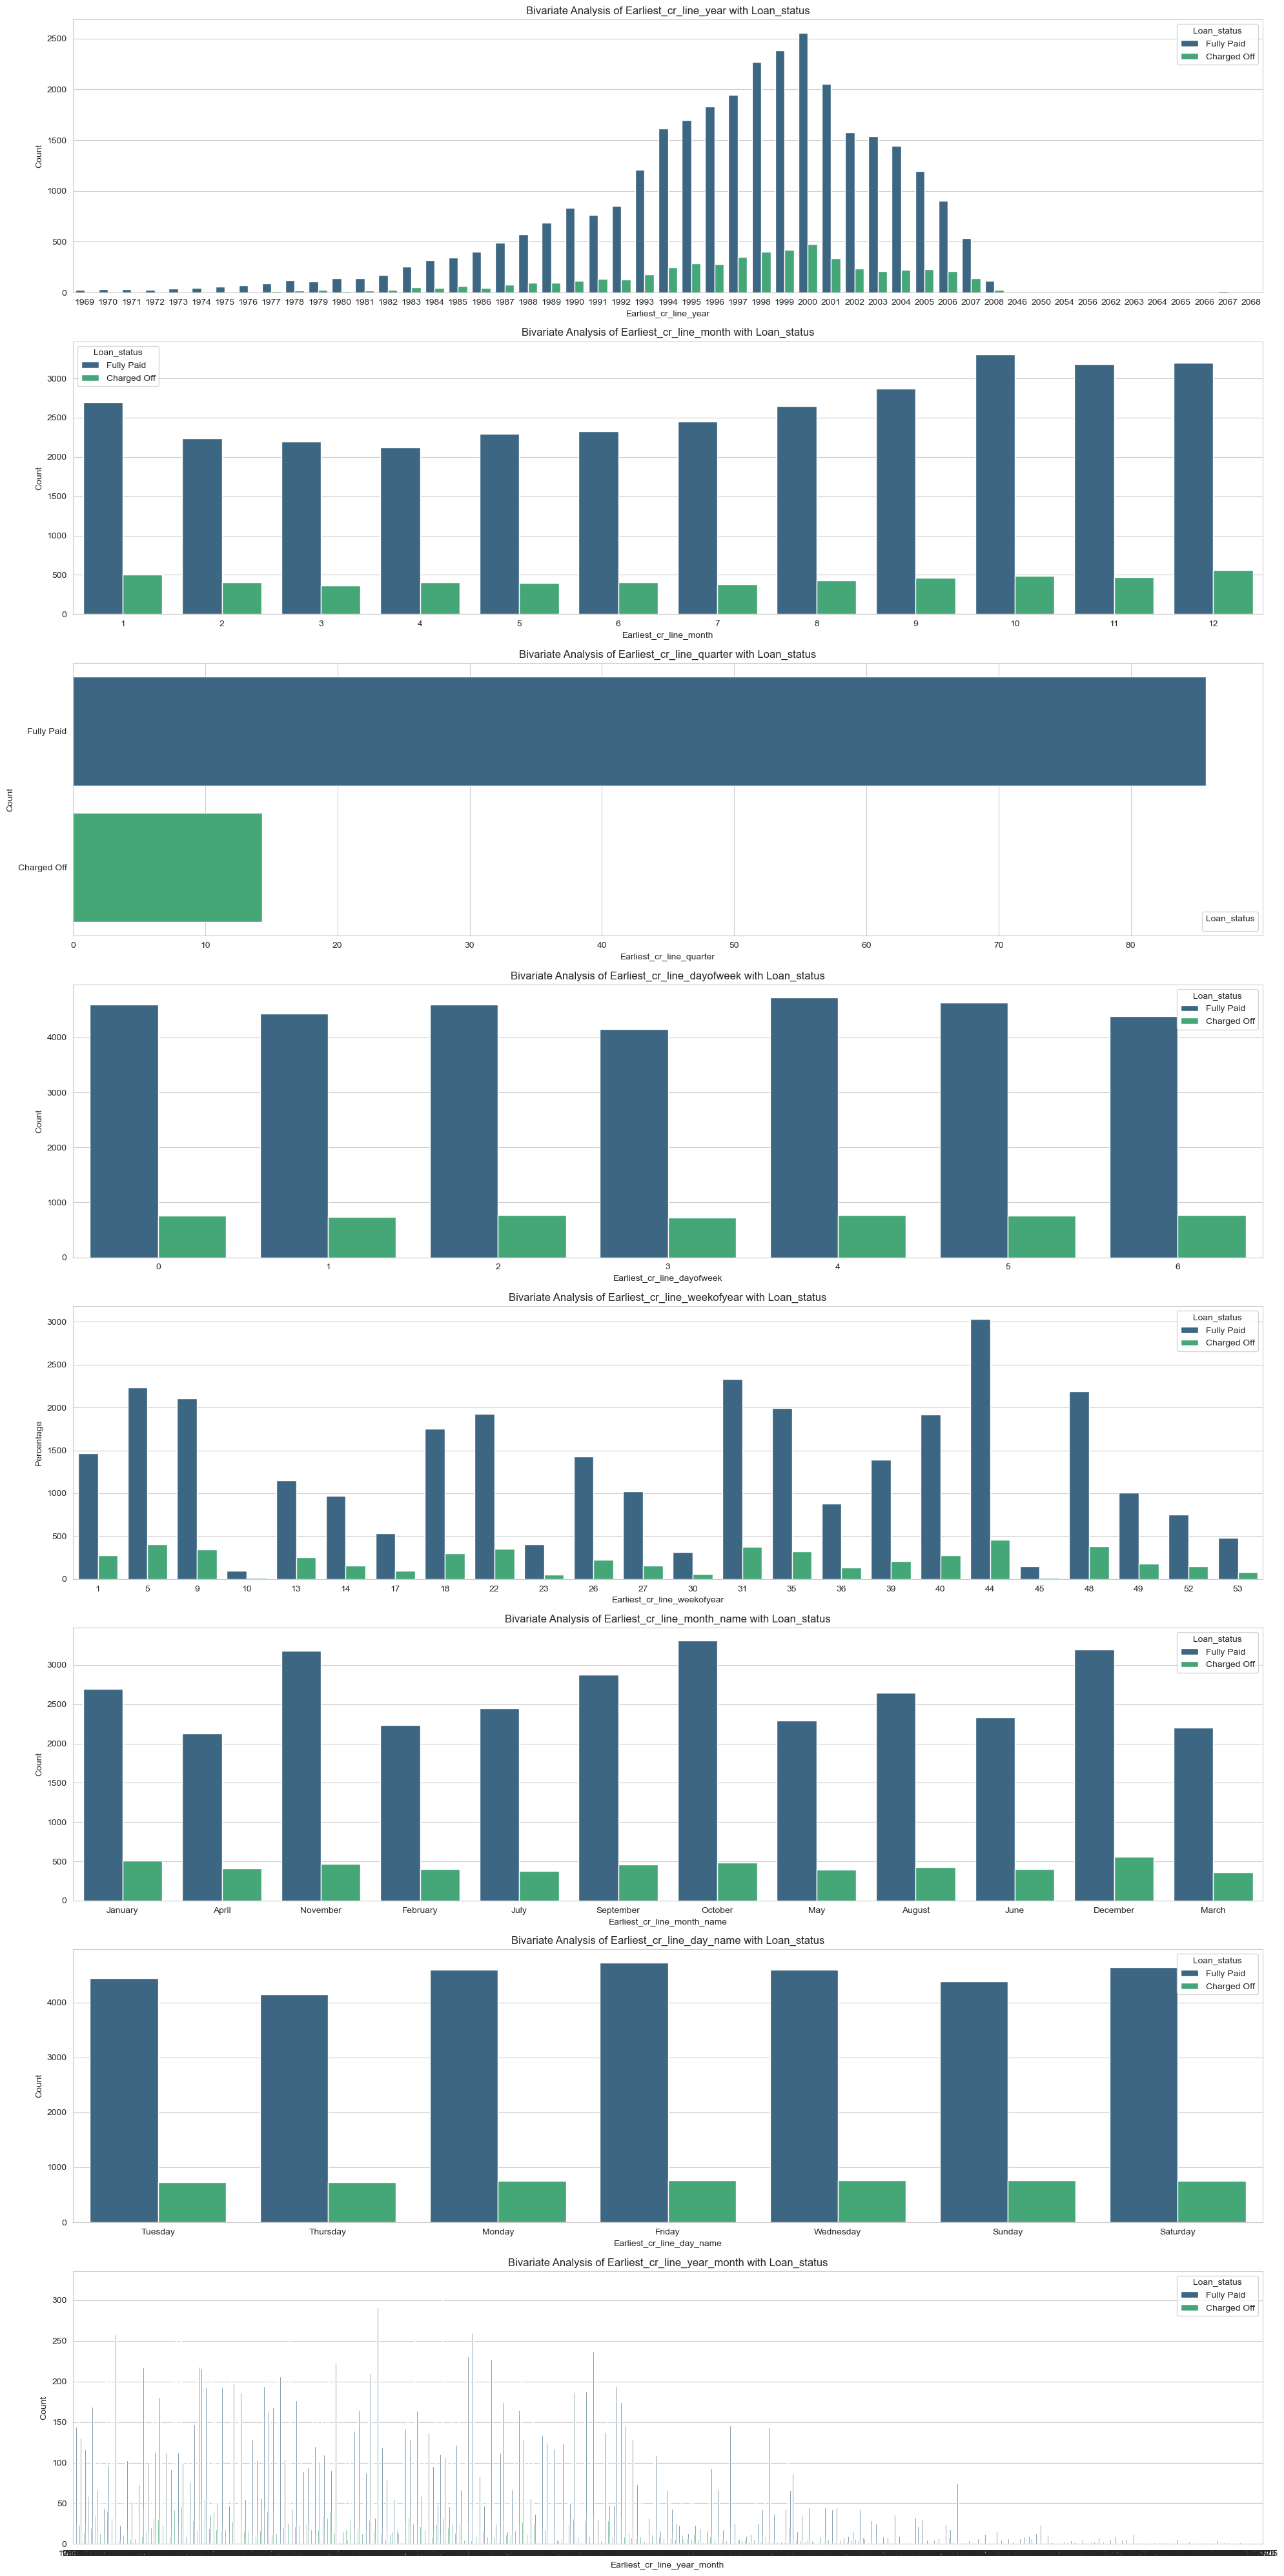

In [105]:
utils.bivariate_date_analysis(df, "earliest_cr_line", "loan_status")

### Observations from bivariate analysis on Earliest Credit Line(earliest_cr_line) versus Loan Status(loan_status)

- By Year (earliest_cr_line_year): The number of loans increases over time, with a notable rise in recent years. Both "Fully Paid" and "Charged Off" statuses increase, but the proportion seems consistent over time.
- By Month (earliest_cr_line_month): The distribution across months does not show significant variability between loan statuses, suggesting that the month of the earliest credit line does not have a strong predictive power for loan default.
- By Quarter (earliest_cr_line_quarter): Similar to the monthly distribution, quarterly distribution also does not show a pronounced difference in loan statuses, indicating that the quarter of the earliest credit line is not a significant factor in predicting loan status.
- By Day of the Week (earliest_cr_line_dayofweek): There is a consistent distribution of loan statuses across the days of the week, with no particular day showing a significant disparity.
- By Week of the Year (earliest_cr_line_weekofyear): Fluctuations in loan counts are visible throughout the year, but these do not appear to correlate strongly with loan status, suggesting that the week of the year is not a significant predictor of loan default.
- By Month Name (earliest_cr_line_month_name): The distribution of loan statuses across different months does not show any significant pattern that could be used to predict loan status.
- By Day Name (earliest_cr_line_day_name): The day of the week does not show a substantial difference in the distribution of loan statuses.
- Trend Over Time (earliest_cr_line_year_month): The trend over time plot shows the counts of "Fully Paid" and "Charged Off" loans over the years, again indicating an increase in both statuses over time without a significant shift in their proportion to each other.

### Inferences from bivariate analysis on Earliest Credit Line(earliest_cr_line)  versus Loan Status(loan_status)
- The distributions of "Fully Paid" and "Charged Off" loans are fairly consistent across the different time dimensions, suggesting that the timing of a borrower's first entry into the credit market is not a significant standalone factor in determining the likelihood of loan default.

Predictor Category - No Impact

## Univariate Anslysis of Earliest Inquiry in last 6 months (inq_last_6mths)

Summary statistics for 'Inquiry in last 6 months':
count    36789.000000
mean         0.869689
std          1.068127
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


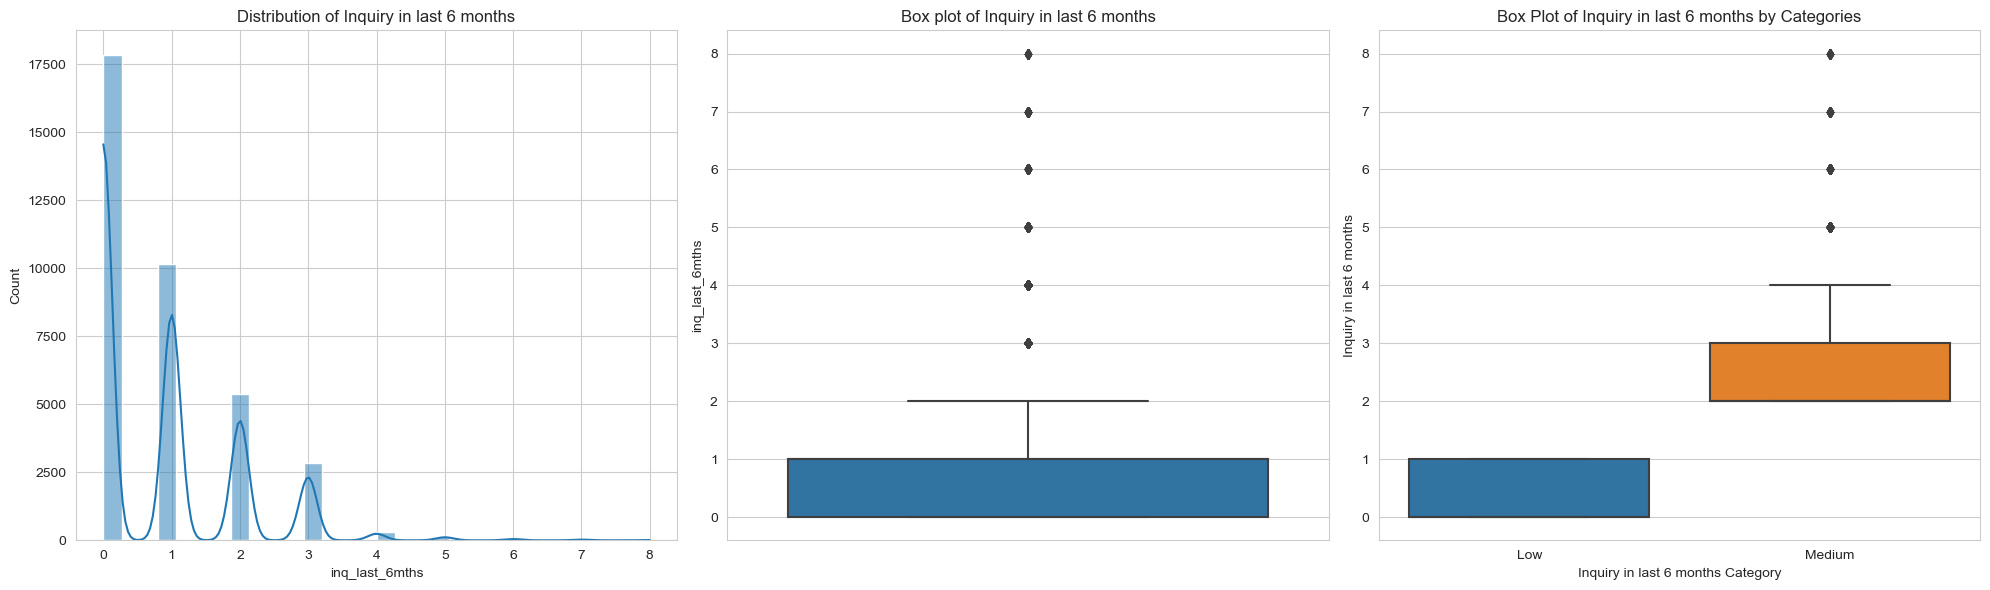

In [106]:
utils.plot_numerical_univariate(df, "inq_last_6mths", "Inquiry in last 6 months")

Summary statistics for 'Inquiry in last 6 months':
0    17855
1    10169
2     5394
3     2840
4      294
5      136
6       57
7       32
8       12
Name: inq_last_6mths, dtype: int64

Mode: 0


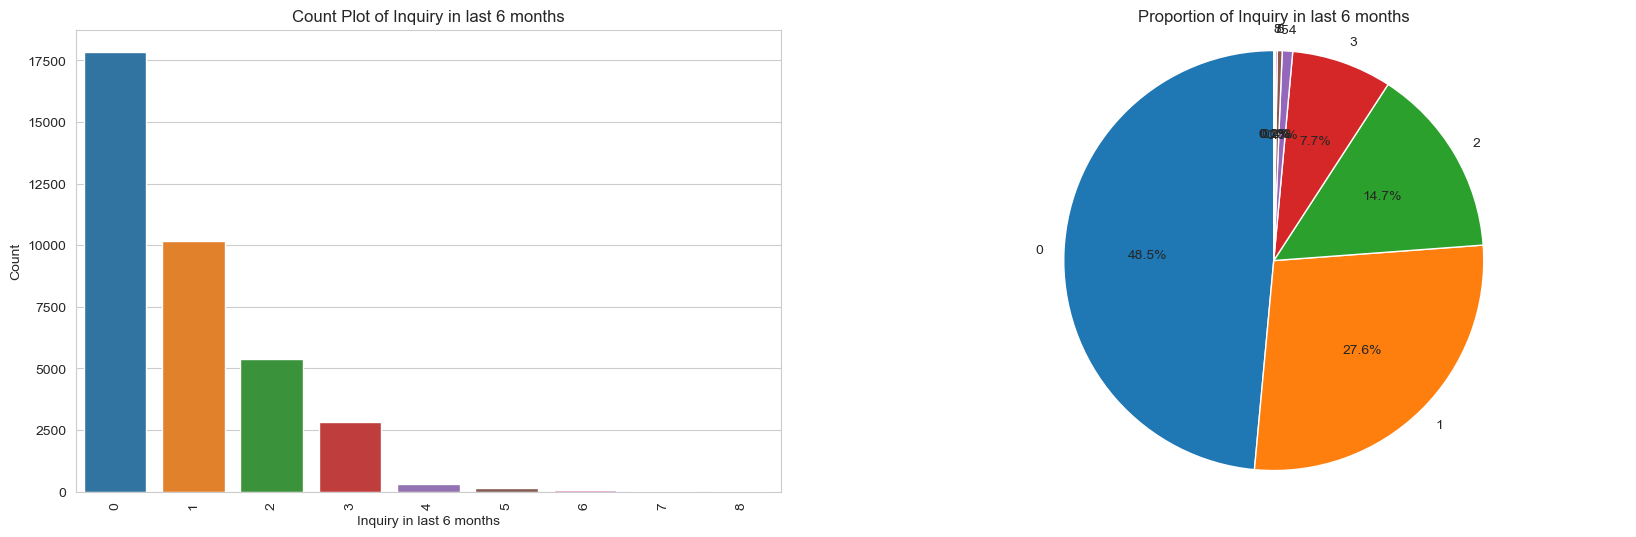

In [107]:
utils.plot_categorical_univariate(df, "inq_last_6mths", "Inquiry in last 6 months")

### Observations from univariate analysis on Inquiry in last 6 months(inq_last_6mths)

- Distribution Analysis
    - The distribution of inquiries in the last 6 months is positively skewed, indicating that a large number of borrowers have fewer inquiries.
    - Most borrowers have 0 or 1 inquiry, which constitutes the majority of the dataset, as depicted by the mode being 0.
    - There is a significant drop in frequency as the number of inquiries increases, which is evident from the histogram with the highest bars at 0 and subsequently lower bars as the count increases.
- Box Plot Analysis:
    - The box plot shows that the median value of inquiries is 1, aligning with the 50th percentile from the summary statistics.
    - The interquartile range (IQR) is narrow, lying between 0 and 1 inquiries, suggesting that half of the data points are within this range.
    - There are outliers present as indicated by the points beyond the whiskers of the box plot, reflecting that some borrowers have a significantly higher number of inquiries than the rest.
- Count Plot Analysis
    - The count plot confirms the high frequency of 0 inquiries and a decreasing trend as the number of inquiries increases.
    - A significant portion of borrowers have not made any credit inquiries in the last 6 months before applying for the loan.
- Proportion Analysis:
    - The proportion of borrowers with 0 inquiries is the largest, followed by those with 1 inquiry, and then 2 inquiries, suggesting that a cautious approach to credit inquiries is common among borrowers.
    - The proportion decreases as the number of inquiries increases, which may reflect a cautious behavior among borrowers or a less active credit history.


### Inferences from univariate analysis on Inquiry in last 6 months(inq_last_6mths)
- The univariate analysis of the "Inquiry in last 6 months" feature suggests that it is a significant variable to consider when assessing borrower profiles, as it provides insights into their recent credit-seeking behavior. A high number of inquiries might indicate financial stress or shopping for credit, which could be a risk factor for lenders. However, most borrowers in the dataset have 0 or 1 inquiry, which could be considered a sign of financial stability or a conservative approach to acquiring new credit.

## Bivariate Anslysis of Earliest Inquiry in last 6 months (inq_last_6mths) versus Loan Status(loan_status)


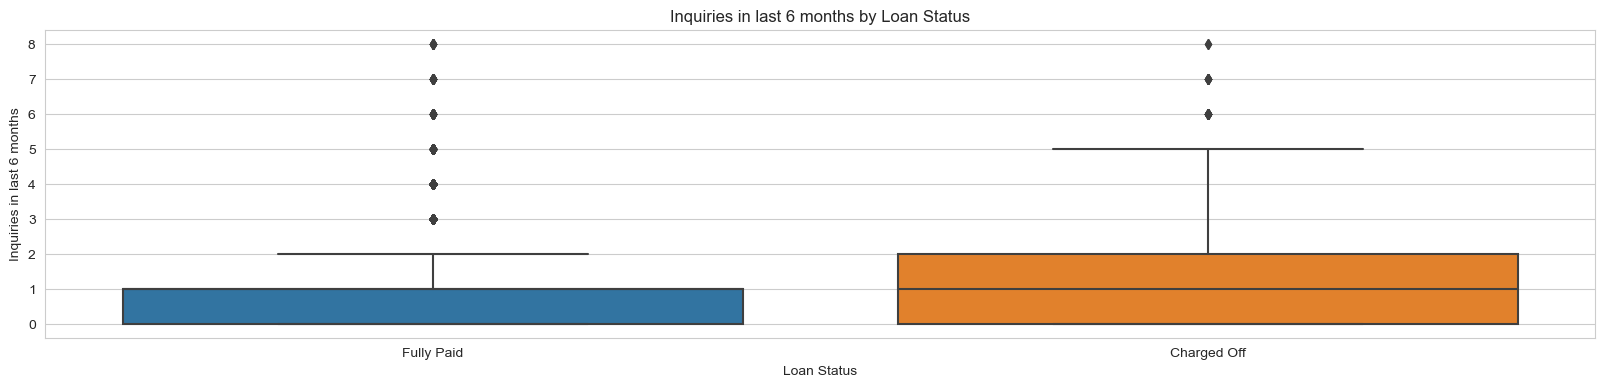

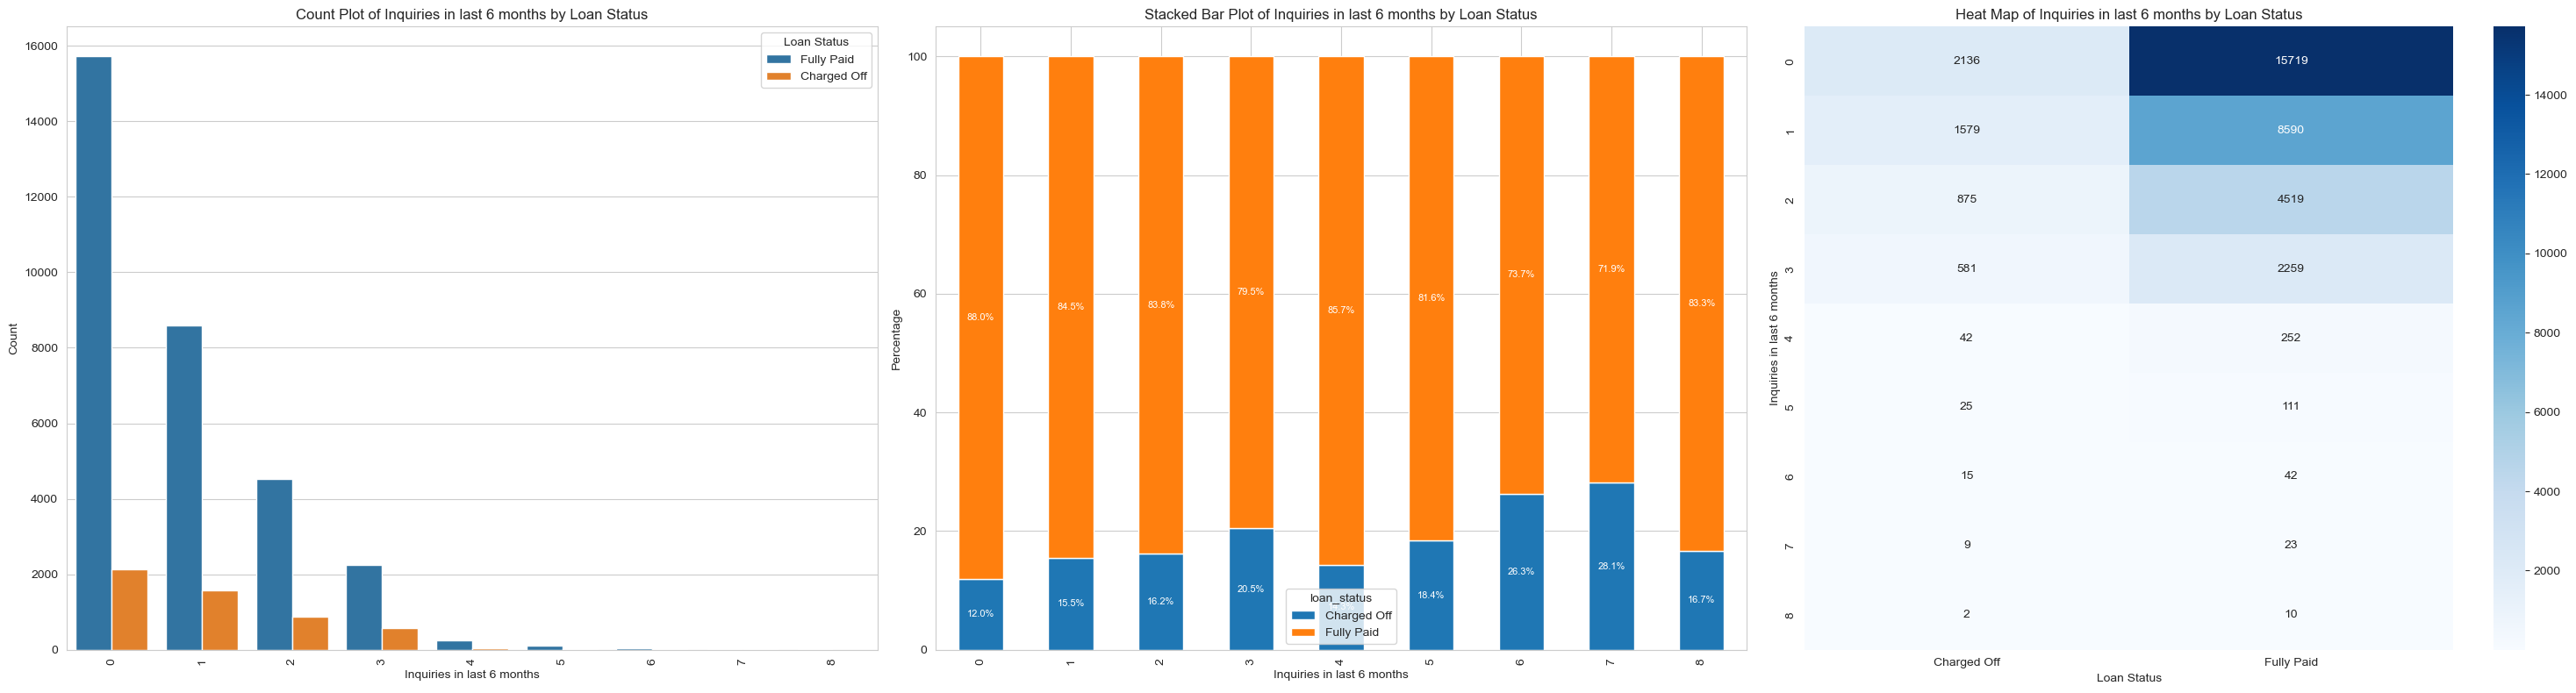

In [108]:
utils.plot_numerical_bivariate(df, "inq_last_6mths", "loan_status", "Inquiries in last 6 months", "Loan Status")
utils.plot_categorical_bivariate(df, "inq_last_6mths", "loan_status", "Inquiries in last 6 months", "Loan Status")

### Observations from bivariate analysis on Earliest Credit Line(earliest_cr_line) versus Loan Status(loan_status)

- Boxplot Analysis:
    - The boxplot comparison between the "Fully Paid" and "Charged Off" categories indicates the central tendency and spread of inquiries in the last 6 months for each loan status.
    - Median for "Charged Off" is higher than for "Fully Paid," suggesting that a higher number of inquiries is associated with a greater likelihood of charge-offs.
    - The presence of outliers in both categories indicates that there are borrowers with an unusually high number of inquiries who have both fully paid off their loans and been charged off.

- Count Plot
    - The majority of loans, both fully paid and charged off, have zero or one inquiry in the last six months. There is a noticeable decline in counts as the number of inquiries increases, suggesting that fewer borrowers have higher numbers of inquiries.

- Stacked Bar Plot
    - The percentage of fully paid loans decreases as the number of inquiries increases. Conversely, the percentage of charged-off loans increases with the number of inquiries. This trend is most apparent for borrowers with four or more inquiries, where the proportion of charged-off loans is significantly higher compared to those with fewer inquiries.

- Heat Map
    - A clear gradient can be observed where the darker shades (indicating higher counts) are concentrated towards the lower number of inquiries for both loan statuses. As the number of inquiries increases, the frequency of both fully paid and charged-off loans decreases, but the decrease is steeper for fully paid loans.

### Inferences from bivariate analysis on Earliest Credit Line(earliest_cr_line)  versus Loan Status(loan_status)
- From these observations, the number of inquiries in the last 6 months seems to be a good predictor of loan status. A higher number of inquiries is associated with a higher likelihood of a loan being charged off, implying a higher risk. The decreasing frequency of loans as inquiries increase, combined with the changing proportions of loan status, supports this feature's predictive power. The presence of outliers in the box plot further emphasizes that while high inquiries are not common, they have a strong association with charged-off loans. 

Predictor Category - Good

## Univariate Anslysis of Open Accounts (open_acc)

Summary statistics for 'Open Accounts':
7     3754
6     3671
8     3651
9     3460
10    2971
5     2935
11    2562
4     2161
12    2129
13    1770
3     1365
14    1364
15    1100
16     878
17     679
2      513
18     500
19     374
20     269
21     224
22     128
23      88
24      68
25      52
26      29
28      23
27      21
30      14
29      13
34       5
31       5
33       3
35       3
32       2
36       2
39       1
38       1
44       1
Name: open_acc, dtype: int64

Mode: 7


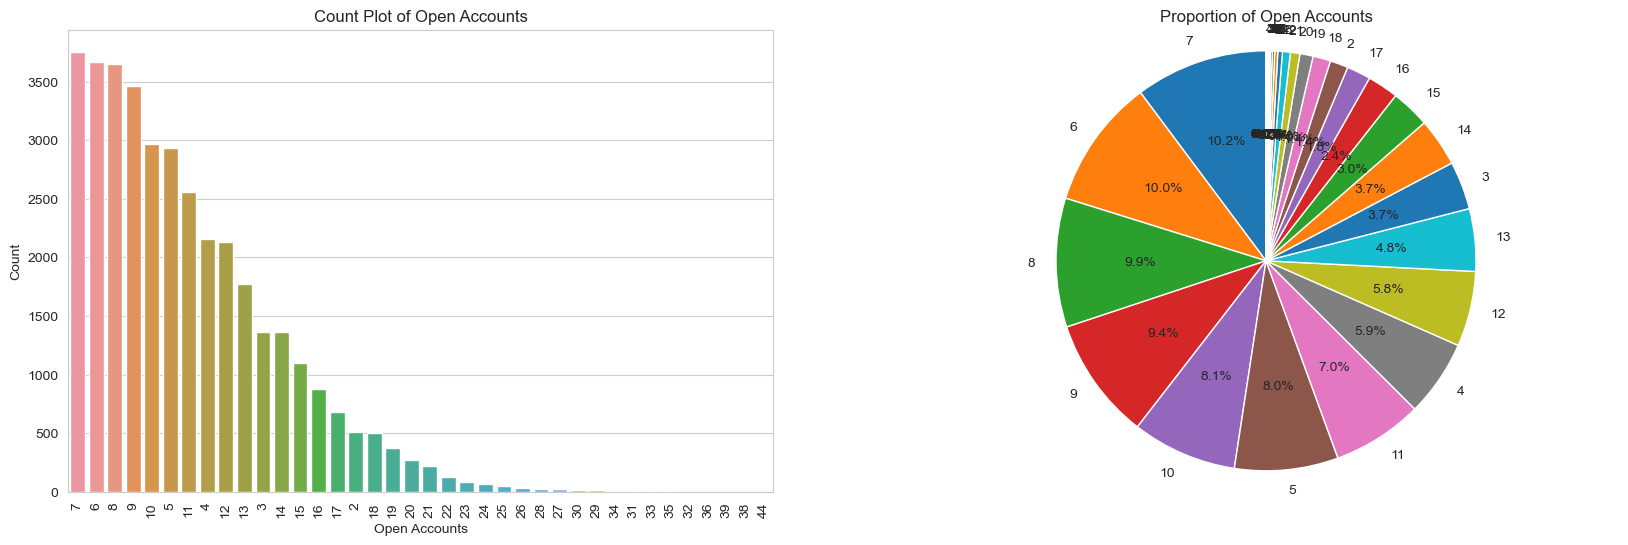

Summary statistics for 'Open Accounts':
count    36789.000000
mean         9.302754
std          4.375530
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


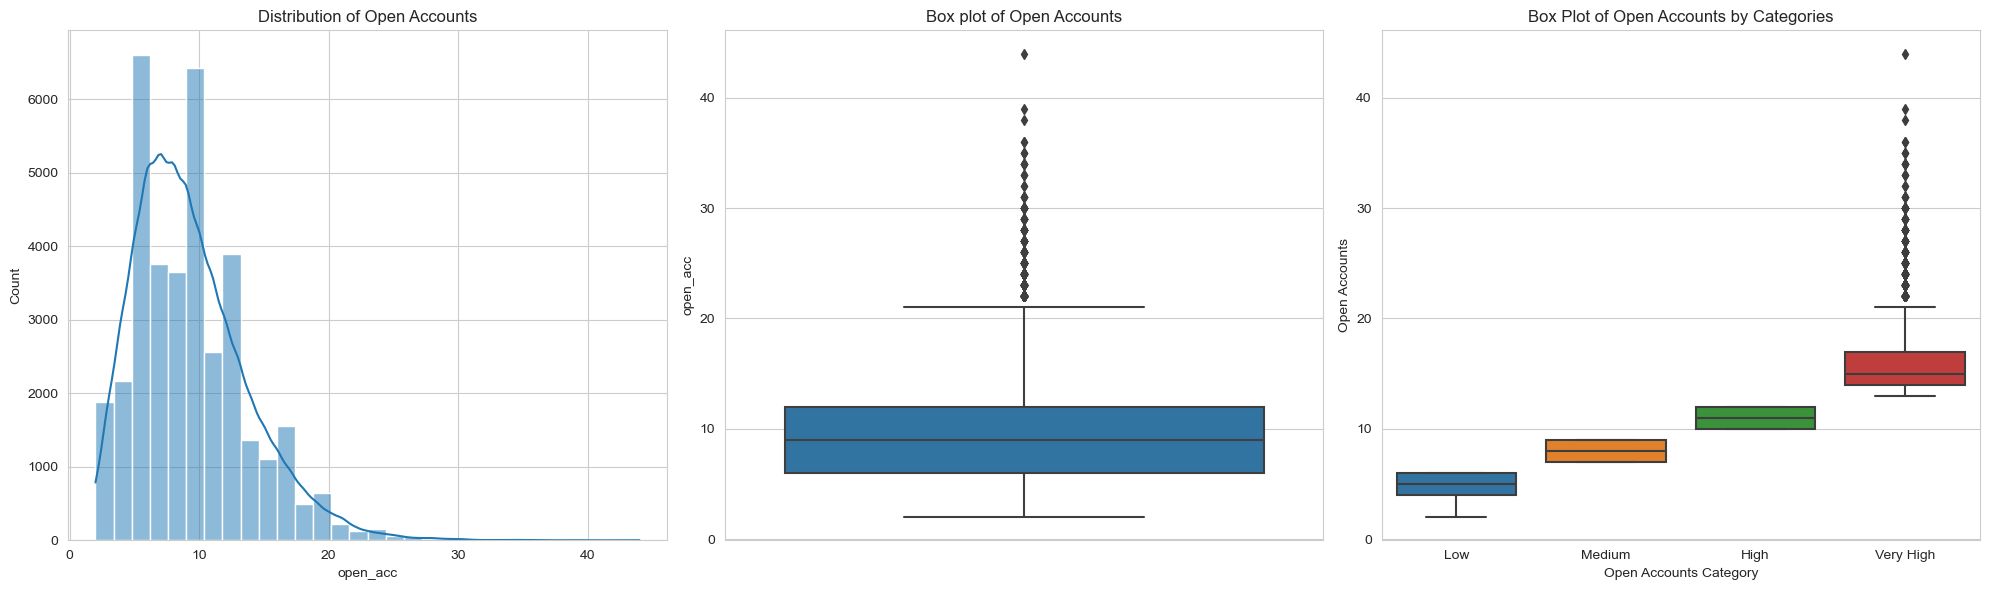

In [109]:
utils.plot_categorical_univariate(df, "open_acc", "Open Accounts")
utils.plot_numerical_univariate(df, "open_acc", "Open Accounts")

### Observations from univariate analysis on Open Accounts(open_acc)

- Count Plot
    - There is a clear descending trend in the number of accounts as the count increases. The majority of borrowers have between 7 to 10 open accounts, with the highest count for 9 open accounts. This suggests that having a moderate number of open accounts is the most common among borrowers.
- Pie Chart
    - The proportion of borrowers with 7 to 10 open accounts is significantly high, with each count representing between 8.1% and 10.2% of the total. There is a gradual decrease in proportion as the number of open accounts increases beyond 10, indicating that fewer borrowers have a large number of open accounts.
- Distribution Plot
    - The histogram shows a right-skewed distribution, with a peak in the count for lower numbers of open accounts and a gradual decline as the number increases.
    - The majority of borrowers have fewer than 10 open accounts, which is also where the density (as indicated by the KDE - Kernel Density Estimate) is the highest.
    - The long tail towards the right indicates that there are borrowers with a significantly higher number of open accounts, but they are rare.
- Box Plot
    - The central box represents the IQR of the data, where the majority of borrowers' open accounts fall. The median is shown by the line in the box and appears to be around 9.
    - There are outliers present, as indicated by the points beyond the whiskers of the box plot. These outliers represent borrowers with an unusually high number of open accounts
- Box Plot by Categories
    - The majority of borrowers fall into the "Low" and "Medium" categories, which likely correspond to a lower number of open accounts.
    - The "High" and "Very High" categories have a wider range of values and fewer counts, which aligns with the long tail observed in the histogram.

### Inferences from univariate analysis on Open Accounts(open_acc)
- A typical borrower has a moderate number of open accounts.
- There are outliers with a high number of open accounts, which might require further investigation to understand their financial behavior and creditworthiness.


## Bivariate Anslysis of Open Accounts (open_acc) versus Loan Status(loan_status)

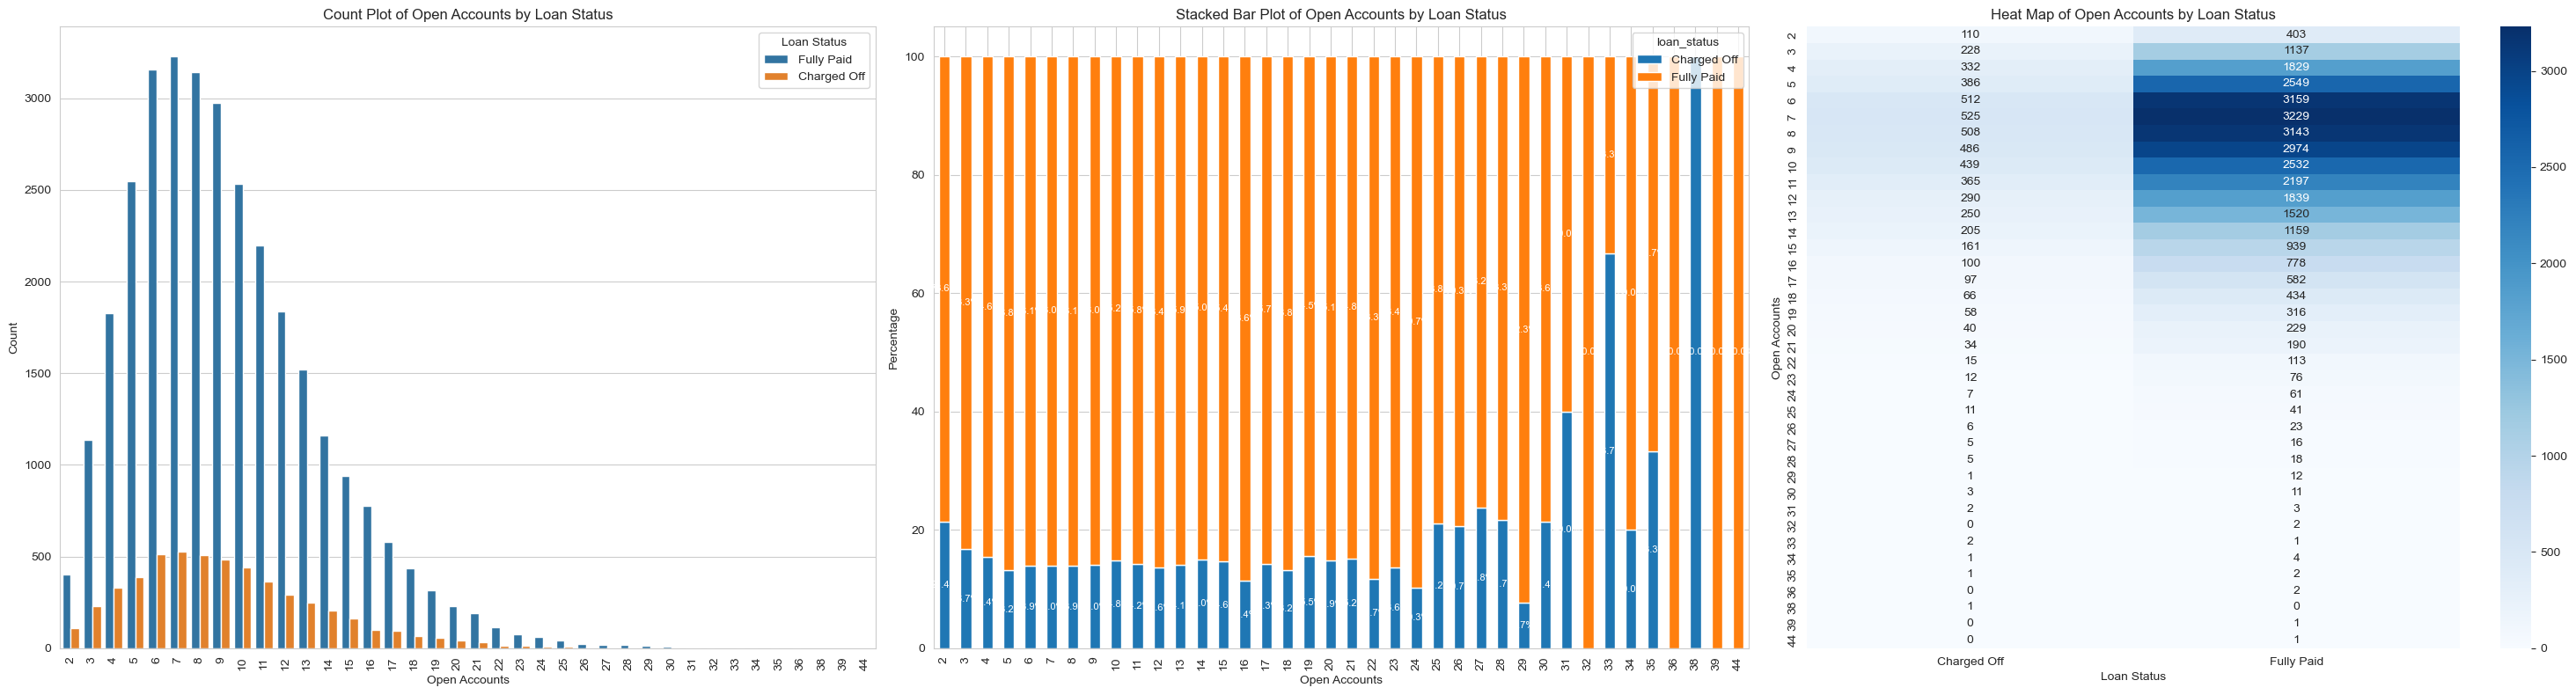

In [110]:
utils.plot_categorical_bivariate(df, "open_acc", "loan_status", "Open Accounts", "Loan Status")

### Observations from bivariate analysis on Open Accounts(open_acc) versus Loan Status(loan_status)

- Count Plot by Loan Status
    - The distribution of open accounts across both loan statuses ("Fully Paid" and "Charged Off") follows a similar pattern, with the highest counts at lower numbers of open accounts.
    - There appears to be a gradual decrease in the number of loans as the number of open accounts increases, which is consistent for both "Fully Paid" and "Charged Off" statuses.
- Stacked Bar Plot
    - The percentage of "Fully Paid" loans seems consistently higher across all numbers of open accounts compared to "Charged Off" loans, suggesting that having a certain number of open accounts alone may not be a strong predictor of loan default.
    - However, for accounts with a very high number of open accounts, there is a slight increase in the proportion of "Charged Off" loans, which might suggest a correlation where borrowers with an excessive number of open accounts could have a higher risk of default.
- Heat Map of Open Accounts by Loan Status
    - Most loans, whether "Fully Paid" or "Charged Off," are concentrated within a certain range of open accounts, typically on the lower end of the spectrum.
    - There is a noticeable presence of "Charged Off" loans across all ranges of open accounts, but the concentration is not significantly higher in any specific range to conclusively indicate a strong predictive power of the number of open accounts on loan default.


### Inferences from bivariate analysis on Open Accounts(open_acc) versus Loan Status(loan_status)

- While there is a visible pattern in the number of open accounts between "Fully Paid" and "Charged Off" loans, the difference is not stark enough to consider the number of open accounts as a standalone strong predictor of loan status.
- The data suggests that borrowers with very high numbers of open accounts may be at a slightly increased risk of charge-off, but this needs to be evaluated in conjunction with other factors for a more accurate prediction of loan performance.

Predictor Category - Weak

## Univariate Anslysis of Derogatory Public Records (pub_rec)

Summary statistics for 'Derogatory Public Records':
0    34860
1     1875
2       45
3        7
4        2
Name: pub_rec, dtype: int64

Mode: 0


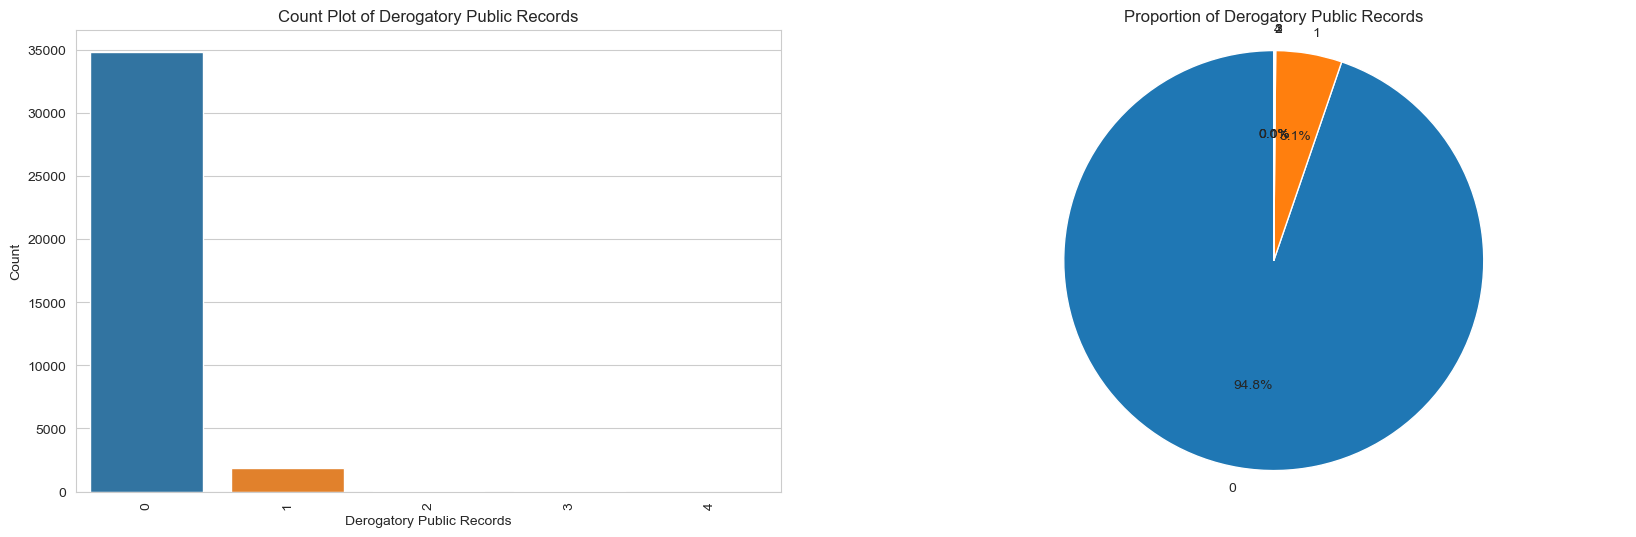

In [111]:
utils.plot_categorical_univariate(df, "pub_rec", "Derogatory Public Records")

### Observations/Inferences from univariate analysis on Derogatory Public Records(pub_rec)
- The mode of the dataset is 0, which means that the most common number of derogatory public records among borrowers is none.
- A count of 1 derogatory public record is the next most common, but it is significantly less frequent in comparison to a count of 0.

## Bivariate Anslysis of Derogatory Public Records (pub_rec) versus Loan Status(loan_status)

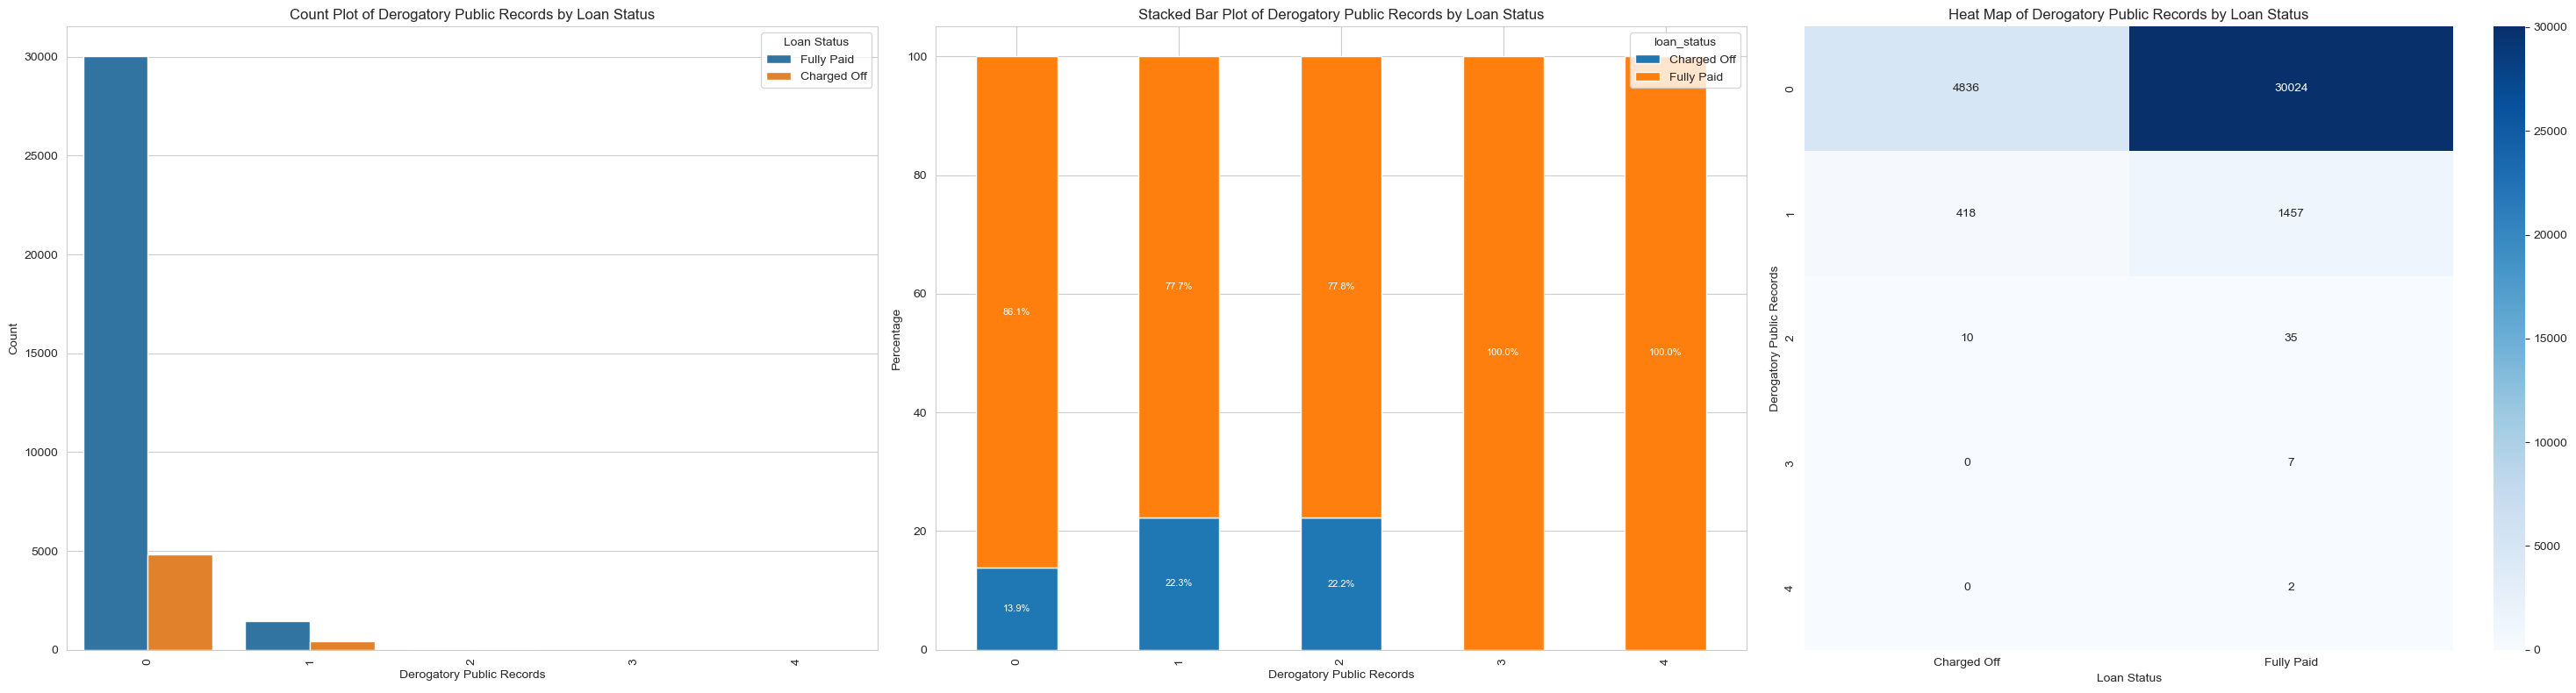

In [112]:
utils.plot_categorical_bivariate(df, "pub_rec", "loan_status", "Derogatory Public Records", "Loan Status")

### Observations from bivariate analysis on Derogatory Public Records(pub_rec) versus Loan Status(loan_status)
- The majority of loans, both fully paid and charged off, have 0 derogatory public records. This is consistent with the univariate analysis which showed a large majority of borrowers with no derogatory public records.
- There is a noticeable portion of loans that are charged off with 1 derogatory public record, larger than the proportion of fully paid loans with 1 derogatory public record. This suggests that having at least one derogatory public record could be associated with a higher risk of charge-off.
- The count plot shows a decline in frequency as the number of derogatory public records increases, which is expected as individuals with numerous derogatory records are less likely to be approved for loans.
- The stacked bar plot indicates a higher percentage of loans with 0 derogatory public records in the fully paid category compared to the charged off category. As the number of derogatory public records increases, the proportion of charged-off loans increases as well.
- The heat map further emphasizes the higher counts of both fully paid and charged off loans with 0 derogatory public records. It also indicates that while the absolute numbers are smaller for loans with derogatory records, the risk of charge-off seems to increase with the presence of such records.

### Inferences from univariate analysis on Derogatory Public Records(pub_rec) versus Loan Status(loan_status)
- These observations suggest that while the absence of derogatory public records is common among all loans, the presence of such records may be an indicator of increased risk of default. 
- Therefore, 'Derogatory Public Records' could be considered a useful predictor in a risk assessment model for loan charge-off likelihood. 

Predictor Category - Good

## Univariate Anslysis of Revolving Balance(revol_bal)


Summary statistics for 'Revolving Balance':
count     36789.000000
mean      13376.296447
std       15850.112559
min           0.000000
25%        3729.000000
50%        8869.000000
75%       17031.000000
max      149588.000000
Name: revol_bal, dtype: float64


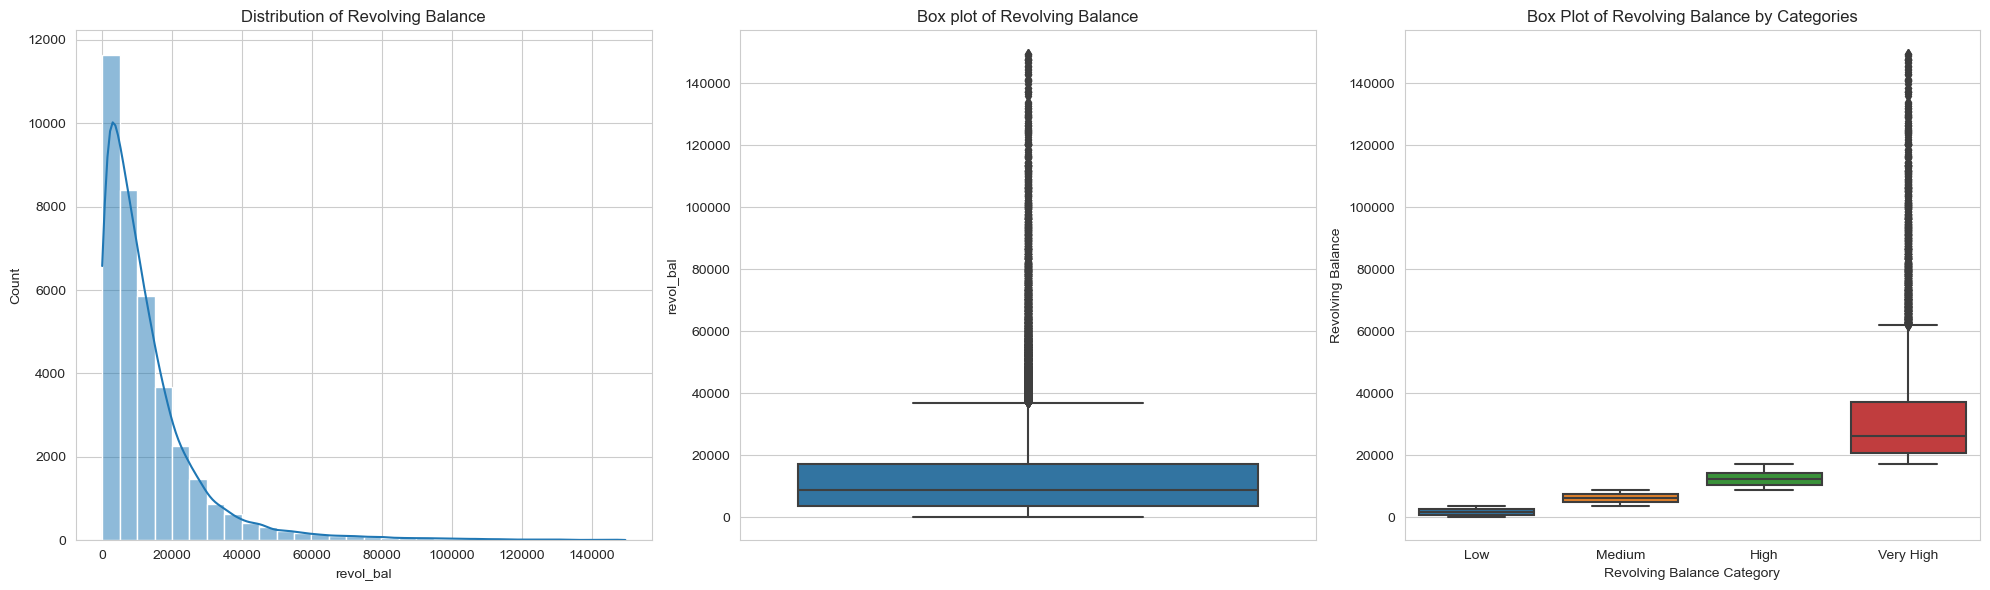

In [113]:
utils.plot_numerical_univariate(df, "revol_bal", "Revolving Balance")

### Observations from univariate analysis on Revolving Balance(revol_bal)

- Distribution Analysis
    - The histogram shows a right-skewed distribution, indicating that a large number of borrowers have lower revolving balances, with the frequency of borrowers gradually decreasing as the balance amount increases.
    - There is a significant drop-off in frequency as the revolving balance exceeds approximately 20,000, suggesting that high revolving balances are less common among the borrowers in this dataset.
- Box Plot Analysis
    - The box plot illustrates that the median revolving balance is relatively low compared to the mean, which is again indicative of a right-skewed distribution. This is consistent with the histogram observation.
    - There are numerous outliers on the higher end, as visualized by the points beyond the upper whisker of the box plot. This further confirms the presence of borrowers with exceptionally high revolving balances.
- Binned Analysis
    - The box plots categorized into bins (e.g., Low, Medium, High, Very High) show that as we move from the 'Low' to 'Very High' categories, there is a clear increase in the median revolving balance, as well as the range (interquartile range) of balances within each category.
    - The 'Very High' category exhibits a substantial number of outliers, which suggests that within this group, there is a significant variation in the balances, with some borrowers having extremely high revolving balances.
- Summary Statistics
    - The mean revolving balance is approximately 13,376, yet the median (50th percentile) is considerably lower at 8,869, which aligns with the observed skewness in the distribution.
    - The standard deviation is quite large at 15,850, showing a wide spread of the revolving balance amounts across borrowers.
    - The minimum value of 0 indicates that some borrowers have no revolving balance, while the maximum value of 149,588 points to some borrowers having very high revolving balances.
    - The interquartile range, from approximately 3,729 to 17,031, highlights that the middle 50% of the balances are relatively modest compared to the mean.

### Inferences from univariate analysis on Revolving Balance(revol_bal)
- The 'Revolving Balance' feature displays a wide range of values with a concentration of lower balances and a long tail of higher balances. This suggests that while most borrowers maintain lower revolving balances, there are exceptions with very high balances, potentially indicating varying credit utilization behaviors.
- Significant number of outliers might be a potential problem for prediction model

### Bivariate analysis of Revolving Balance(revol_bal) versus Loan Status(loan_status)


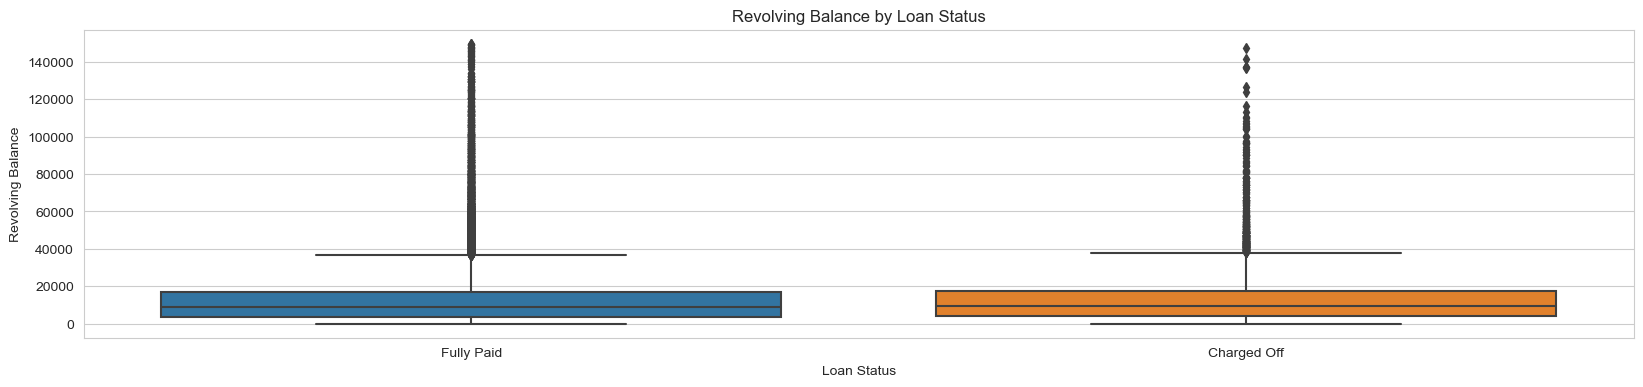

In [114]:
utils.plot_numerical_bivariate(df, "revol_bal", "loan_status", "Revolving Balance", "Loan Status")

### Observations from bivariate analysis on Revolving Balance(revol_bal) versus Loan Status(loan_status)
- Median Comparison
    - The median revolving balance for both 'Fully Paid' and 'Charged Off' loans appears to be similar, suggesting that the median amount of revolving credit does not drastically differ between the two groups.
- Interquartile Range
    - The interquartile ranges for both loan statuses are also quite similar, indicating that the middle 50% of borrowers from both categories have a comparable range of revolving balances.
- Outliers
    - There are outliers present in both categories, but the 'Charged Off' status has outliers with higher revolving balances compared to the 'Fully Paid' status. This could suggest that higher revolving balances might be associated with an increased risk of a loan being charged off.
- Spread of Data
    - The spread of the data, as indicated by the whiskers of the box plot, is quite wide for both categories. This shows substantial variability in the revolving balances among borrowers, regardless of the loan status.
- Overall Distributions
    - Despite the presence of high outliers, the bulk of the data for both loan statuses is clustered at the lower end of the balance spectrum, which is consistent with the overall distribution observed in the univariate analysis.

### Inferences from bivariate analysis on Revolving Balance(revol_bal) versus Loan Status(loan_status)
- While the median and range of revolving balances do not show significant differences between the 'Fully Paid' and 'Charged Off' categories, the presence of more extreme outliers in the 'Charged Off' category may indicate that very high revolving balances could potentially be a risk factor for charge-offs. 
- However, since the central tendencies are similar, revolving balance alone may not be a strong standalone predictor of loan status without considering other factors. 

Predictor Category - Weak

## Univariate Anslysis of Revolving Utilization(revol_util)


Summary statistics for 'Revolving Utilization':
count    36789.000000
mean        48.992659
std         28.311618
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64


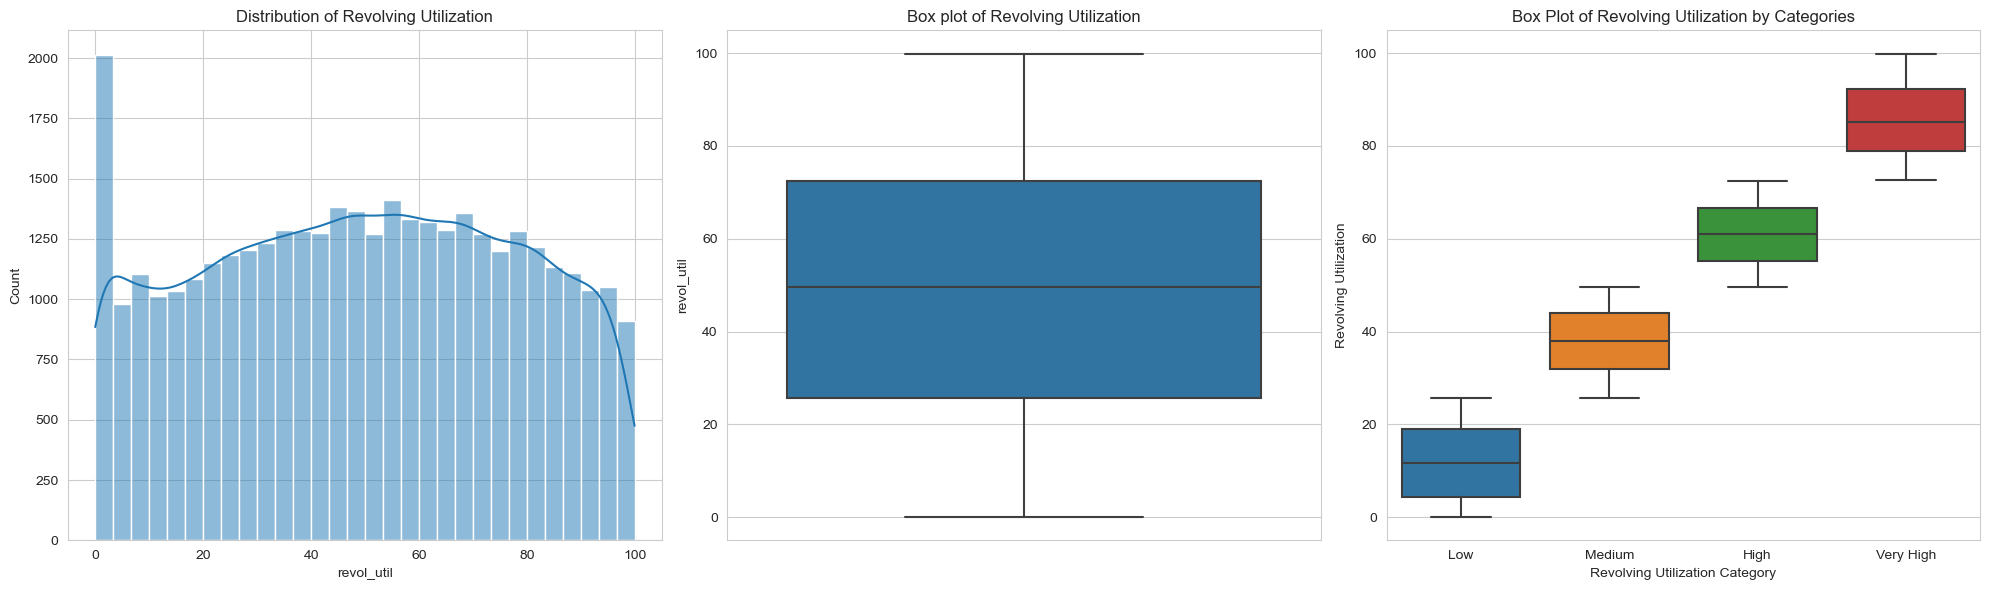

In [115]:
utils.plot_numerical_univariate(df, "revol_util", "Revolving Utilization")

### Observations from univariate analysis on Revolving Utilization(revol_util)

- Distribution
    - The histogram shows that the distribution of revolving utilization across all borrowers has a wide spread with a peak around the 50% mark. This implies that there is a wide variety of utilization rates among borrowers, with the most common being around the halfway point of their credit limit.
- Central Tendency
    - The mean and median are close to each other and near the 50% mark, which indicates that on average, borrowers are utilizing about half of their revolving credit.
- Spread of Data
    - The standard deviation is relatively high, suggesting that there is a significant variability in the utilization rates among borrowers.
- Quartiles
    - The 25th percentile is at 25.6%, and the 75th percentile is at 72.5%, indicating that half of the borrowers have a utilization rate between these two values.
- Skewness
    - The data seems to be fairly evenly distributed, with a slight right skew indicating that there are more borrowers with higher utilization rates.

### Inferences from univariate analysis on Revolving Utilization(revol_util)
- While the average borrower tends to use about half of their available credit, there is a substantial group of borrowers that either use very little or almost all of their available credit. 
- This feature could be significant when modeling credit risk, as high utilization rates may indicate borrowers who are over-leveraged, while very low utilization rates may indicate borrowers who are either very conservative or have access to credit that is not reflected in this particular data 

## Bivariate Anslysis of Revolving Utilization(revol_util) versus Loan Status(loan_status)

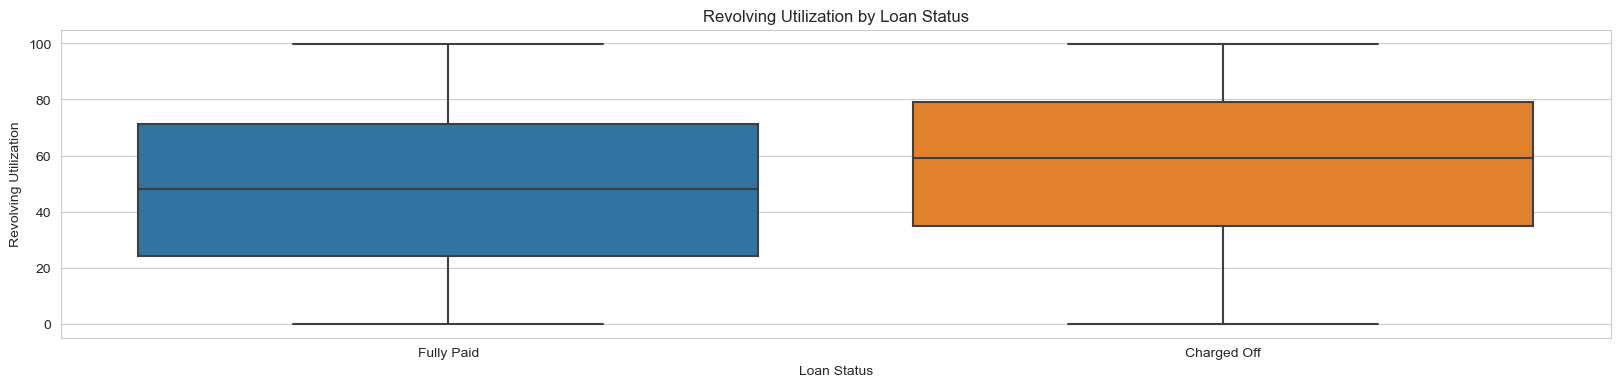

In [116]:
utils.plot_numerical_bivariate(df, "revol_util", "loan_status", "Revolving Utilization", "Loan Status")

### Observations from bivariate analysis on Revolving Utilization(revol_util) versus Loan Status(loan_status)
- Loan Status Comparison
    - Borrowers with charged-off loans tend to have higher revolving utilization rates than those who have fully paid off their loans. This is evident from the higher median and larger interquartile range of the 'Charged Off' box plot compared to the 'Fully Paid' one.
- Central Tendency
    - The median line within the 'Fully Paid' box is lower than that of the 'Charged Off' box, suggesting that borrowers who pay off their loans generally have lower credit utilization rates.
- Spread and Variability
    - Both loan status categories exhibit a wide range of utilization rates, but the 'Charged Off' category shows a slightly higher variability, which can be inferred from the height of the box and the length of the whiskers.

### Inferences from bivariate analysis on Revolving Utilization(revol_util) versus Loan Status(loan_status)
- Borrowers with charged-off loans having higher utilization rates may imply financial strain or over-leveraging, which could contribute to their inability to repay the loan.
- This feature is a valuable predictor in determining loan repayment outcomes, with higher rates potentially indicating greater risk of default. 

Predictor Category - Strong


## Univariate Anslysis of Total Accounts(total_acc)

Summary statistics for 'Total Accounts':
16    1359
15    1357
17    1345
14    1344
20    1339
18    1322
13    1295
21    1292
19    1253
12    1227
22    1202
11    1174
23    1169
24    1164
10    1096
25    1064
27    1010
9      988
26     982
8      925
28     908
29     852
30     810
7      761
31     745
32     736
6      622
33     601
34     588
35     548
5      504
36     485
37     443
38     417
39     410
4      369
40     308
41     275
42     264
43     240
44     212
46     176
45     170
3      163
47     156
48     141
49     123
50     112
52      96
63      87
53      80
51      75
54      62
55      51
56      48
57      42
61      39
59      38
62      34
58      33
60      25
64       4
66       4
67       4
65       3
75       2
79       2
80       1
68       1
70       1
73       1
69       1
71       1
90       1
72       1
81       1
74       1
78       1
77       1
87       1
2        1
Name: total_acc, dtype: int64

Mode: 16


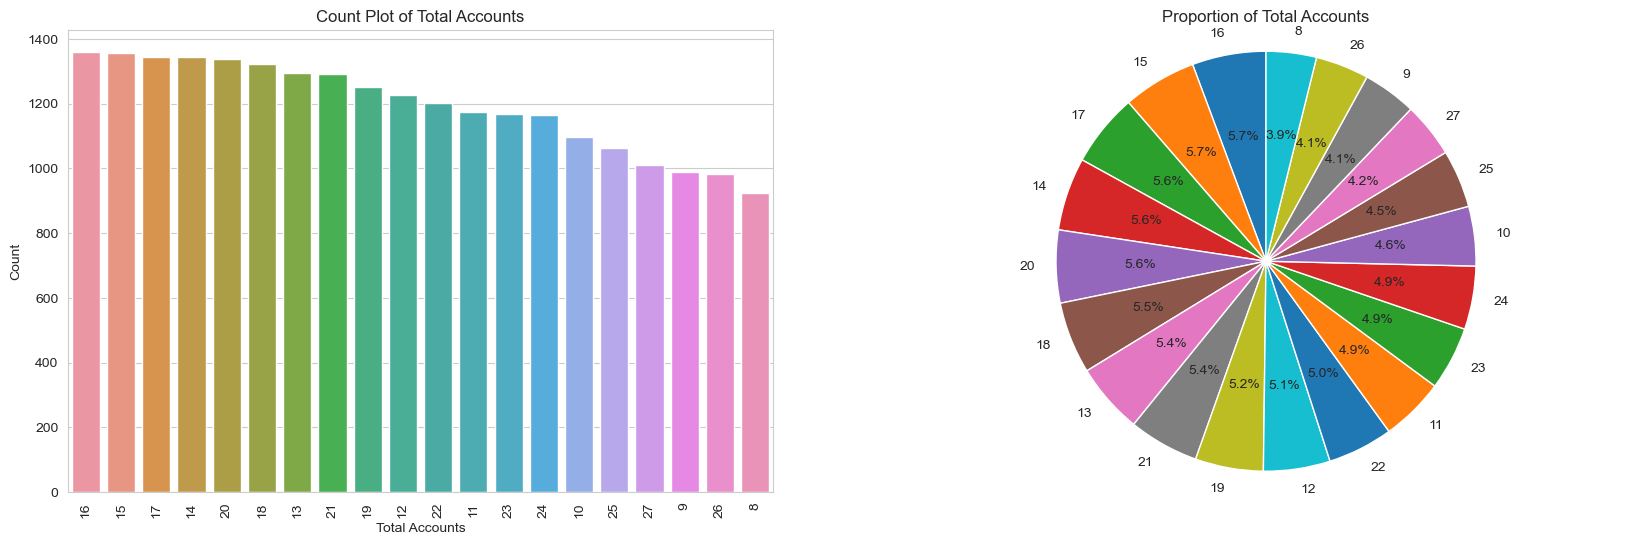

Summary statistics for 'Total Accounts':
count    36789.000000
mean        22.153551
std         11.407941
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


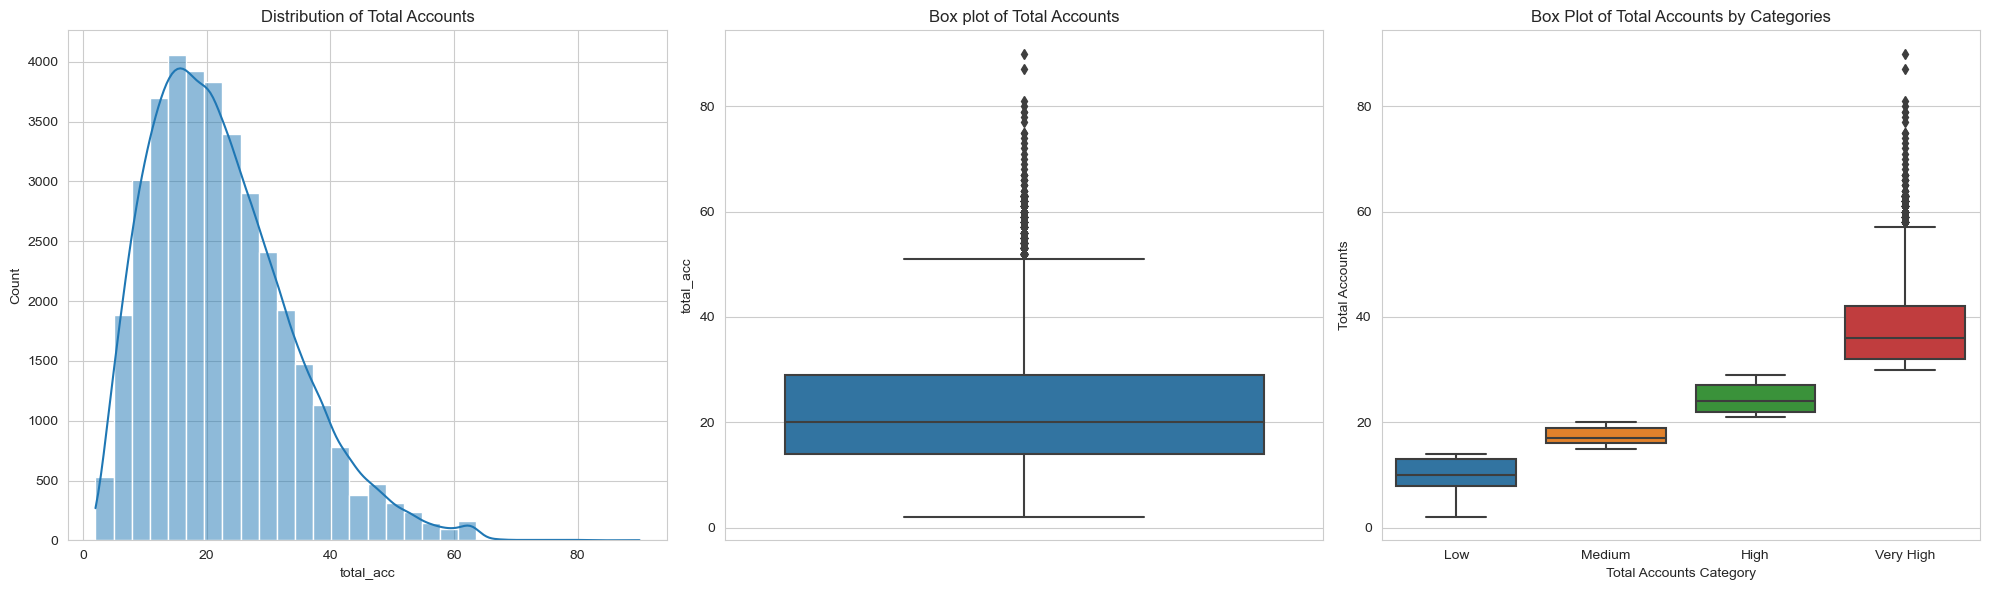

In [117]:
utils.plot_categorical_univariate(df, "total_acc", "Total Accounts", top_20=True)
utils.plot_numerical_univariate(df, "total_acc", "Total Accounts")

### Observations from univariate analysis on Total Accounts(total_acc)
- wide range of values, with the most common number of total accounts being 16, as indicated by the mode of the distribution.
- right-skewed, with the number of accounts ranging from a minimum of 2 to a maximum of 90, which is quite a broad spread.
- The box plot shows that the median number of total accounts is 20, and 50% of the data (the interquartile range) falls between 14 and 29 accounts. The presence of outliers, indicated by points beyond the whiskers of the box plot, suggests that there are individuals with an exceptionally high number of accounts, which could be due to various reasons, such as a longer credit history or more active credit usage.

### Inferences from univariate analysis on Total Accounts(total_acc)
- The wide range suggests that there is significant variability in the number of accounts among borrowers. 
- Considering this variability, 'Total Accounts' could be a useful feature for credit modeling as it may encapsulate aspects of a borrower's credit history and financial management. 


## Bivariate Anslysis of Total Accounts(total_acc) versus Loan Status(loan_status)

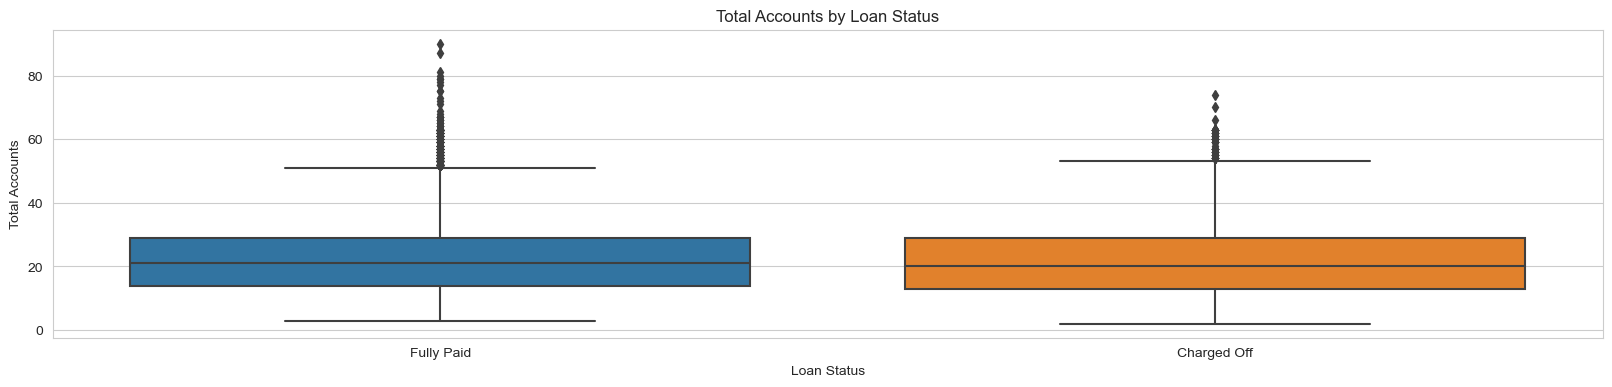

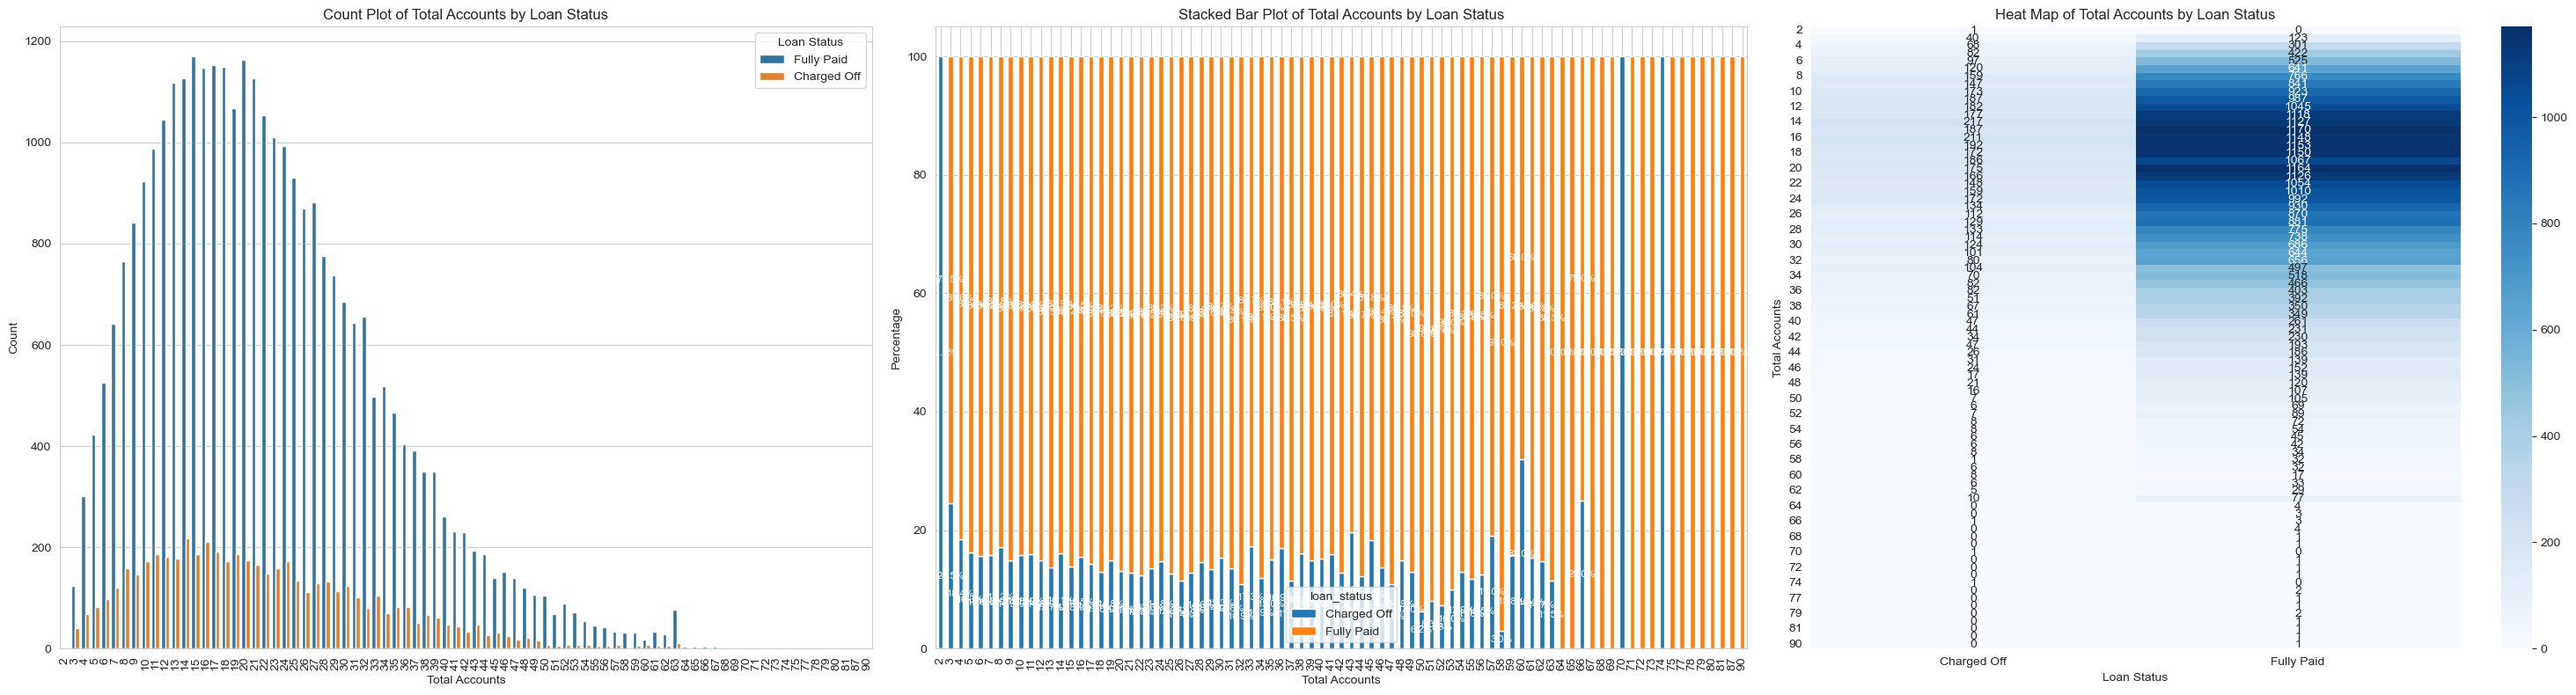

In [118]:
utils.plot_numerical_bivariate(df, "total_acc", "loan_status", "Total Accounts", "Loan Status")
utils.plot_categorical_bivariate(df, "total_acc", "loan_status", "Total Accounts", "Loan Status")

### Observations from bivariate analysis on Total Accounts(total_acc) versus Loan Status(loan_status)
- Box Plot
    - Central Tendency and Dispersion
        - Both the 'Fully Paid' and 'Charged Off' categories have a wide range of 'Total Accounts' among the borrowers, with a large interquartile range indicating variability in the number of accounts held by borrowers within each loan status group.
        - The medians (indicated by the line within the boxes) for both categories are situated in the mid-range of the total accounts, suggesting that the median borrower in both groups has a similar number of total accounts.
    - Outliers
        - There are outliers present in both loan status categories, as indicated by the diamonds beyond the whiskers of the box plot. This suggests that there are borrowers with a significantly higher number of total accounts than the majority within each group.
    - Distribution Comparison
        - The spread of the 'Total Accounts' in the 'Charged Off' category appears to be slightly wider than in the 'Fully Paid' category, which might indicate that borrowers who default on their loans could have a more varied number of total accounts. However, both distributions have a significant overlap, and the difference is not stark.
- The count plot indicates that a higher number of borrowers with a lower to moderate number of total accounts have fully paid off their loans compared to those with a high number of accounts. This is evident from the higher bars for the 'Fully Paid' status at the lower account levels. However, there is still a significant number of borrowers across the spectrum of 'Total Accounts' who have also fully paid their loans, suggesting that the number of accounts alone is not a definitive predictor of loan repayment.
- The stacked bar plot provides a percentage breakdown of the loan status across different total account levels. The visualization seems to suggest that regardless of the number of accounts, a majority of the loans are fully paid as the 'Fully Paid' status dominates the bars across the range. This could imply that while having more accounts might be associated with a higher credit utilization or exposure, it does not necessarily lead to a higher default rate.
- The heat map shows the concentration of loans by 'Total Accounts' and 'Loan Status', highlighting areas with higher frequencies. It appears that most of the fully paid loans are concentrated in the lower to mid-range of total accounts, while charged-off loans are less frequent but present across the account range.

### Inferences from bivariate analysis on Total Accounts(total_acc) versus Loan Status(loan_status)
- Borrowers with a wide range of total accounts have successfully paid off their loans, and the overall distribution doesn't indicate a strong, clear-cut relationship between the number of accounts and the likelihood of charge-off.
- As per the boxplot, it's quite evident, while there is a variation in the number of total accounts between borrowers who have fully paid loans and those who have charged-off loans, the substantial overlap in the range of 'Total Accounts' for both groups suggests that the number of total accounts alone may not be a strong predictor of loan status.
- 'Total Accounts' seems to be a feature that provides insight into a borrower's credit history, but its predictive power for loan repayment might be limited. 

Predictor Category - Weak


## Univariate Anslysis of Last Credit Pull Date(last_credit_pull_d)

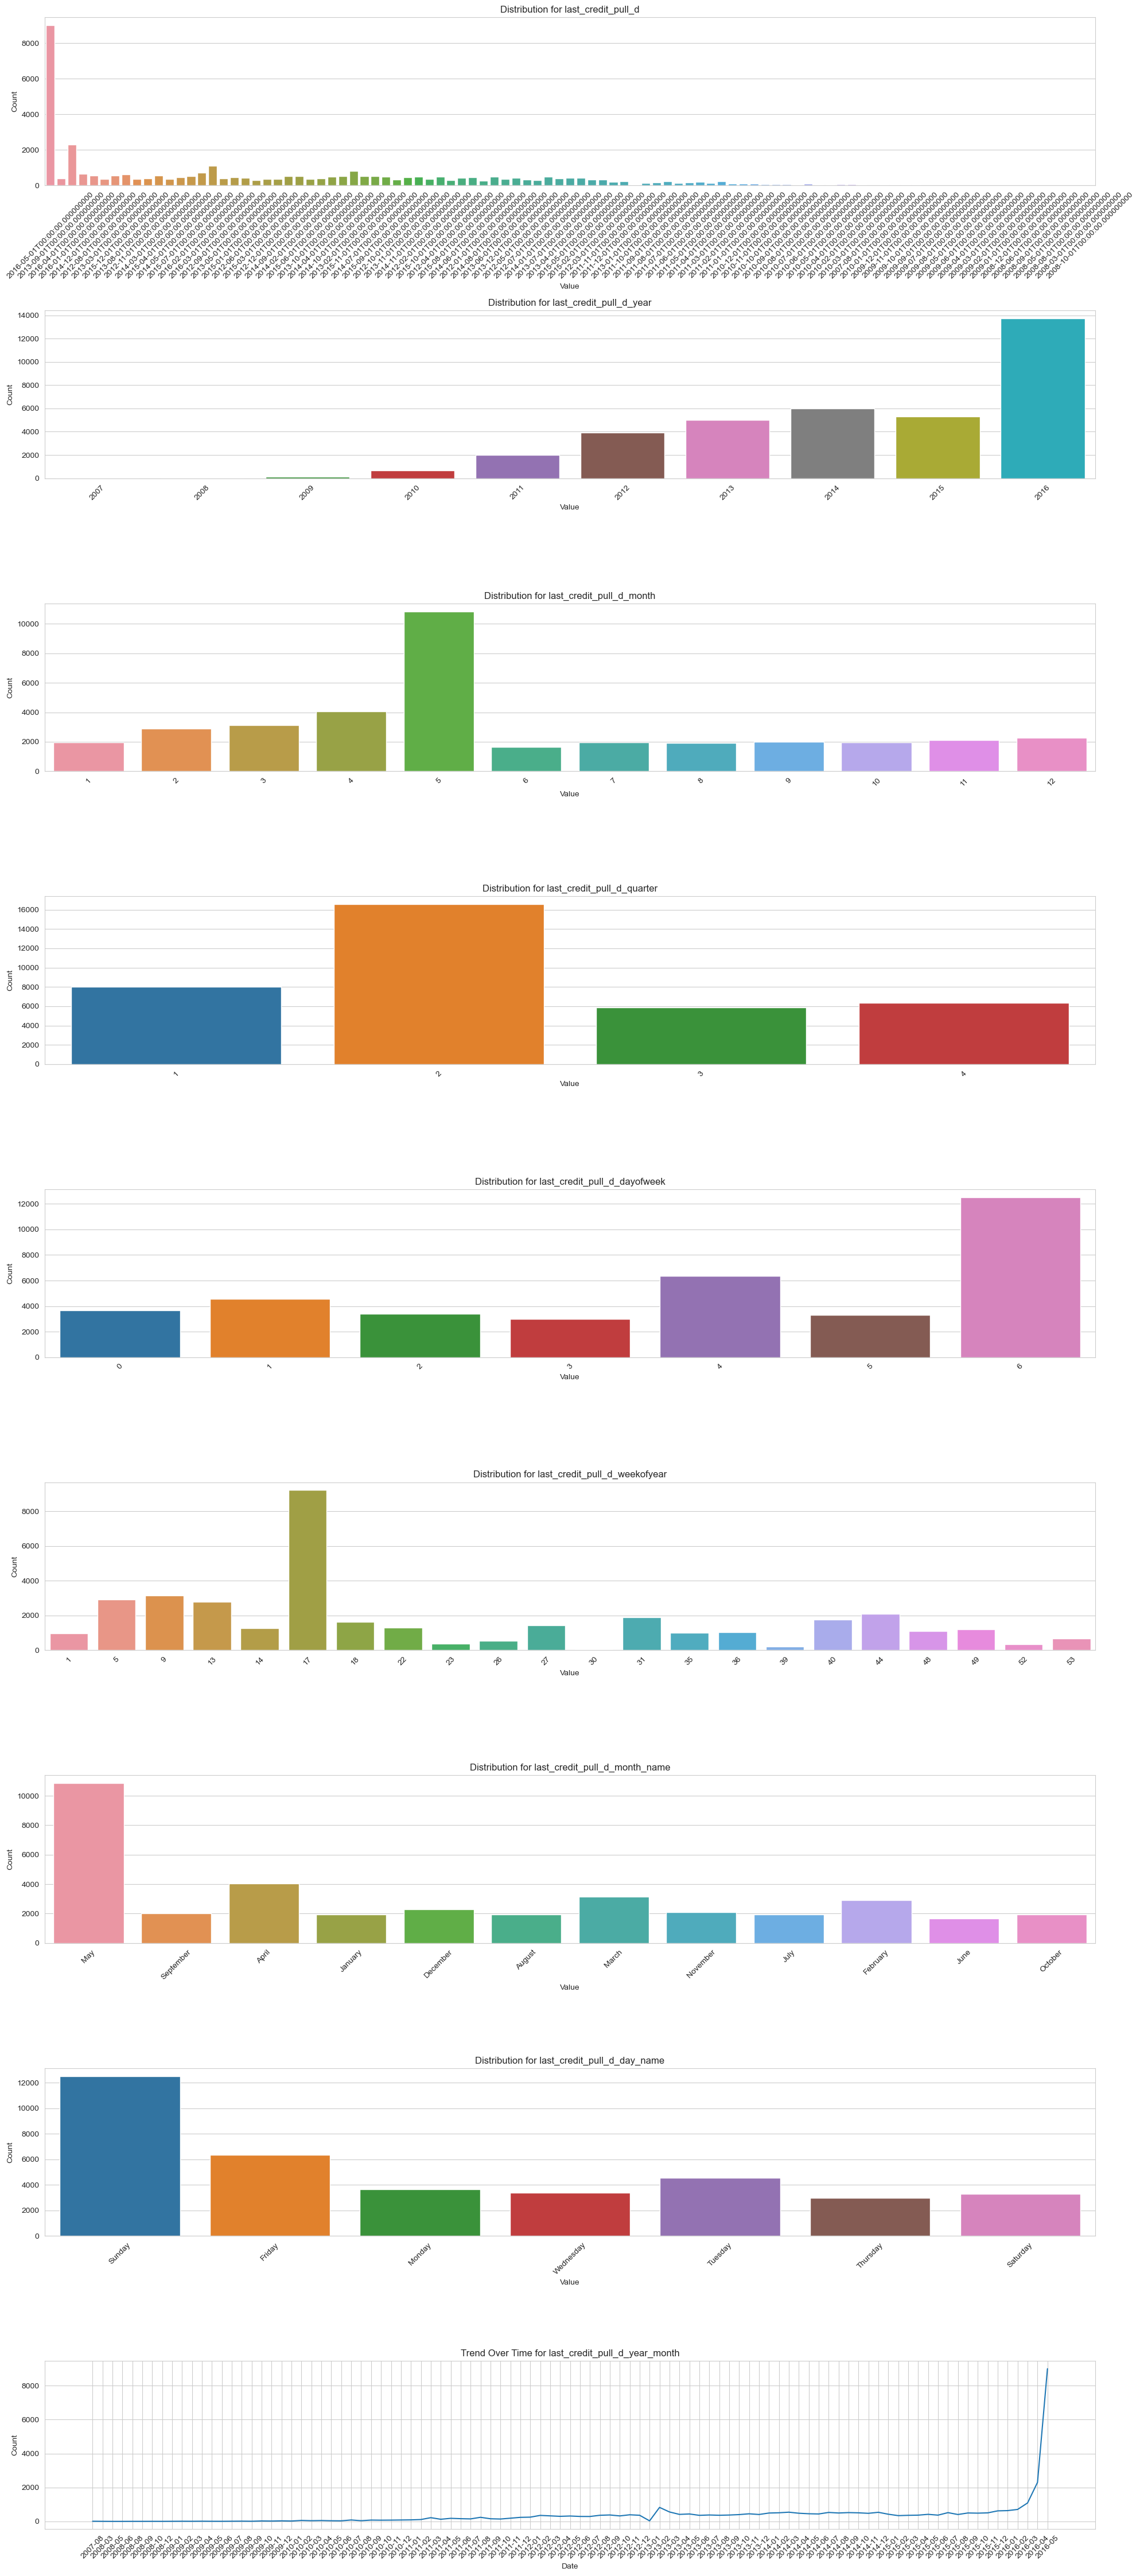

In [119]:
utils.univariate_date_analysis(df, "last_credit_pull_d")

### Observations from univariate Anslysis of Last Credit Pull Date(last_credit_pull_d)
- Distribution Over Time (Years)
    - The distribution across different years shows varying counts, indicating fluctuations in the number of last credit pulls over time. There may be peaks and troughs which could correspond to economic cycles, policy changes, or portfolio growth.
- Monthly Distribution
    - The data for months shows seasonality or certain months having higher or lower counts. This could reflect systematic patterns in credit behavior, such as increased credit activity during holiday seasons or fiscal year ends.
- Quarterly Distribution
    - particular quarters consistently have higher credit pulls due to annual financial events or behaviors.
- Day of Week and Day of Month
    - The analysis by day of the week and day of the month indicates there are specific days that consistently have more credit activity. 
- Trend Over Time
    - The trend line for credit pulls by year and month  shows  there is a general increase over time, drastic increase in recent years

### Inferences from univariate Anslysis of Last Credit Pull Date(last_credit_pull_d)
- There's a clear temporal pattern in the credit pull data, which suggests that temporal features could be significant in any predictive modeling or trend analysis.
- The data exhibits seasonality, with certain periods showing higher activity. This could be useful for resource allocation and strategic planning.
- Specific days or months with unusually high or low activity could merit further investigation to understand the underlying causes.
- Genuine spikes in activity in recent years

## Bivariate Anslysis of Last Credit Pull Date(last_credit_pull_d) versus Loan Status(loan_status)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


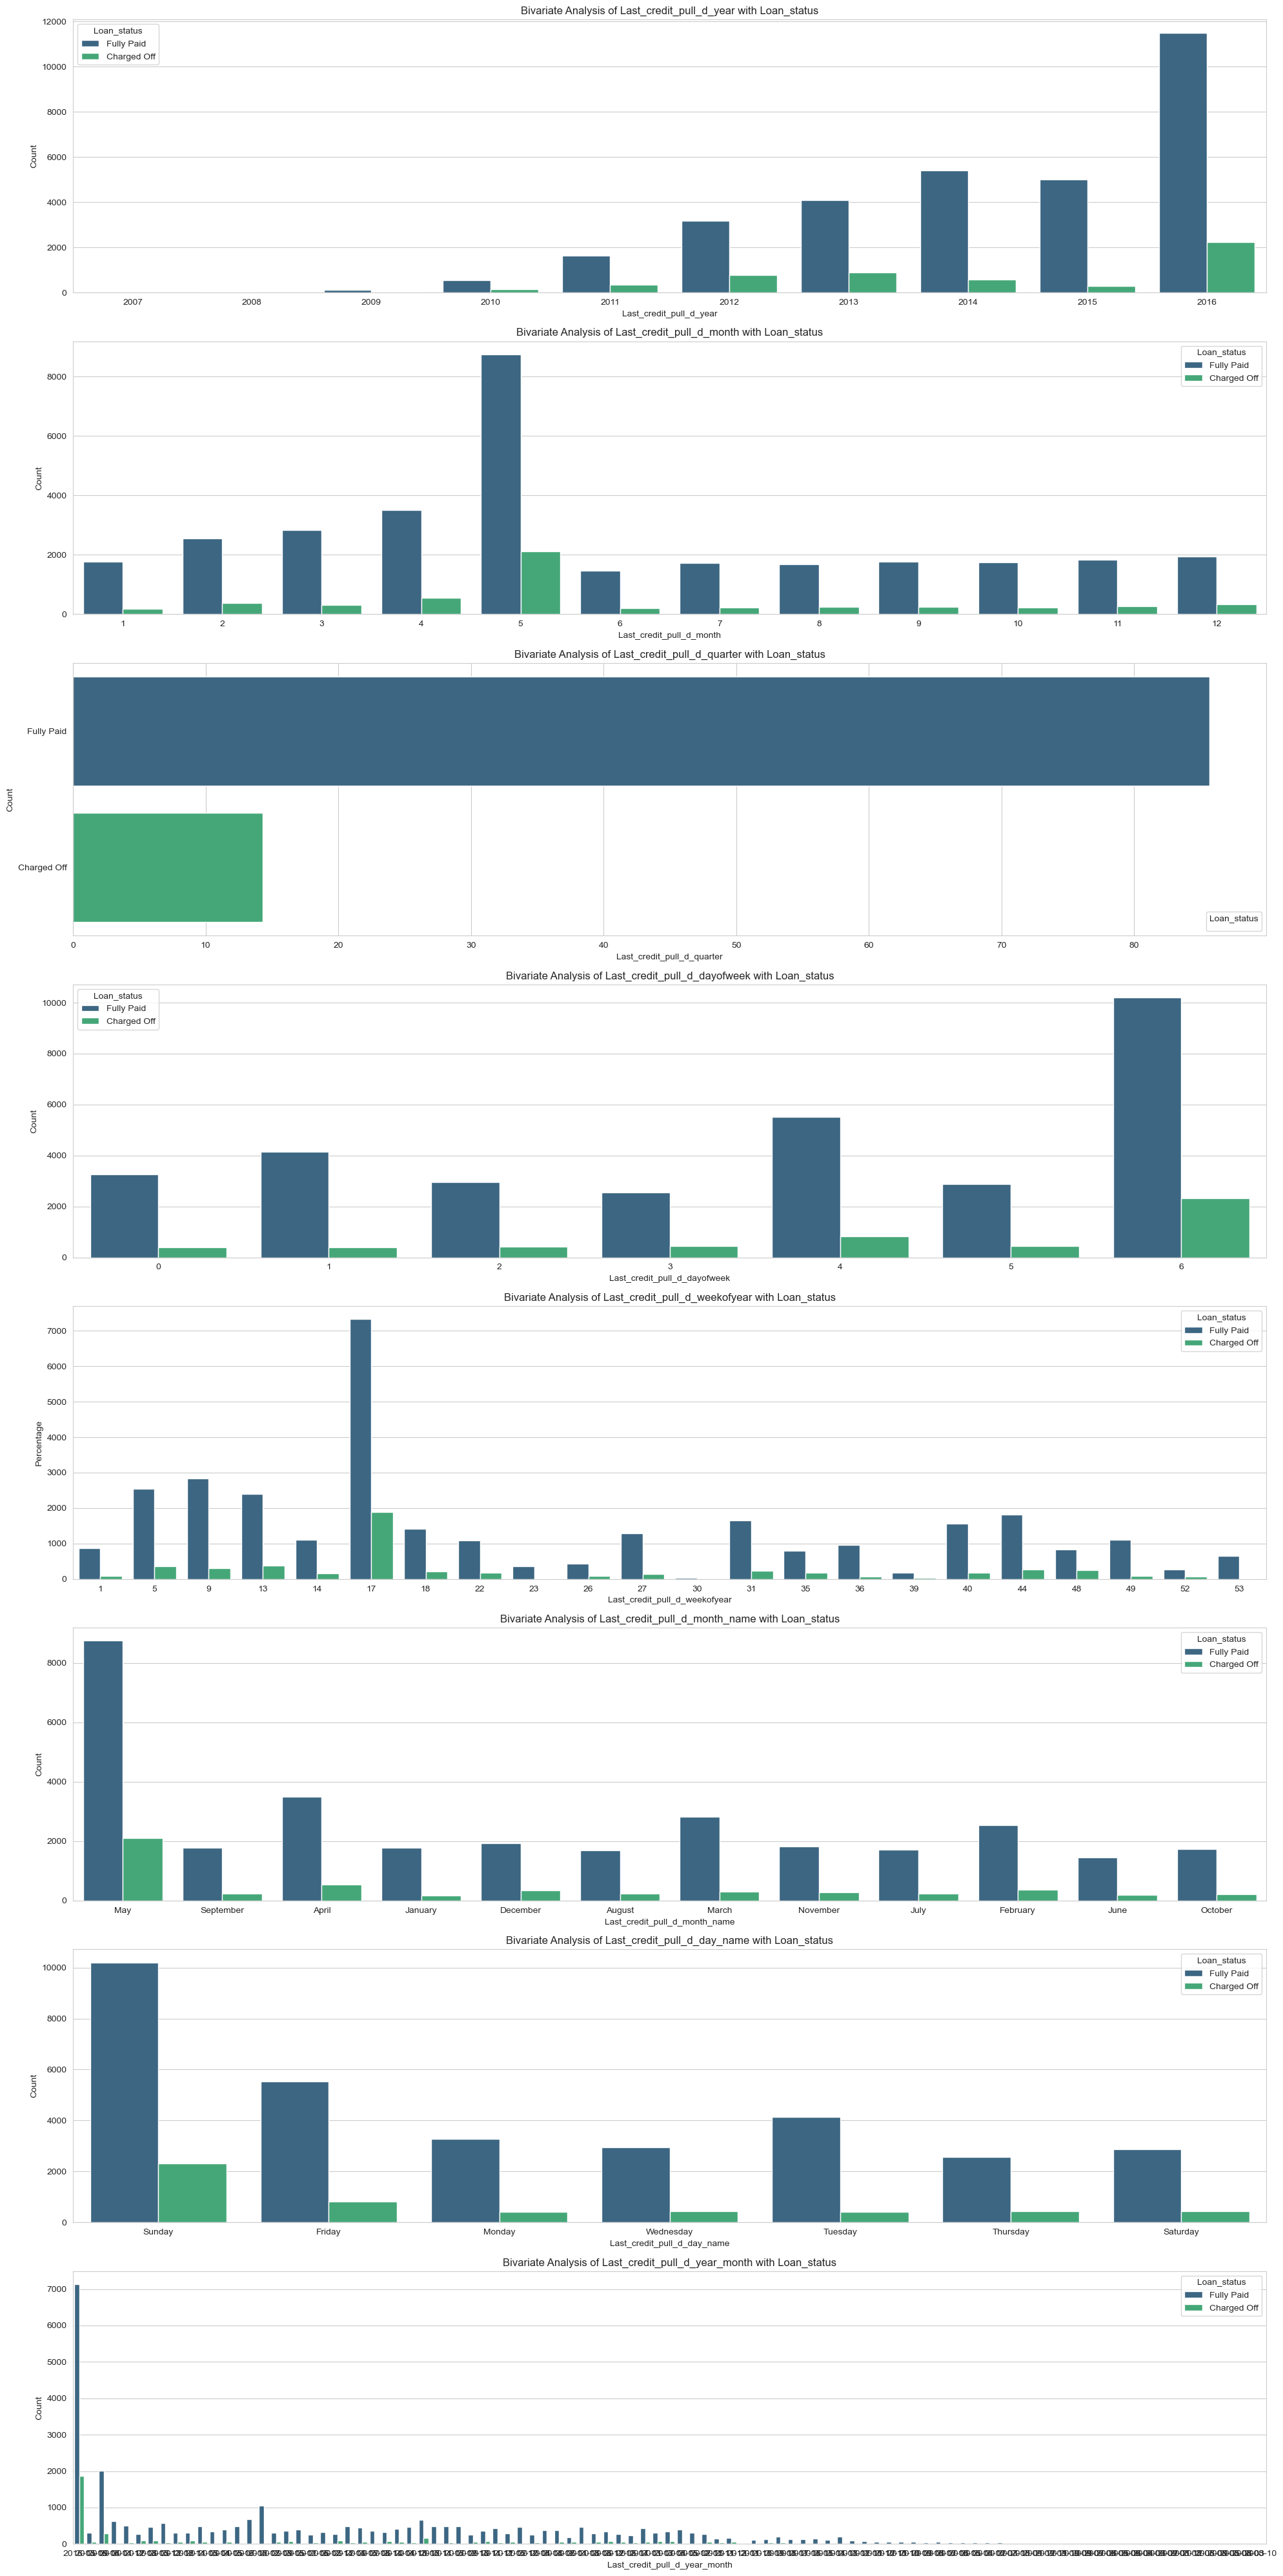

In [120]:
utils.bivariate_date_analysis(df, "last_credit_pull_d", "loan_status")

### Observations from bivariate Anslysis of Last Credit Pull Date(last_credit_pull_d) versus Loan Status(loan_status)
- Although there are variabilities in "Charged Off" loans across different quarters, days, months, weeks, yet, it's proportionate to the "Full Paid" loans in every segment.

### Inferences from bivariate Anslysis of Last Credit Pull Date(last_credit_pull_d) versus Loan Status(loan_status)
- Not a good predictor

Category - No Impact

## Univariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies)

* A few discrete values - better to treat it as categorical, although the data is numeric in nature

Summary statistics for 'Public Record Bankrupties':
0.0    35255
1.0     1529
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Mode: 0.0


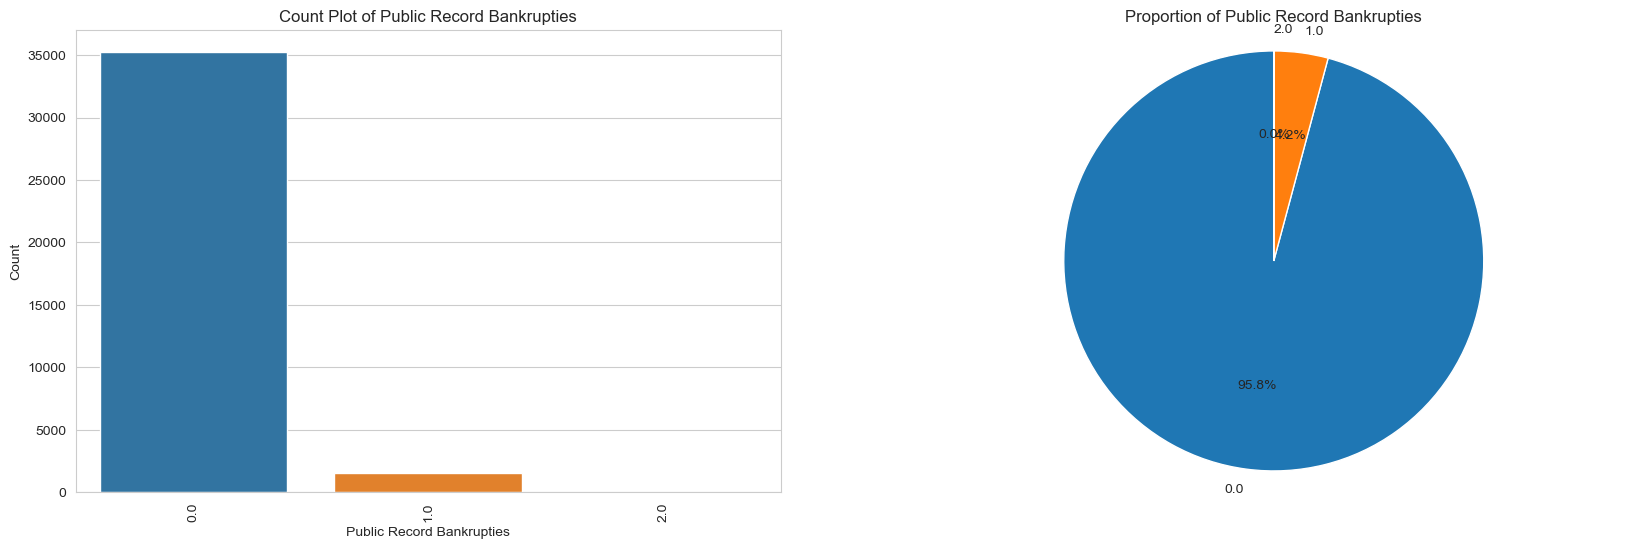

In [121]:
utils.plot_categorical_univariate(df, "pub_rec_bankruptcies", "Public Record Bankrupties", top_20=True)

### Observations from Univariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies)
- Distribution Concentration
    - The vast majority of the records, 35,255 out of 36,789, have 0 public record bankruptcies. This represents approximately 95.8% of the data, which suggests a highly concentrated distribution with a strong mode at 0.
- Occurrence of Bankruptcie
    - There are significantly fewer cases with 1 or more bankruptcies, with 1,529 occurrences of a single public record bankruptcy and only 5 instances of two bankruptcies.
- Mode
    - The mode of the data is 0, which signifies that having no public record bankruptcy is the most common among the borrowers.
- Skewness and Outlier
    - Given the concentration of the data at 0 and the long tail towards the higher number of bankruptcies, the distribution is likely to be right-skewed. However, due to the low occurrence of higher values, they might not even qualify as statistical outliers in a technical sense

### Inferences from Univariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies)

- Since the variable 'Public Record Bankruptcies' is highly skewed with most of the values at 0, its discriminative power for predicting outcomes like loan default may be limited when considered in isolation
- Let's do bivariate analysis with loan status to confirm this

## Bivariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies) versus Loan Status(loan_status)

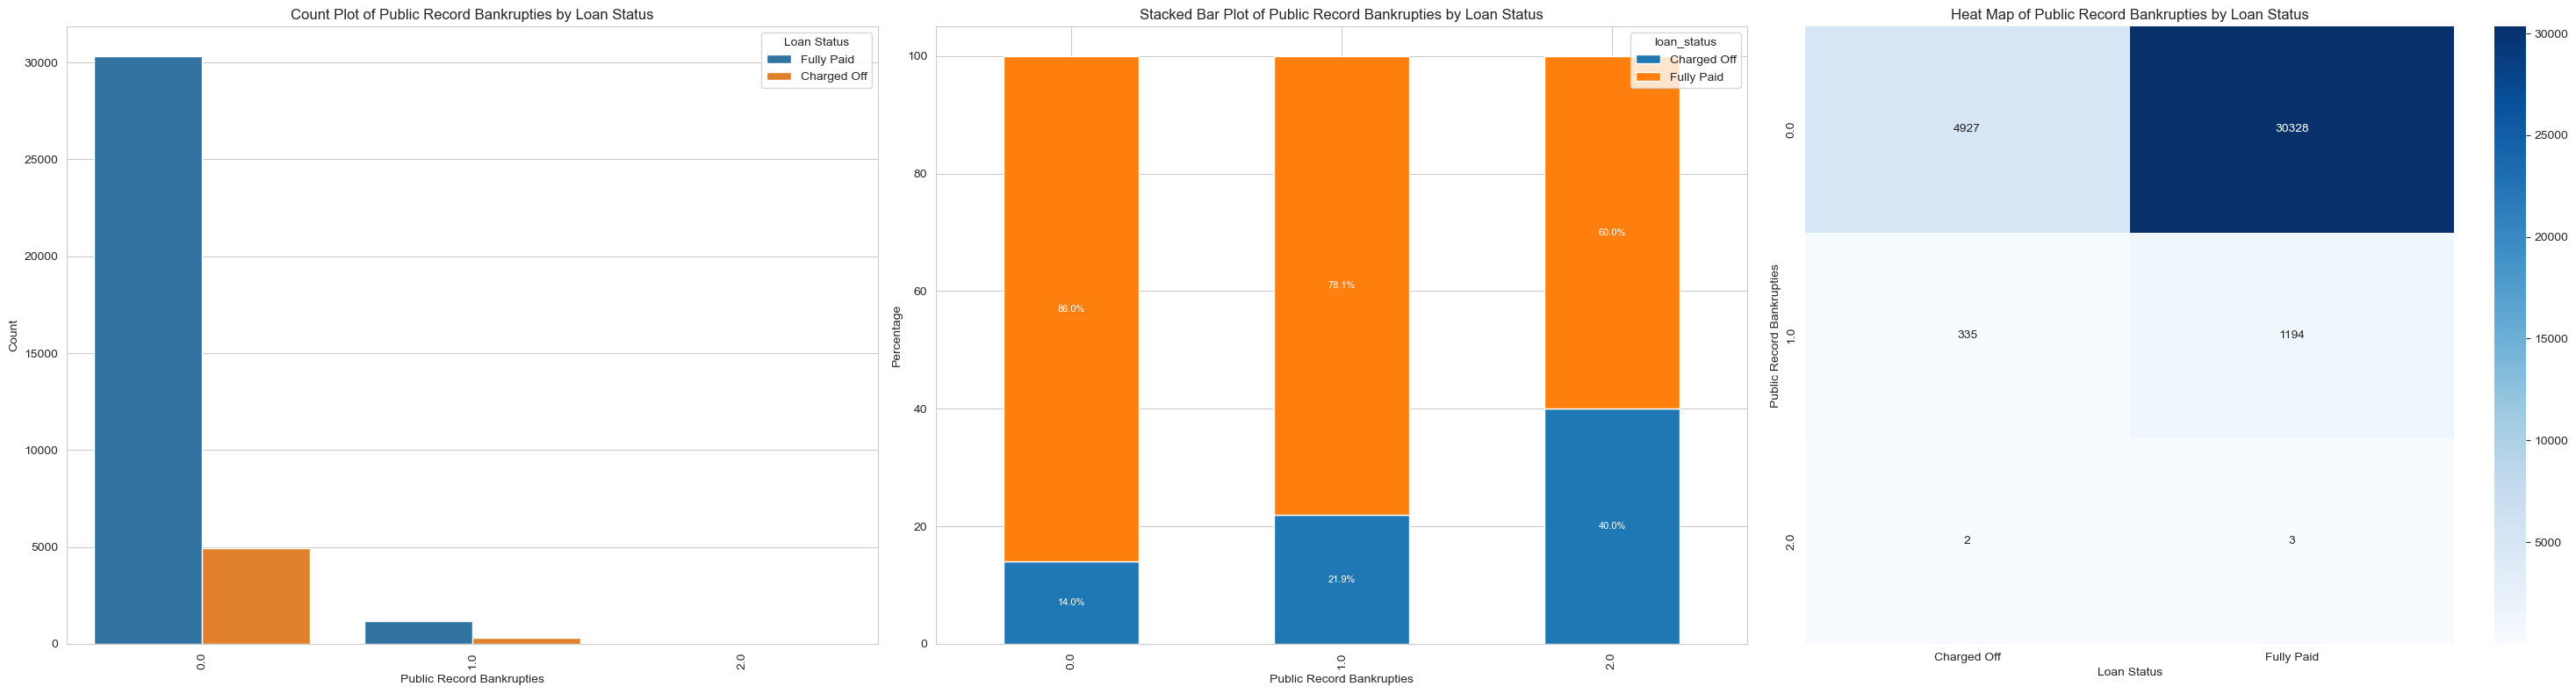

In [122]:
utils.plot_categorical_bivariate(df, "pub_rec_bankruptcies", "loan_status", "Public Record Bankrupties", "Loan Status")

### Observations from bivariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies) versus Loan Status(loan_status)

- Stacked bar plot
    - A higher proportion of borrowers with 'Charged Off' loans have public record bankruptcies compared to those with 'Fully Paid' loans.
- Heat Map
    - The heat map further emphasizes the count distribution and shows a clear gradient indicating that as the number of public record bankruptcies increases, the count of 'Fully Paid' loans decreases more significantly than 'Charged Off' loans.

### Inferences from bivariate Anslysis of Public Record Bankrupties(pub_rec_bankruptcies) versus Loan Status(loan_status)

- Although the majority of borrowers have no bankruptcies, the presence of a bankruptcy appears to be associated with an increased likelihood of a loan being 'Charged Off'.
- Seems to be good predictor in case number of bankrupties is greater than 0, although higer concentration of zeroes is a problem
- The predictive power could be enhanced when this feature is used in conjunction with other variables that affect loan repayment behavior.

Predictor Category - Good

## Univariate Anslysis of Credit History Length(credit_history_length)

* Contains negative values, Imputing with 0

In [123]:
df["credit_history_length"] = df["credit_history_length"].apply(lambda x: 0 if x < 0 else x)

Summary statistics for 'Credit History Length':
count    36789.000000
mean       164.838952
std         79.540008
min          0.000000
25%        110.566667
50%        151.200000
75%        204.933333
max        520.500000
Name: credit_history_length, dtype: float64


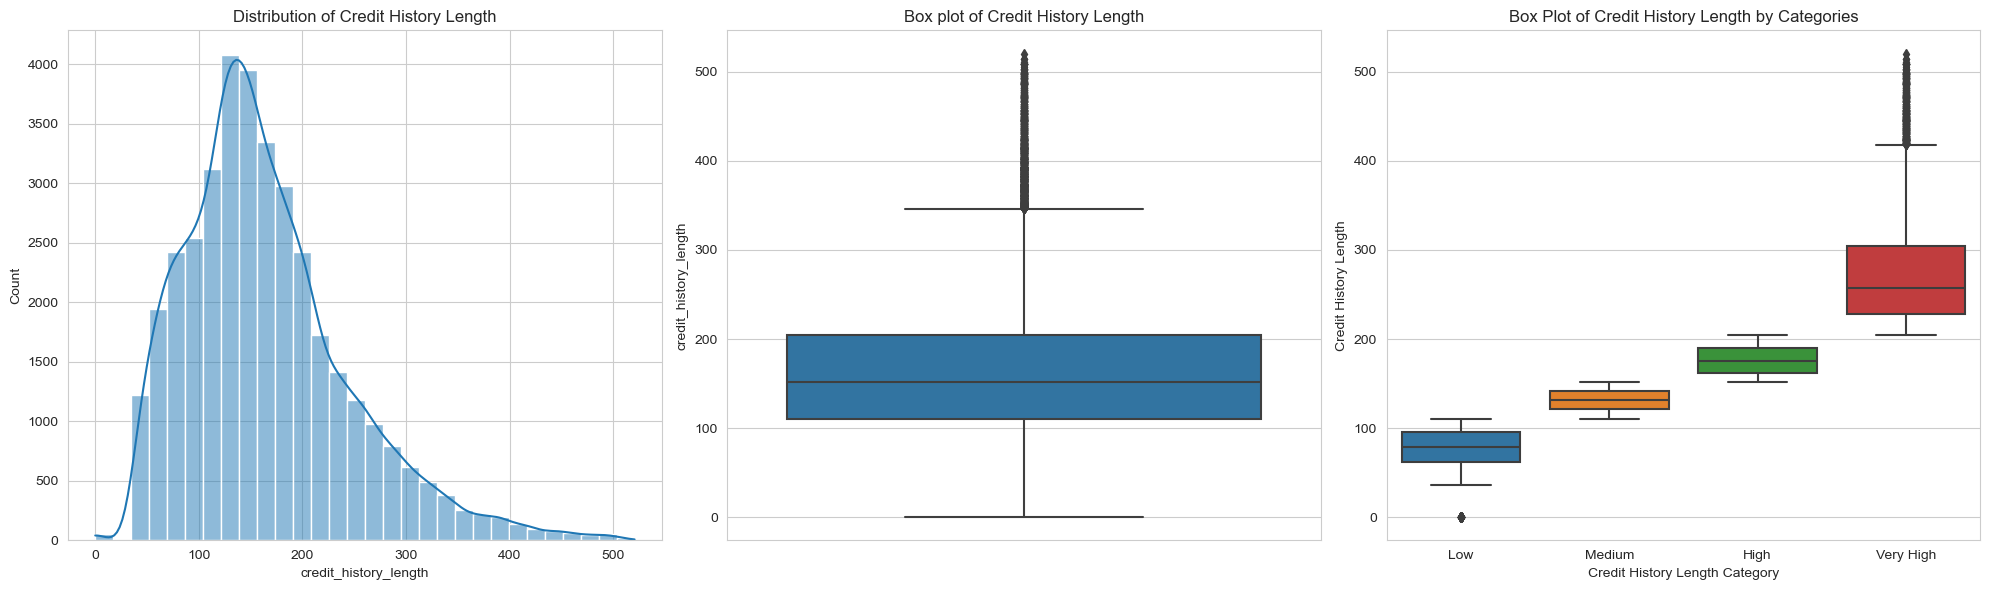

In [125]:
utils.plot_numerical_univariate(df, "credit_history_length", "Credit History Length")

### Observations from Univariate Anslysis of Credit History Length(credit_history_length)

- Distribution Shape
    - The distribution of 'Credit History Length' is skewed to the right, indicating that the majority of borrowers have a shorter credit history, with fewer borrowers having a long credit history.
- Data Range and Central Tendency
    - The mean credit history length is approximately 164.8 months, which equates to roughly 13.7 years.
    - The standard deviation is about 79.5 months, indicating there is a substantial spread in the credit history lengths across borrowers.
- Quartiles
    - The median (50th percentile) is at 151.2 months, indicating that half of the borrowers have a credit history shorter than 12.6 years, and the other half have a longer history.
    - The 25th percentile is at 110.6 months (about 9.2 years), and the 75th percentile is at 204.9 months (about 17 years), showing that the middle 50% of borrowers' credit histories are spread over approximately 7.8 years.
- Outliers
    - The box plot shows several points that lie outside the upper whisker, which can be considered outliers. These represent borrowers with exceptionally long credit histories.
    - The presence of outliers is more pronounced in the 'Very High' category of the credit history length.
- Range and Extremes
    - The maximum credit history length is over 520 months (over 43 years), which indicates some borrowers have an extremely long history of credit usage.

### Inferences from Univariate Anslysis of Credit History Length(credit_history_length)
- The credit history length could potentially be a predictive feature for creditworthiness, as it provides an indication of how long borrowers have been managing credit.
- The presence of outliers, particularly at the higher end, may need to be investigated to ensure they represent accurate data points and not anomalies that could skew analysis and modeling efforts.


## Bivariate Anslysis of Credit History Length(credit_history_length) versus Loan Status(loan_status)

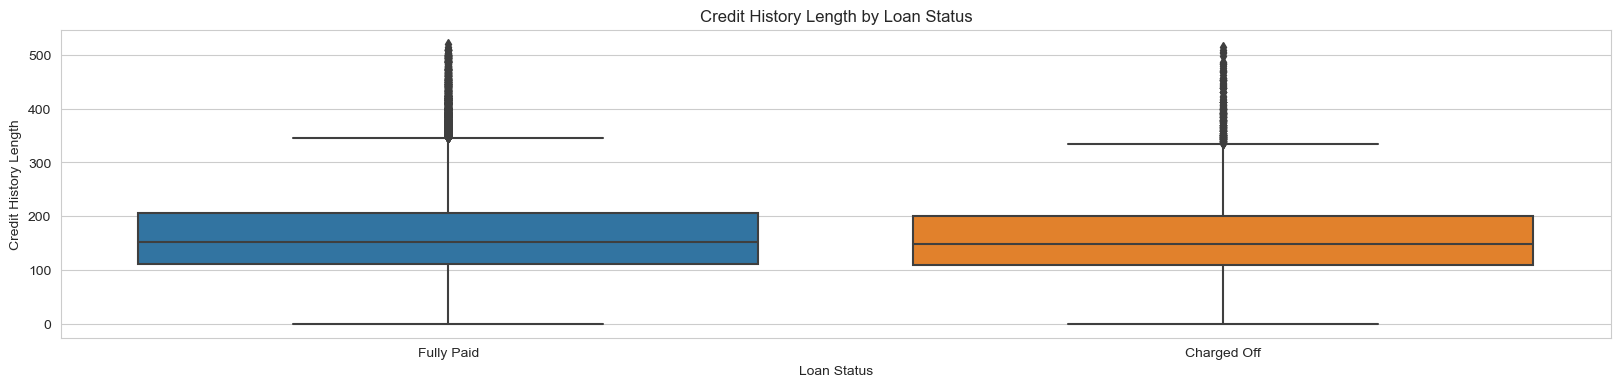

In [126]:
utils.plot_numerical_bivariate(df, "credit_history_length", "loan_status", "Credit History Length", "Loan Status")

### Observations from Univariate Anslysis of Credit History Length(credit_history_length) versus Loan Status(loan_status)

- Medians/IQR differs slightly in each category.
- IQR, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3), appears to be narrower for the 'Charged Off' loans compared to the 'Fully Paid' ones. This suggests that the middle 50% of borrowers in the 'Charged Off' category have a less varied credit history length than those who have 'Fully Paid' their loans.
- There are outliers in both categories, indicating the presence of borrowers with credit history lengths that are much longer than typical for their respective groups.

### Inferences from Univariate Anslysis of Credit History Length(credit_history_length) versus Loan Status(loan_status)
- The narrower IQR for the 'Charged Off' loans suggests that while there is some variation in the credit history length of individuals whose loans have defaulted, it is less than that of individuals who have fully paid their loans. However, since the medians are similar, credit history length may not be a strong predictor on its own
- Categorized as "weak predictor"

Predictor Category - Weak